In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns 
import plotly.express as px
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px


os.chdir("/net/trapnell/vol1/home/mdcolon/proj/morphseq")
from src.vae.auxiliary_scripts.assess_vae_results import assess_vae_results

from src.functions.embryo_df_performance_metrics import *




# merged_df = pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20241216/sweep_analysis/paired_models_and_metrics_df.csv")
# merged_df_avg = merged_df[merged_df["Perturbation"]=="avg_pert"]
# splines_final_df = pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20241216/sweep_analysis/splines_final_df.csv")

/net/trapnell/vol1/home/mdcolon/software/miniconda3/envs/vae_env_cluster/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/net/trapnell/vol1/home/mdcolon/software/miniconda3/envs/vae_env_cluster/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
splines_final_df[splines_final_df["model_index"]==74]

,model_index,dataset,Perturbation,point_index,PCA_1,PCA_2,PCA_3
450000,74,all,wnt-i,499,-1.241091,1.412823,2.134963
450001,74,all,wnt-i,498,-1.333400,1.384287,2.091799
450002,74,all,wnt-i,497,-1.233325,1.417169,2.132553
450003,74,all,wnt-i,496,-1.331219,1.384443,2.089678
450004,74,all,wnt-i,495,-1.252104,1.410504,2.127160
...,...,...,...,...,...,...,...
457495,74,hld_aligned,gdf3,495,0.581596,0.086805,1.421289
457496,74,hld_aligned,gdf3,496,0.591115,0.079070,1.421751
457497,74,hld_aligned,gdf3,497,0.600890,0.071648,1.421707
457498,74,hld_aligned,gdf3,498,0.610880,0.064535,1.421209


In [8]:
model_index = 74 #choosen best morphology space

path = merged_df_avg[merged_df_avg["model_index"] == model_index]["embryo_df_path_nohld"].iloc[0]
df = pd.read_csv(path)
df["embryo_id"] = df["snip_id"].str.rsplit('_', n=1).str[0]
spline_df = splines_final_df[splines_final_df["model_index"]==74]
# Define z_mu columns after loading the data





/tmp/8231266.1.trapnell-login.q/ipykernel_1060679/3434714026.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(path_all)


In [38]:
z_mu_columns = [col for col in df.columns if 'z_mu' in col]    
z_mu_biological_columns = [col for col in z_mu_columns if "b" in col]

In [11]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px

z_mu_columns = [col for col in df.columns if 'z_mu' in col]    
z_mu_biological_columns = [col for col in z_mu_columns if "b" in col]
pert_comparisons = ["wnt-i", "tgfb-i", "wt", "lmx1b", "gdf3"]
color_discrete_map = {pert: px.colors.qualitative.Plotly[i % 10] for i, pert in enumerate(pert_comparisons)}
df = df

X = df[z_mu_biological_columns].values
pca = PCA(n_components=3)
pcs = pca.fit_transform(X)

df['color'] = df['phenotype'].map(color_discrete_map)

df["PCA_1"] = pcs[:, 0]
df["PCA_2"] = pcs[:, 1]
df["PCA_3"] = pcs[:, 2]

In [21]:
pert= "wt"
spline_df[spline_df["Perturbation"] == pert][["PCA_1", "PCA_2", "PCA_3"]]

,PCA_1,PCA_2,PCA_3
452000,1.915106,-2.050880,1.580314
452001,1.900254,-2.049069,1.559878
452002,1.885387,-2.047344,1.539445
452003,1.870469,-2.045683,1.519045
452004,1.855469,-2.044064,1.498701
...,...,...,...
456495,1.206757,-3.281620,-0.526521
456496,1.219034,-3.300159,-0.535288
456497,1.231226,-3.318778,-0.544003
456498,1.243320,-3.337476,-0.552685


In [40]:
import plotly.graph_objects as go
save_dir = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107"
# Process each perturbation
df

fig = go.Figure()

for pert in df['phenotype'].unique():
# for pert in ["wt"]:
    print(f"Processing {pert} in dataset...")

    # Filter the DataFrame for the given perturbation
    pert_df = df[df["phenotype"] == pert]
    pert_3d = pert_df[["PCA_1", "PCA_2", "PCA_3"]].values

    avg_early_timepoint = pert_df[
        (pert_df["predicted_stage_hpf"] >= pert_df["predicted_stage_hpf"].min()) &
        (pert_df["predicted_stage_hpf"] < pert_df["predicted_stage_hpf"].min() + 1)
    ][["PCA_1", "PCA_2", "PCA_3"]].mean().values

    avg_late_timepoint = pert_df[(pert_df["predicted_stage_hpf"] >= (pert_df["predicted_stage_hpf"].max() -3))][["PCA_1", "PCA_2", "PCA_3"]].mean().values


    # Downsampling logic
    if len(pert_3d) > 0:  # Ensure we have data points
        if pert == "wt":
            subset_size = int(0.05 * len(pert_3d))
        else:
            subset_size = int(0.1 * len(pert_3d))

        # Ensure subset_size is at least 1
        subset_size = max(1, subset_size)

        pert_3d_subset = pert_3d[np.random.RandomState(42).choice(len(pert_3d), size=subset_size,  replace=False)]
   
        print(f"Subset size: {len(pert_3d_subset)}")

        # Fit the Local Principal Curve on the subset
        lpc = LocalPrincipalCurve(bandwidth=.5, max_iter=250, tol=1e-3, angle_penalty_exp=2)
        paths = lpc.fit(pert_3d_subset, start_points=avg_early_timepoint) #,end_point=avg_late_timepoint, remove_similar_end_start_points=True)

        spline_points = lpc.cubic_splines[0] if len(lpc.cubic_splines) > 0 else None

        # Extract the first path (assuming one main path)
        # spline_points = spline_df[spline_df["Perturbation"] == pert][["PCA_1", "PCA_2", "PCA_3"]].to_numpy()
                    

        

        # Add the original points of this perturbation to the figure
        fig.add_trace(
            go.Scatter3d(
                x=pert_3d[:, 0],
                y=pert_3d[:, 1],
                z=pert_3d[:, 2],
                mode='markers',
                marker=dict(
                    size=3,
                    opacity=0.1
                ),
                name=f"{pert} Data",
                showlegend=True,
                marker_color=color_discrete_map[pert]
            )
        )

        # Add the cubic spline curve for this perturbation
        if spline_points is not None:
            fig.add_trace(
                go.Scatter3d(
                    x=spline_points[:, 0],
                    y=spline_points[:, 1],
                    z=spline_points[:, 2],
                    mode='lines',
                    line=dict(width=8),
                    name=f"{pert} Cubic Spline",
                    showlegend=True,
                    line_color=color_discrete_map[pert]
                )
            )

# Update layout for a clean look
fig.update_layout(
    scene=dict(
        xaxis_title='PCA_1',
        yaxis_title='PCA_2',
        zaxis_title='PCA_3'
    ),
    title=f"Local Principal Curves for Multiple Perturbations"
)

# Save the figure for this dataset
fig.write_html(os.path.join(save_dir, f"splines_n_points_test_al_phenotypes_with_splines_{model_index}.html"))

Processing wt in dataset...
Subset size: 2437
Starting point not in dataset. Using closest point: [ 1.96934187 -0.51020821 -0.64094762]


In [84]:
unique_phenotypes

array(['wt', 'gdf3', 'shh-i', 'ethanol', 'fgf-i', 'lmx1b', 'inj-ctrl',
       'tbxta', 'uncertain', 'DMSO', 'notch-i', 'tgfb-i', 'noto', 'wnt-i',
       'tbx16', 'tbx2b', 'tbx2b:tbx2a', 'nfatc1', 'nfatc:gata2a', 'tbx6',
       'smyda:smydb', 'smad5', 'ctrl-inj', 'meox1', 'sox10', 'tbx5a',
       'meox1:sox1', 'meox1:tbx5a', 'sox10:tbx5a'], dtype=object)

In [109]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from tqdm import tqdm  # For progress bars (optional)
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet

# Assuming 'df' is your main DataFrame already loaded with necessary data
# Ensure 'df' contains at least the following columns:
# ["phenotype", "PCA_1", "PCA_2", "PCA_3", "predicted_stage_hpf", ...]

# Initialize the save directory and model index
save_dir = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107"
model_index = 74  # Replace with your actual model index if different

# ============================
# 1. Generate Unique Colors for Each Phenotype
# ============================

# Get unique phenotypes
unique_phenotypes = ['wt', 'gdf3', 'shh-i', 'ethanol', 'fgf-i', 'lmx1b', 'inj-ctrl',
       'tbxta', 'uncertain', 'DMSO', 'notch-i', 'tgfb-i', 'noto', 'wnt-i',
       'tbx16']

# Generate a color palette using Plotly's qualitative colors
# You can choose different palettes like 'Plotly', 'D3', 'G10', etc.
color_palette = px.colors.qualitative.Plotly

# If the number of phenotypes exceeds the palette size, repeat the palette
if len(unique_phenotypes) > len(color_palette):
    # Repeat the palette to cover all phenotypes
    extended_palette = color_palette * (len(unique_phenotypes) // len(color_palette) + 1)
else:
    extended_palette = color_palette

# Create a mapping from phenotype to color
color_discrete_map = {phen: extended_palette[i] for i, phen in enumerate(unique_phenotypes)}

# ============================
# 2. Initialize Plotly Figure and Spline Data Storage
# ============================

fig = go.Figure()

# Initialize a list to store spline data for all phenotypes
splines_records = []

# ============================
# 3. Process Each Phenotype
# ============================

for pert in tqdm(unique_phenotypes, desc="Processing phenotypes"):
# for pert in tqdm(["tbx2b:tbx2a"], desc="Processing phenotypes"):
    print(f"Processing {pert} in dataset...")
    
    # Filter the DataFrame for the given phenotype
    pert_df = df[df["phenotype"] == pert]
    
    # Extract PCA coordinates as a NumPy array
    pert_3d = pert_df[["PCA_1", "PCA_2", "PCA_3"]].values
    
    # Calculate average early and late timepoints
    avg_early_timepoint = pert_df[
        (pert_df["predicted_stage_hpf"] >= pert_df["predicted_stage_hpf"].min()) &
        (pert_df["predicted_stage_hpf"] < pert_df["predicted_stage_hpf"].min() + 1)
    ][["PCA_1", "PCA_2", "PCA_3"]].mean().values
    
    avg_late_timepoint = pert_df[
        (pert_df["predicted_stage_hpf"] >= (pert_df["predicted_stage_hpf"].max() - 3))
    ][["PCA_1", "PCA_2", "PCA_3"]].mean().values

    print("late time point")
    print(avg_late_timepoint)
    
    # Downsampling logic
    if len(pert_3d) > 0:  # Ensure we have data points
        if pert == "wt":
            subset_size = int(0.05 * len(pert_3d))
        else:
            subset_size = int(0.1 * len(pert_3d))
        
        # Ensure subset_size is at least 1
        subset_size = max(1, subset_size)
        
        # Randomly select a subset of points for fitting the Local Principal Curve
        pert_3d_subset = pert_3d[np.random.RandomState(42).choice(len(pert_3d), size=subset_size, replace=False)]
       
        print(f"Subset size for {pert}: {len(pert_3d_subset)}")
    
        # Fit the Local Principal Curve on the subset
        # Note: Ensure you have the 'LocalPrincipalCurve' class or import it appropriately
        lpc = LocalPrincipalCurve(bandwidth=.5, max_iter=250, tol=1e-3, angle_penalty_exp=2)
        paths = lpc.fit(pert_3d_subset, start_points=avg_early_timepoint ,end_point=avg_late_timepoint, remove_similar_end_start_points=True)
    
        spline_points = lpc.cubic_splines[0] if len(lpc.cubic_splines) > 0 else None
    
        # Optional: Uncomment if you have an alternative way to obtain spline_points
        # spline_points = spline_df[spline_df["Perturbation"] == pert][["PCA_1", "PCA_2", "PCA_3"]].to_numpy()
        
        # Add the original points of this phenotype to the figure
        fig.add_trace(
            go.Scatter3d(
                x=pert_3d[:, 0],
                y=pert_3d[:, 1],
                z=pert_3d[:, 2],
                mode='markers',
                marker=dict(
                    size=3,
                    opacity=0.1,
                    color=color_discrete_map[pert]
                ),
                name=f"{pert} Data",
                showlegend=True
            )
        )
    
        # Add the cubic spline curve for this phenotype
        if spline_points is not None:
            fig.add_trace(
                go.Scatter3d(
                    x=spline_points[:, 0],
                    y=spline_points[:, 1],
                    z=spline_points[:, 2],
                    mode='lines',
                    line=dict(width=8, color=color_discrete_map[pert]),
                    name=f"{pert} Cubic Spline",
                    showlegend=True
                )
            )
            
            # Store spline points in the splines_records list
            # Create a temporary DataFrame for the current spline
            spline_df = pd.DataFrame(spline_points, columns=["PCA_1", "PCA_2", "PCA_3"])
            spline_df["phenotype"] = pert  # Add the phenotype identifier
            
            # Append to the list
            splines_records.append(spline_df)
    
# ============================
# 4. Create the Spline DataFrame
# ============================

# Concatenate all spline DataFrames into one
if splines_records:
    pert_splines = pd.concat(splines_records, ignore_index=True)
else:
    pert_splines = pd.DataFrame(columns=["PCA_1", "PCA_2", "PCA_3", "phenotype"])

print("Spline data collected into 'pert_splines' DataFrame.")

# ============================
# 5. Update Plot Layout and Save
# ============================

# Update layout for a clean look
fig.update_layout(
    scene=dict(
        xaxis_title='PCA_1',
        yaxis_title='PCA_2',
        zaxis_title='PCA_3',
        aspectmode='data'
    ),
    width=1200,
    height=800,
    title="Local Principal Curves for Multiple Perturbations",
    showlegend=True  # Set to True to display the legend
)

# Save the figure as an HTML file
fig.write_html(os.path.join(save_dir, f"splines_n_points_test_everyphenotype_with_splines_{model_index}.html") )

print("3D visualization saved successfully.")

# ============================
# 6. Optional: Save the Spline DataFrame
# ============================

# # Save the 'pert_splines' DataFrame to a CSV file for later use
pert_splines.to_csv(os.path.join(save_dir, f"pert_splines_{model_index}.csv"), index=False)

# print("Spline DataFrame 'pert_splines' saved successfully.")


Processing phenotypes:   0%|                                                                                                                                                                                         | 0/15 [00:00<?, ?it/s]

Processing wt in dataset...
late time point
[ 1.48226048 -1.95412264  1.19085059]
Subset size for wt: 2437
Starting point not in dataset. Using closest point: [ 1.96934187 -0.51020821 -0.64094762]


Processing phenotypes:   7%|███████████▊                                                                                                                                                                     | 1/15 [00:20<04:45, 20.36s/it]

Processing gdf3 in dataset...
late time point
[-0.04815004  0.68774398  1.66704606]
Subset size for gdf3: 746
Starting point not in dataset. Using closest point: [ 1.76744598 -0.20230075 -0.92353636]


Processing phenotypes:  13%|███████████████████████▌                                                                                                                                                         | 2/15 [00:26<02:38, 12.17s/it]

Processing shh-i in dataset...
late time point
[ 0.75999031 -1.07773153  2.93620276]
Subset size for shh-i: 764
Starting point not in dataset. Using closest point: [ 2.25013936 -0.04351416  0.09148674]


Processing phenotypes:  20%|███████████████████████████████████▍                                                                                                                                             | 3/15 [00:33<01:55,  9.62s/it]

Processing ethanol in dataset...
late time point
[-0.12435642 -1.51076423  0.25789658]
Subset size for ethanol: 69
Starting point not in dataset. Using closest point: [ 2.07141075 -0.59370834 -0.55264938]


Processing phenotypes:  27%|███████████████████████████████████████████████▏                                                                                                                                 | 4/15 [00:34<01:07,  6.14s/it]

Processing fgf-i in dataset...
late time point
[-0.42556853 -0.73476867  0.85180649]
Subset size for fgf-i: 235
Starting point not in dataset. Using closest point: [ 1.97047658 -0.37200058 -0.9766249 ]


Processing phenotypes:  33%|███████████████████████████████████████████████████████████                                                                                                                      | 5/15 [00:36<00:47,  4.72s/it]

Processing lmx1b in dataset...
late time point
[ 0.85662849 -1.39833144  1.21975193]
Subset size for lmx1b: 775
Starting point not in dataset. Using closest point: [ 2.21288023  0.01388959 -0.42695413]


Processing phenotypes:  40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 6/15 [00:43<00:48,  5.38s/it]

Processing inj-ctrl in dataset...
late time point
[ 1.63007253 -1.97345789  1.32819942]
Subset size for inj-ctrl: 166
Starting point not in dataset. Using closest point: [ 2.06815377 -0.2241942  -0.987599  ]


Processing phenotypes:  47%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 7/15 [00:44<00:33,  4.15s/it]

Processing tbxta in dataset...
late time point
[1.0783581  0.82366653 3.24827813]
Subset size for tbxta: 127
Starting point not in dataset. Using closest point: [ 1.94940549 -0.24308002 -1.00277001]


Processing phenotypes:  53%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 8/15 [00:45<00:22,  3.24s/it]

Processing uncertain in dataset...
late time point
[ 0.71474919 -1.93963106  0.48577751]
Subset size for uncertain: 209
Starting point not in dataset. Using closest point: [ 2.12227558 -0.22365396 -0.86696645]


Processing phenotypes:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 9/15 [00:47<00:17,  2.84s/it]

Processing DMSO in dataset...
late time point
[ 0.61069996 -1.91705619  0.53650167]
Subset size for DMSO: 118
Starting point not in dataset. Using closest point: [ 2.42721639 -0.04894419 -0.36406167]


Processing phenotypes:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 10/15 [00:49<00:11,  2.34s/it]

Processing notch-i in dataset...
late time point
[ 0.09326393 -0.8235933   1.84146835]
Subset size for notch-i: 99
Starting point not in dataset. Using closest point: [ 2.22697269e+00 -2.72846462e-05 -3.12572339e-01]


Processing phenotypes:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 11/15 [00:50<00:07,  1.95s/it]

Processing tgfb-i in dataset...
late time point
[-0.17890174  0.94212479  1.32751461]
Subset size for tgfb-i: 245
Starting point not in dataset. Using closest point: [ 2.19063427  0.05197851 -0.97445202]


Processing phenotypes:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/15 [00:52<00:06,  2.05s/it]

Processing noto in dataset...
late time point
[0.38666129 0.21110989 2.53637444]
Subset size for noto: 85
Starting point not in dataset. Using closest point: [ 2.28230969 -0.50285378 -0.7465674 ]


Processing phenotypes:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 13/15 [00:53<00:03,  1.71s/it]

Processing wnt-i in dataset...
late time point
[0.68497052 1.82603319 1.43133916]
Subset size for wnt-i: 187
Starting point not in dataset. Using closest point: [ 2.19195592  0.10789195 -0.40691177]


Processing phenotypes:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 14/15 [00:55<00:01,  1.74s/it]

Processing tbx16 in dataset...
late time point
[ 0.40951594 -0.14740846  3.15553749]
Subset size for tbx16: 267
Starting point not in dataset. Using closest point: [ 2.09187321 -0.16241423 -0.81635136]


Processing phenotypes: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:57<00:00,  3.84s/it]


Spline data collected into 'pert_splines' DataFrame.
3D visualization saved successfully.


In [112]:
df

,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,length_um,...,UMAP_01_bio_3,UMAP_02_bio_3,UMAP_00_n_3,UMAP_01_n_3,UMAP_02_n_3,color,PCA_1,PCA_2,PCA_3,embryo_id
0,0,20230525_A03_e00_t0001,20230525,EM,wt_wik,0,wt,15.105656,474547.283253,878.622828,...,9.906993,-0.662656,-0.262875,-1.847319,15.581752,#00CC96,1.901070,-0.127321,-1.101198,20230525_A03_e00
1,1,20230525_A03_e00_t0002,20230525,EM,wt_wik,0,wt,15.638449,483225.909501,889.713055,...,10.182528,0.642805,-0.640314,-2.075204,15.861163,#00CC96,1.680511,0.055609,-1.526103,20230525_A03_e00
2,2,20230525_A03_e00_t0003,20230525,EM,wt_wik,0,wt,16.171827,495260.271232,912.907907,...,10.574188,1.290462,-0.671610,-2.096789,16.023083,#00CC96,1.760055,0.062241,-1.725102,20230525_A03_e00
3,3,20230525_A03_e00_t0004,20230525,EM,wt_wik,0,wt,16.706109,494103.121065,928.857645,...,10.901772,2.291817,-1.072018,-2.446004,16.236965,#00CC96,1.667349,0.168485,-1.763052,20230525_A03_e00
4,4,20230525_A03_e00_t0005,20230525,EM,wt_wik,0,wt,17.238502,506831.772896,952.938404,...,11.141459,2.633346,-1.097141,-2.501973,16.307163,#00CC96,1.493429,0.169785,-1.978279,20230525_A03_e00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90036,90036,20241023_H12_e00_t0038,20241023,EM,gdf3_gdf3,0,gdf3,50.487415,621308.136890,1232.616346,...,9.495543,7.580532,-1.186076,0.100246,9.029579,#FFA15A,0.359779,1.263990,0.333814,20241023_H12_e00
90037,90037,20241023_H12_e00_t0039,20241023,EM,gdf3_gdf3,0,gdf3,50.989941,627004.387698,1239.195426,...,9.490843,7.565802,-1.186816,0.095632,9.026521,#FFA15A,0.432264,1.280101,0.423374,20241023_H12_e00
90038,90038,20241023_H12_e00_t0040,20241023,EM,gdf3_gdf3,0,gdf3,51.489939,630477.711362,1242.291076,...,9.476387,7.542007,-1.185905,0.093937,9.025547,#FFA15A,0.397247,1.312579,0.423141,20241023_H12_e00
90039,90039,20241023_H12_e00_t0041,20241023,EM,gdf3_gdf3,0,gdf3,51.991530,627004.387698,1233.973759,...,9.474061,7.536499,-1.189012,0.093574,9.024972,#FFA15A,0.518597,1.214977,0.275789,20241023_H12_e00


In [113]:
pert_splines

,PCA_1,PCA_2,PCA_3,phenotype
0,2.092360,-0.690162,-0.697707,wt
1,2.093781,-0.683603,-0.700280,wt
2,2.097882,-0.679348,-0.724907,wt
3,2.100532,-0.675764,-0.749839,wt
4,2.090396,-0.671537,-0.761302,wt
...,...,...,...,...
7495,-0.128249,-0.937525,2.739125,tbx16
7496,-0.138395,-0.950960,2.733769,tbx16
7497,-0.148654,-0.964369,2.728566,tbx16
7498,-0.158960,-0.977803,2.723521,tbx16


In [45]:
# Convert numpy array to pandas DataFrame
spline_points_df = pd.DataFrame(spline_points)

# Save to CSV
spline_points_df.to_csv(os.path.join(save_dir, f"spline_points_wt_test_{model_index}.csv"))

In [96]:
lpc.fit(pert_3d_subset, start_points=avg_early_timepoint ,end_point=avg_late_timepoint, remove_similar_end_start_points=True)

Starting point not in dataset. Using closest point: [ 1.42962076  1.05193854 -0.67743677]


/net/trapnell/vol1/home/mdcolon/proj/morphseq/src/functions/embryo_df_performance_metrics.py:2158: UserWarning:

Error processing spline with end_point: unsupported operand type(s) for -: 'NoneType' and 'float'. Skipping spline adjustment.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
import plotly.graph_objects as go
from tqdm import tqdm  # For progress bars (optional)

# ============================
# 1. Data Setup
# ============================
# do the loop over pert in unique_phenotypes
pert_3d =pert_df #@chatGPT make sure you change this unnecceary substituaiotn  pert_df should just be manpulated 
# ============================
# 2. Split the Spline into Segments
# ============================

def compute_spline_distances(spline_pts):
    """
    Compute cumulative distances along the spline.
    """
    diffs = np.diff(spline_pts, axis=0)
    seg_lengths = np.linalg.norm(diffs, axis=1)
    cumdist = np.insert(np.cumsum(seg_lengths), 0, 0.0) 
    return cumdist, cumdist[-1]

def split_spline(spline_pts, k):
    """
    Split the spline into k segments based on cumulative distance.
    Returns a list of (start_pt, end_pt) tuples.
    """
    cumdist, total_dist = compute_spline_distances(spline_pts)
    segment_distances = np.linspace(0, total_dist, k+1)
    segment_indices = np.searchsorted(cumdist, segment_distances)
    segment_list = []
    for i in range(k):
        i0 = min(segment_indices[i], len(spline_pts)-1)
        i1 = min(segment_indices[i+1], len(spline_pts)-1)
        start_pt = spline_pts[i0]
        end_pt = spline_pts[i1]
        segment_list.append((start_pt, end_pt))
    return segment_list

# Define number of segments
k = 50

# Split the spline
segment_list = split_spline(spline_points, k)
print(f"Spline split into {k} segments.")

# ============================
# 3. Assign Each 3D Point to the Closest Spline Segment
# ============================

def point_to_segment_distance(point, seg_start, seg_end):
    """
    Calculate the minimum distance from a point to a line segment.
    looks at where point lies within segment ( using t) then gist distance from that projection 
    """

    seg_vec = seg_end - seg_start
    pt_vec = point - seg_start
    seg_len_sq = np.dot(seg_vec, seg_vec)
    if seg_len_sq == 0.0:
        return np.linalg.norm(point - seg_start)
    t = np.dot(pt_vec, seg_vec) / seg_len_sq
    t = np.clip(t, 0.0, 1.0)
    projection = seg_start + t * seg_vec
    return np.linalg.norm(point - projection)

def assign_points_to_segments(pert_df, segments):
    """
    Assign each point in pert_df to the closest spline segment.
    Adds a 'segment_id' column to pert_df.
    """
    points = pert_df[["PCA_1", "PCA_2", "PCA_3"]].values
    assigned_segments = []
    
    for p in tqdm(points, desc="Assigning points to segments"):
        min_dist = float('inf')
        seg_idx = -1
        for i, (s0, s1) in enumerate(segments):
            dist = point_to_segment_distance(p, s0, s1)
            if dist < min_dist:
                min_dist = dist
                seg_idx = i
        assigned_segments.append(seg_idx)
    
    pert_df["segment_id"] = assigned_segments
    return pert_df

# Assign segments
pert_3d = assign_points_to_segments(pert_3d, segment_list)
print("Points assigned to segments.")

# ============================
# 4. Perform Robust PCA on Each Segment to Find Axis of Maximum Variation
# ============================

def perform_robust_pca(seg_points):
    """
    Perform robust PCA using Minimum Covariance Determinant (MCD) to as its robust to outlies .
    Returns the principal axis (first eigenvector).
    """
    if len(seg_points) < 2:
        return None
    try:
        mcd = MinCovDet().fit(seg_points)
        cov = mcd.covariance_
        eig_vals, eig_vecs = np.linalg.eigh(cov)
        principal_axis = eig_vecs[:, np.argmax(eig_vals)]
        principal_axis /= np.linalg.norm(principal_axis)
        return principal_axis
    except:
        # Fallback to standard PCA if MCD fails
        pca = PCA(n_components=3)
        pca.fit(seg_points)
        principal_axis = pca.components_[0]
        principal_axis /= np.linalg.norm(principal_axis)
        return principal_axis

# Dictionary to store segment data
segment_data = {}
print("Robust PCA completed for all segments.")
for seg_id in tqdm(range(k), desc="Processing segments"):
    seg_points_df = pert_3d[pert_3d["segment_id"] == seg_id]
    seg_points = seg_points_df[["PCA_1", "PCA_2", "PCA_3"]].values
    
    if len(seg_points) < 2:
        segment_data[seg_id] = {
            "points": seg_points_df,
            "principal_axis": None,
            "segment_midpoint": np.mean(segment_list[seg_id], axis=0),
            "plane_normal": None
        }
        continue
    
    # Perform robust PCA
    principal_axis = perform_robust_pca(seg_points)
    
    # Calculate midpoint of the segment
    seg_start, seg_end = segment_list[seg_id]
    midpoint = 0.5 * (seg_start + seg_end)
    
    # Store data
    # The plane equation is defined as:
    # {x : (x − m) ⋅ n = 0}
    # where:
    #   - x is a point on the plane (a vector in 3D space).
    #   - m is a point through which the plane passes (e.g., the midpoint of a segment on the spline).
    #   - n is the normal vector of the plane (e.g., the principal axis of maximum variation).
    # The equation ensures that any point x on the plane satisfies the dot product (x − m) ⋅ n = 0,
    # meaning the vector from m to x is orthogonal to n.
    segment_data[seg_id] = {
        "points": seg_points_df,
        "principal_axis": principal_axis,
        "segment_midpoint": midpoint,
        "plane_normal": principal_axis  # Plane normal is the principal axis
    }



# ============================
# 5. Construct Planes Perpendicular to the Principal Axis and Passing Through the Spline
# ============================

# The plane is defined by its normal (principal_axis) and a point on the plane (midpoint)

# No additional computation needed here as we have plane_normal and midpoint stored

print("Planes constructed for all segments.")

# ============================
# 6. Organize Metadata & Associations
# ============================

# Add plane normal components to the dataframe
for seg_id, data in segment_data.items():
    plane_normal = data["plane_normal"]
    if plane_normal is not None:
        pert_3d.loc[pert_3d["segment_id"] == seg_id, "plane_normal_x"] = plane_normal[0]
        pert_3d.loc[pert_3d["segment_id"] == seg_id, "plane_normal_y"] = plane_normal[1]
        pert_3d.loc[pert_3d["segment_id"] == seg_id, "plane_normal_z"] = plane_normal[2]
        
    else:
        pert_3d.loc[pert_3d["segment_id"] == seg_id, ["plane_normal_x", "plane_normal_y", "plane_normal_z"]] = np.nan

print("Metadata and associations organized.")

# ============================
# 7. 3D Visualization with Plotly
# ============================

# Define a color palette for segments
import plotly.express as px
colors = px.colors.qualitative.Dark24  # Up to 24 distinct colors

fig = go.Figure()

# 1. Plot spline
fig.add_trace(go.Scatter3d(
    x=spline_points[:,0],
    y=spline_points[:,1],
    z=spline_points[:,2],
    mode='lines+markers',
    name='Spline',
    line=dict(color='black', width=4),
    marker=dict(size=3, color='black')
))

# 2. Plot assigned points, color by segment
for seg_id in range(k):
    seg_points_df = segment_data[seg_id]["points"]
    if seg_points_df.empty:
        continue
    px_vals = seg_points_df["PCA_1"].values
    py_vals = seg_points_df["PCA_2"].values
    pz_vals = seg_points_df["PCA_3"].values
    
    fig.add_trace(go.Scatter3d(
        x=px_vals,
        y=py_vals,
        z=pz_vals,
        mode='markers',
        name=f'Segment {seg_id}',
        marker=dict(
            size=2,
            color=colors[seg_id % len(colors)],
            opacity=0.8
        )
    ))

# 3. Plot the principal axis line for each segment
axis_length = 0.5  # Adjust as needed for visualization

for seg_id, data in segment_data.items():
    principal_axis = data["principal_axis"]
    midpoint = data["segment_midpoint"]
    if principal_axis is None:
        continue
    # Define start and end points for the axis line
    start_line = midpoint - axis_length * principal_axis
    end_line = midpoint + axis_length * principal_axis
    fig.add_trace(go.Scatter3d(
        x=[start_line[0], end_line[0]],
        y=[start_line[1], end_line[1]],
        z=[start_line[2], end_line[2]],
        mode='lines',
        line=dict(color=colors[seg_id % len(colors)], width=4),
        name=f'Principal Axis seg {seg_id}'
    ))

# 4. (Optional) Plot planes (as transparent surfaces)
# Note: Plotting planes for all segments can be computationally intensive.
# Uncomment the following block if you wish to visualize the planes.

for seg_id, data in segment_data.items():
    plane_normal = data["plane_normal"]
    midpoint = data["segment_midpoint"]
    if plane_normal is None:
        continue
    # Create a grid for the plane
    d = -np.dot(plane_normal, midpoint)
    xx, yy = np.meshgrid(
        np.linspace(midpoint[0]-1, midpoint[0]+1, 10),
        np.linspace(midpoint[1]-1, midpoint[1]+1, 10)
    )
    # Solve for z to get the plane
    if plane_normal[2] != 0:
        zz = (-plane_normal[0]*xx - plane_normal[1]*yy - d) / plane_normal[2]
    else:
        zz = midpoint[2] * np.ones_like(xx)
    fig.add_trace(go.Surface(
        x=xx,
        y=yy,
        z=zz,
        opacity=0.2,
        colorscale=[[0, colors[seg_id % len(colors)]], [1, colors[seg_id % len(colors)]]],
        showscale=False,
        name=f'Plane seg {seg_id}'
    ))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title="PCA_1",
        yaxis_title="PCA_2",
        zaxis_title="PCA_3",
        aspectmode='data'
    ),
    width=1200,
    height=800,
    title="3D Visualization of Spline and Assigned Points with Principal Axes",
    showlegend=False  # Set to True if you want to see the legend
)

# Show the plot
fig.write_html(os.path.join(save_dir, f"splines_with_plane_k={k}_{model_index}.html"))

print("3D visualization complete.")


,PCA_1,PCA_2,PCA_3,phenotype
0,2.092360,-0.690162,-0.697707,wt
1,2.093781,-0.683603,-0.700280,wt
2,2.097882,-0.679348,-0.724907,wt
3,2.100532,-0.675764,-0.749839,wt
4,2.090396,-0.671537,-0.761302,wt
...,...,...,...,...
7495,-0.128249,-0.937525,2.739125,tbx16
7496,-0.138395,-0.950960,2.733769,tbx16
7497,-0.148654,-0.964369,2.728566,tbx16
7498,-0.158960,-0.977803,2.723521,tbx16


In [111]:
pert_df

,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,length_um,...,UMAP_01_bio_3,UMAP_02_bio_3,UMAP_00_n_3,UMAP_01_n_3,UMAP_02_n_3,color,PCA_1,PCA_2,PCA_3,embryo_id
55650,55650,20240522_A04_e00_t0001,20240522,EM,tbx16_tbx16,0,tbx16,12.448325,435091.763137,826.784830,...,9.382026,-0.879174,-0.022527,-2.030050,15.046839,NaN,1.901586,-0.224062,-1.013989,20240522_A04_e00
55651,55651,20240522_A04_e00_t0002,20240522,EM,tbx16_tbx16,0,tbx16,12.768594,422974.931065,803.473126,...,9.566989,-1.389361,0.113832,-1.811592,15.009891,NaN,1.980316,-0.272391,-1.011751,20240522_A04_e00
55652,55652,20240522_A04_e00_t0003,20240522,EM,tbx16_tbx16,0,tbx16,13.090763,425203.313974,833.339496,...,9.298864,-0.842428,-0.240344,-2.448306,15.131423,NaN,2.117660,-0.162370,-0.844508,20240522_A04_e00
55653,55653,20240522_A04_e00_t0004,20240522,EM,tbx16_tbx16,0,tbx16,13.413196,425760.409702,854.220118,...,9.598210,-0.565460,0.029288,-2.062088,15.151911,NaN,1.981273,-0.147985,-1.010774,20240522_A04_e00
55654,55654,20240522_A04_e00_t0005,20240522,EM,tbx16_tbx16,0,tbx16,13.734491,425342.587906,854.689172,...,8.533006,0.176013,0.160063,-1.717247,14.956165,NaN,2.033074,0.072482,-0.657808,20240522_A04_e00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60925,60925,20240522_H12_e00_t0049,20240522,EM,tbx16_tbx16,0,tbx16,40.154863,644838.304521,1200.262179,...,2.349540,7.940762,-3.456757,-0.804346,12.311964,NaN,2.037949,1.502862,2.003541,20240522_H12_e00
60926,60926,20240522_H12_e00_t0050,20240522,EM,tbx16_tbx16,0,tbx16,40.479298,637038.964336,1156.509932,...,2.323861,7.938037,-3.450062,-0.817207,12.308369,NaN,2.291061,1.432344,2.138233,20240522_H12_e00
60927,60927,20240522_H12_e00_t0051,20240522,EM,tbx16_tbx16,0,tbx16,40.804940,627011.241242,1153.479691,...,2.348967,7.936457,-3.457129,-0.811011,12.312235,NaN,2.272651,1.414516,2.110992,20240522_H12_e00
60928,60928,20240522_H12_e00_t0052,20240522,EM,tbx16_tbx16,0,tbx16,41.129369,634532.033563,1148.359892,...,2.336937,7.939590,-3.440550,-0.828846,12.316793,NaN,2.232860,1.383315,1.849821,20240522_H12_e00


In [67]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
import plotly.graph_objects as go
from tqdm import tqdm  # For progress bars (optional)

# ============================
# 1. Data Setup
# ============================
# do the loop over pert in unique_phenotypes
pert_3d =pert_df #@chatGPT make sure you change this unnecceary substituaiotn  pert_df should just be manpulated 
# ============================
# 2. Split the Spline into Segments
# ============================

def compute_spline_distances(spline_pts):
    """
    Compute cumulative distances along the spline.
    """
    diffs = np.diff(spline_pts, axis=0)
    seg_lengths = np.linalg.norm(diffs, axis=1)
    cumdist = np.insert(np.cumsum(seg_lengths), 0, 0.0) 
    return cumdist, cumdist[-1]

def split_spline(spline_pts, k):
    """
    Split the spline into k segments based on cumulative distance.
    Returns a list of (start_pt, end_pt) tuples.
    """
    cumdist, total_dist = compute_spline_distances(spline_pts)
    segment_distances = np.linspace(0, total_dist, k+1)
    segment_indices = np.searchsorted(cumdist, segment_distances)
    segment_list = []
    for i in range(k):
        i0 = min(segment_indices[i], len(spline_pts)-1)
        i1 = min(segment_indices[i+1], len(spline_pts)-1)
        start_pt = spline_pts[i0]
        end_pt = spline_pts[i1]
        segment_list.append((start_pt, end_pt))
    return segment_list

# Define number of segments
k = 50

# Split the spline
segment_list = split_spline(spline_points, k)
print(f"Spline split into {k} segments.")

# ============================
# 3. Assign Each 3D Point to the Closest Spline Segment
# ============================

def point_to_segment_distance(point, seg_start, seg_end):
    """
    Calculate the minimum distance from a point to a line segment.
    looks at where point lies within segment ( using t) then gist distance from that projection 
    """

    seg_vec = seg_end - seg_start
    pt_vec = point - seg_start
    seg_len_sq = np.dot(seg_vec, seg_vec)
    if seg_len_sq == 0.0:
        return np.linalg.norm(point - seg_start)
    t = np.dot(pt_vec, seg_vec) / seg_len_sq
    t = np.clip(t, 0.0, 1.0)
    projection = seg_start + t * seg_vec
    return np.linalg.norm(point - projection)

def assign_points_to_segments(pert_df, segments):
    """
    Assign each point in pert_df to the closest spline segment.
    Adds a 'segment_id' column to pert_df.
    """
    points = pert_df[["PCA_1", "PCA_2", "PCA_3"]].values
    assigned_segments = []
    
    for p in tqdm(points, desc="Assigning points to segments"):
        min_dist = float('inf')
        seg_idx = -1
        for i, (s0, s1) in enumerate(segments):
            dist = point_to_segment_distance(p, s0, s1)
            if dist < min_dist:
                min_dist = dist
                seg_idx = i
        assigned_segments.append(seg_idx)
    
    pert_df["segment_id"] = assigned_segments
    return pert_df

# Assign segments
pert_3d = assign_points_to_segments(pert_3d, segment_list)
print("Points assigned to segments.")

# ============================
# 4. Perform Robust PCA on Each Segment to Find Axis of Maximum Variation
# ============================

def perform_robust_pca(seg_points):
    """
    Perform robust PCA using Minimum Covariance Determinant (MCD) to as its robust to outlies .
    Returns the principal axis (first eigenvector).
    """
    if len(seg_points) < 2:
        return None
    try:
        mcd = MinCovDet().fit(seg_points)
        cov = mcd.covariance_
        eig_vals, eig_vecs = np.linalg.eigh(cov)
        principal_axis = eig_vecs[:, np.argmax(eig_vals)]
        principal_axis /= np.linalg.norm(principal_axis)
        return principal_axis
    except:
        # Fallback to standard PCA if MCD fails
        pca = PCA(n_components=3)
        pca.fit(seg_points)
        principal_axis = pca.components_[0]
        principal_axis /= np.linalg.norm(principal_axis)
        return principal_axis

# Dictionary to store segment data
segment_data = {}
print("Robust PCA completed for all segments.")
for seg_id in tqdm(range(k), desc="Processing segments"):
    seg_points_df = pert_3d[pert_3d["segment_id"] == seg_id]
    seg_points = seg_points_df[["PCA_1", "PCA_2", "PCA_3"]].values
    
    if len(seg_points) < 2:
        segment_data[seg_id] = {
            "points": seg_points_df,
            "principal_axis": None,
            "segment_midpoint": np.mean(segment_list[seg_id], axis=0),
            "plane_normal": None
        }
        continue
    
    # Perform robust PCA
    principal_axis = perform_robust_pca(seg_points)
    
    # Calculate midpoint of the segment
    seg_start, seg_end = segment_list[seg_id]
    midpoint = 0.5 * (seg_start + seg_end)
    
    # Store data
    # The plane equation is defined as:
    # {x : (x − m) ⋅ n = 0}
    # where:
    #   - x is a point on the plane (a vector in 3D space).
    #   - m is a point through which the plane passes (e.g., the midpoint of a segment on the spline).
    #   - n is the normal vector of the plane (e.g., the principal axis of maximum variation).
    # The equation ensures that any point x on the plane satisfies the dot product (x − m) ⋅ n = 0,
    # meaning the vector from m to x is orthogonal to n.
    segment_data[seg_id] = {
        "points": seg_points_df,
        "principal_axis": principal_axis,
        "segment_midpoint": midpoint,
        "plane_normal": principal_axis  # Plane normal is the principal axis
    }



# ============================
# 5. Construct Planes Perpendicular to the Principal Axis and Passing Through the Spline
# ============================

# The plane is defined by its normal (principal_axis) and a point on the plane (midpoint)

# No additional computation needed here as we have plane_normal and midpoint stored

print("Planes constructed for all segments.")

# ============================
# 6. Organize Metadata & Associations
# ============================

# Add plane normal components to the dataframe
for seg_id, data in segment_data.items():
    plane_normal = data["plane_normal"]
    if plane_normal is not None:
        pert_3d.loc[pert_3d["segment_id"] == seg_id, "plane_normal_x"] = plane_normal[0]
        pert_3d.loc[pert_3d["segment_id"] == seg_id, "plane_normal_y"] = plane_normal[1]
        pert_3d.loc[pert_3d["segment_id"] == seg_id, "plane_normal_z"] = plane_normal[2]
        
    else:
        pert_3d.loc[pert_3d["segment_id"] == seg_id, ["plane_normal_x", "plane_normal_y", "plane_normal_z"]] = np.nan

print("Metadata and associations organized.")

# ============================
# 7. 3D Visualization with Plotly
# ============================

# Define a color palette for segments
import plotly.express as px
colors = px.colors.qualitative.Dark24  # Up to 24 distinct colors

fig = go.Figure()

# 1. Plot spline
fig.add_trace(go.Scatter3d(
    x=spline_points[:,0],
    y=spline_points[:,1],
    z=spline_points[:,2],
    mode='lines+markers',
    name='Spline',
    line=dict(color='black', width=4),
    marker=dict(size=3, color='black')
))

# 2. Plot assigned points, color by segment
for seg_id in range(k):
    seg_points_df = segment_data[seg_id]["points"]
    if seg_points_df.empty:
        continue
    px_vals = seg_points_df["PCA_1"].values
    py_vals = seg_points_df["PCA_2"].values
    pz_vals = seg_points_df["PCA_3"].values
    
    fig.add_trace(go.Scatter3d(
        x=px_vals,
        y=py_vals,
        z=pz_vals,
        mode='markers',
        name=f'Segment {seg_id}',
        marker=dict(
            size=2,
            color=colors[seg_id % len(colors)],
            opacity=0.8
        )
    ))

# 3. Plot the principal axis line for each segment
axis_length = 0.5  # Adjust as needed for visualization

for seg_id, data in segment_data.items():
    principal_axis = data["principal_axis"]
    midpoint = data["segment_midpoint"]
    if principal_axis is None:
        continue
    # Define start and end points for the axis line
    start_line = midpoint - axis_length * principal_axis
    end_line = midpoint + axis_length * principal_axis
    fig.add_trace(go.Scatter3d(
        x=[start_line[0], end_line[0]],
        y=[start_line[1], end_line[1]],
        z=[start_line[2], end_line[2]],
        mode='lines',
        line=dict(color=colors[seg_id % len(colors)], width=4),
        name=f'Principal Axis seg {seg_id}'
    ))

# 4. (Optional) Plot planes (as transparent surfaces)
# Note: Plotting planes for all segments can be computationally intensive.
# Uncomment the following block if you wish to visualize the planes.

for seg_id, data in segment_data.items():
    plane_normal = data["plane_normal"]
    midpoint = data["segment_midpoint"]
    if plane_normal is None:
        continue
    # Create a grid for the plane
    d = -np.dot(plane_normal, midpoint)
    xx, yy = np.meshgrid(
        np.linspace(midpoint[0]-1, midpoint[0]+1, 10),
        np.linspace(midpoint[1]-1, midpoint[1]+1, 10)
    )
    # Solve for z to get the plane
    if plane_normal[2] != 0:
        zz = (-plane_normal[0]*xx - plane_normal[1]*yy - d) / plane_normal[2]
    else:
        zz = midpoint[2] * np.ones_like(xx)
    fig.add_trace(go.Surface(
        x=xx,
        y=yy,
        z=zz,
        opacity=0.2,
        colorscale=[[0, colors[seg_id % len(colors)]], [1, colors[seg_id % len(colors)]]],
        showscale=False,
        name=f'Plane seg {seg_id}'
    ))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title="PCA_1",
        yaxis_title="PCA_2",
        zaxis_title="PCA_3",
        aspectmode='data'
    ),
    width=1200,
    height=800,
    title="3D Visualization of Spline and Assigned Points with Principal Axes",
    showlegend=False  # Set to True if you want to see the legend
)

# Show the plot
fig.write_html(os.path.join(save_dir, f"splines_with_plane_k={k}_{model_index}.html"))

print("3D visualization complete.")


Spline split into 50 segments.


Assigning points to segments: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48747/48747 [01:41<00:00, 481.57it/s]
/tmp/8231266.1.trapnell-login.q/ipykernel_1060679/4128906001.py:86: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Points assigned to segments.


Processing segments: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:48<00:00,  1.03it/s]


Robust PCA completed for all segments.
Planes constructed for all segments.
Metadata and associations organized.
3D visualization complete.


# testing an individual perturbation for the plane fitting method

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
import plotly.graph_objects as go
from tqdm import tqdm  # For progress bars (optional)

# ============================
# 1. Data Setup
# ============================

pert_3d =pert_df
# ============================
# 2. Split the Spline into Segments
# ============================

def compute_spline_distances(spline_pts):
    """
    Compute cumulative distances along the spline.
    """
    diffs = np.diff(spline_pts, axis=0)
    seg_lengths = np.linalg.norm(diffs, axis=1)
    cumdist = np.insert(np.cumsum(seg_lengths), 0, 0.0) 
    return cumdist, cumdist[-1]

def split_spline(spline_pts, k):
    """
    Split the spline into k segments based on cumulative distance.
    Returns a list of (start_pt, end_pt) tuples.
    """
    cumdist, total_dist = compute_spline_distances(spline_pts)
    segment_distances = np.linspace(0, total_dist, k+1)
    segment_indices = np.searchsorted(cumdist, segment_distances)
    segment_list = []
    for i in range(k):
        i0 = min(segment_indices[i], len(spline_pts)-1)
        i1 = min(segment_indices[i+1], len(spline_pts)-1)
        start_pt = spline_pts[i0]
        end_pt = spline_pts[i1]
        segment_list.append((start_pt, end_pt))
    return segment_list

# Define number of segments
k = 50

# Split the spline
segment_list = split_spline(spline_points, k)
print(f"Spline split into {k} segments.")

# ============================
# 3. Assign Each 3D Point to the Closest Spline Segment
# ============================

def point_to_segment_distance(point, seg_start, seg_end):
    """
    Calculate the minimum distance from a point to a line segment.
    looks at where point lies within segment ( using t) then gist distance from that projection 
    """

    seg_vec = seg_end - seg_start
    pt_vec = point - seg_start
    seg_len_sq = np.dot(seg_vec, seg_vec)
    if seg_len_sq == 0.0:
        return np.linalg.norm(point - seg_start)
    t = np.dot(pt_vec, seg_vec) / seg_len_sq
    t = np.clip(t, 0.0, 1.0)
    projection = seg_start + t * seg_vec
    return np.linalg.norm(point - projection)

def assign_points_to_segments(pert_df, segments):
    """
    Assign each point in pert_df to the closest spline segment.
    Adds a 'segment_id' column to pert_df.
    """
    points = pert_df[["PCA_1", "PCA_2", "PCA_3"]].values
    assigned_segments = []
    
    for p in tqdm(points, desc="Assigning points to segments"):
        min_dist = float('inf')
        seg_idx = -1
        for i, (s0, s1) in enumerate(segments):
            dist = point_to_segment_distance(p, s0, s1)
            if dist < min_dist:
                min_dist = dist
                seg_idx = i
        assigned_segments.append(seg_idx)
    
    pert_df["segment_id"] = assigned_segments
    return pert_df

# Assign segments
pert_3d = assign_points_to_segments(pert_3d, segment_list)
print("Points assigned to segments.")

# ============================
# 4. Perform Robust PCA on Each Segment to Find Axis of Maximum Variation
# ============================

def perform_robust_pca(seg_points):
    """
    Perform robust PCA using Minimum Covariance Determinant (MCD) to as its robust to outlies .
    Returns the principal axis (first eigenvector).
    """
    if len(seg_points) < 2:
        return None
    try:
        mcd = MinCovDet().fit(seg_points)
        cov = mcd.covariance_
        eig_vals, eig_vecs = np.linalg.eigh(cov)
        principal_axis = eig_vecs[:, np.argmax(eig_vals)]
        principal_axis /= np.linalg.norm(principal_axis)
        return principal_axis
    except:
        # Fallback to standard PCA if MCD fails
        pca = PCA(n_components=3)
        pca.fit(seg_points)
        principal_axis = pca.components_[0]
        principal_axis /= np.linalg.norm(principal_axis)
        return principal_axis

# Dictionary to store segment data
segment_data = {}
print("Robust PCA completed for all segments.")
for seg_id in tqdm(range(k), desc="Processing segments"):
    seg_points_df = pert_3d[pert_3d["segment_id"] == seg_id]
    seg_points = seg_points_df[["PCA_1", "PCA_2", "PCA_3"]].values
    
    if len(seg_points) < 2:
        segment_data[seg_id] = {
            "points": seg_points_df,
            "principal_axis": None,
            "segment_midpoint": np.mean(segment_list[seg_id], axis=0),
            "plane_normal": None
        }
        continue
    
    # Perform robust PCA
    principal_axis = perform_robust_pca(seg_points)
    
    # Calculate midpoint of the segment
    seg_start, seg_end = segment_list[seg_id]
    midpoint = 0.5 * (seg_start + seg_end)
    
    # Store data
    # The plane equation is defined as:
    # {x : (x − m) ⋅ n = 0}
    # where:
    #   - x is a point on the plane (a vector in 3D space).
    #   - m is a point through which the plane passes (e.g., the midpoint of a segment on the spline).
    #   - n is the normal vector of the plane (e.g., the principal axis of maximum variation).
    # The equation ensures that any point x on the plane satisfies the dot product (x − m) ⋅ n = 0,
    # meaning the vector from m to x is orthogonal to n.
    segment_data[seg_id] = {
        "points": seg_points_df,
        "principal_axis": principal_axis,
        "segment_midpoint": midpoint,
        "plane_normal": principal_axis  # Plane normal is the principal axis
    }



# ============================
# 5. Construct Planes Perpendicular to the Principal Axis and Passing Through the Spline
# ============================

# The plane is defined by its normal (principal_axis) and a point on the plane (midpoint)

# No additional computation needed here as we have plane_normal and midpoint stored

print("Planes constructed for all segments.")

# ============================
# 6. Organize Metadata & Associations
# ============================

# Add plane normal components to the dataframe
for seg_id, data in segment_data.items():
    plane_normal = data["plane_normal"]
    if plane_normal is not None:
        pert_3d.loc[pert_3d["segment_id"] == seg_id, "plane_normal_x"] = plane_normal[0]
        pert_3d.loc[pert_3d["segment_id"] == seg_id, "plane_normal_y"] = plane_normal[1]
        pert_3d.loc[pert_3d["segment_id"] == seg_id, "plane_normal_z"] = plane_normal[2]
        
    else:
        pert_3d.loc[pert_3d["segment_id"] == seg_id, ["plane_normal_x", "plane_normal_y", "plane_normal_z"]] = np.nan

print("Metadata and associations organized.")

# ============================
# 7. 3D Visualization with Plotly
# ============================

# Define a color palette for segments
import plotly.express as px
colors = px.colors.qualitative.Dark24  # Up to 24 distinct colors

fig = go.Figure()

# 1. Plot spline
fig.add_trace(go.Scatter3d(
    x=spline_points[:,0],
    y=spline_points[:,1],
    z=spline_points[:,2],
    mode='lines+markers',
    name='Spline',
    line=dict(color='black', width=4),
    marker=dict(size=3, color='black')
))

# 2. Plot assigned points, color by segment
for seg_id in range(k):
    seg_points_df = segment_data[seg_id]["points"]
    if seg_points_df.empty:
        continue
    px_vals = seg_points_df["PCA_1"].values
    py_vals = seg_points_df["PCA_2"].values
    pz_vals = seg_points_df["PCA_3"].values
    
    fig.add_trace(go.Scatter3d(
        x=px_vals,
        y=py_vals,
        z=pz_vals,
        mode='markers',
        name=f'Segment {seg_id}',
        marker=dict(
            size=2,
            color=colors[seg_id % len(colors)],
            opacity=0.8
        )
    ))

# 3. Plot the principal axis line for each segment
axis_length = 0.5  # Adjust as needed for visualization

for seg_id, data in segment_data.items():
    principal_axis = data["principal_axis"]
    midpoint = data["segment_midpoint"]
    if principal_axis is None:
        continue
    # Define start and end points for the axis line
    start_line = midpoint - axis_length * principal_axis
    end_line = midpoint + axis_length * principal_axis
    fig.add_trace(go.Scatter3d(
        x=[start_line[0], end_line[0]],
        y=[start_line[1], end_line[1]],
        z=[start_line[2], end_line[2]],
        mode='lines',
        line=dict(color=colors[seg_id % len(colors)], width=4),
        name=f'Principal Axis seg {seg_id}'
    ))

# 4. (Optional) Plot planes (as transparent surfaces)
# Note: Plotting planes for all segments can be computationally intensive.
# Uncomment the following block if you wish to visualize the planes.

for seg_id, data in segment_data.items():
    plane_normal = data["plane_normal"]
    midpoint = data["segment_midpoint"]
    if plane_normal is None:
        continue
    # Create a grid for the plane
    d = -np.dot(plane_normal, midpoint)
    xx, yy = np.meshgrid(
        np.linspace(midpoint[0]-1, midpoint[0]+1, 10),
        np.linspace(midpoint[1]-1, midpoint[1]+1, 10)
    )
    # Solve for z to get the plane
    if plane_normal[2] != 0:
        zz = (-plane_normal[0]*xx - plane_normal[1]*yy - d) / plane_normal[2]
    else:
        zz = midpoint[2] * np.ones_like(xx)
    fig.add_trace(go.Surface(
        x=xx,
        y=yy,
        z=zz,
        opacity=0.2,
        colorscale=[[0, colors[seg_id % len(colors)]], [1, colors[seg_id % len(colors)]]],
        showscale=False,
        name=f'Plane seg {seg_id}'
    ))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title="PCA_1",
        yaxis_title="PCA_2",
        zaxis_title="PCA_3",
        aspectmode='data'
    ),
    width=1200,
    height=800,
    title="3D Visualization of Spline and Assigned Points with Principal Axes",
    showlegend=False  # Set to True if you want to see the legend
)

# Show the plot
fig.write_html(os.path.join(save_dir, f"splines_with_plane_k={k}_{model_index}.html"))

print("3D visualization complete.")


{'points':        Unnamed: 0                 snip_id experiment_date  medium  \
 11064       11064  20230608_C10_e00_t0001        20230608  MC_015   
 11547       11547  20230608_D11_e00_t0001        20230608  MC_015   
 11548       11548  20230608_D11_e00_t0002        20230608  MC_015   
 13115       13115  20230613_B09_e00_t0001        20230613  MC_015   
 13768       13768  20230613_C12_e00_t0001        20230613  MC_015   
 ...           ...                     ...             ...     ...   
 85814       85814  20241022_G05_e00_t0001        20241022      EM   
 85850       85850  20241022_G06_e00_t0000        20241022      EM   
 86134       86134  20241022_H03_e00_t0002        20241022      EM   
 86240       86240  20241022_H06_e00_t0001        20241022      EM   
 86241       86241  20241022_H06_e00_t0002        20241022      EM   
 
       short_pert_name  control_flag phenotype  predicted_stage_hpf  \
 11064          wt_wik             0        wt            14.720706   
 11547

### adding predicted perturbatio probs to data


In [ ]:
df_train, df_test, df = split_train_test(df)


# Logistic Regression for 'all' data
y_test, y_pred_proba, log_reg, train_df, test_df = logistic_regression_multiclass(
    df_train, df_test, z_mu_biological_columns, pert_comparisons, tol=0.01
)


# Create column names like 'pred_prob_wnt-i', 'pred_prob_tgfb-i', etc.
pred_prob_columns = [f'pred_prob_{pert}' for pert in pert_comparisons]
# Ensure y_pred_proba has the correct shape
pred_df = pd.DataFrame(y_pred_proba, columns=pred_prob_columns)

#Add predicated probs to the dataframe
test_df = pd.concat([test_df.reset_index(drop=True), pred_df.reset_index(drop=True)], axis=1)

# generating this for all values the planes and adding it back to the df which point its closses to

In [46]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.covariance import MinCovDet
from sklearn.decomposition import PCA

def compute_spline_distances(spline_pts):
    """Compute cumulative distances along the spline."""
    diffs = np.diff(spline_pts, axis=0)
    seg_lengths = np.linalg.norm(diffs, axis=1)
    cumdist = np.insert(np.cumsum(seg_lengths), 0, 0.0) 
    return cumdist, cumdist[-1]

def split_spline(spline_pts, k):
    """
    Split the spline into k segments based on cumulative distance.
    Returns a list of (start_pt, end_pt) tuples.
    """
    cumdist, total_dist = compute_spline_distances(spline_pts)
    segment_distances = np.linspace(0, total_dist, k+1)
    segment_indices = np.searchsorted(cumdist, segment_distances)
    segment_list = []
    for i in range(k):
        i0 = min(segment_indices[i], len(spline_pts)-1)
        i1 = min(segment_indices[i+1], len(spline_pts)-1)
        start_pt = spline_pts[i0]
        end_pt = spline_pts[i1]
        segment_list.append((start_pt, end_pt))
    return segment_list

def point_to_segment_distance(point, seg_start, seg_end):
    """
    Minimum distance from a 3D point to a line segment defined by seg_start, seg_end.
    """
    seg_vec = seg_end - seg_start
    pt_vec = point - seg_start
    seg_len_sq = np.dot(seg_vec, seg_vec)
    if seg_len_sq == 0.0:
        return np.linalg.norm(point - seg_start)
    t = np.dot(pt_vec, seg_vec) / seg_len_sq
    t = np.clip(t, 0.0, 1.0)
    projection = seg_start + t * seg_vec
    return np.linalg.norm(point - projection)

def assign_points_to_segments(pert_df, segments):
    """
    Assign each point to the closest segment, create a 'segment_id' column in pert_df.
    """
    points = pert_df[["PCA_1", "PCA_2", "PCA_3"]].values
    assigned_segments = []
    
    for p in points:
        min_dist = float('inf')
        seg_idx = -1
        for i, (s0, s1) in enumerate(segments):
            dist = point_to_segment_distance(p, s0, s1)
            if dist < min_dist:
                min_dist = dist
                seg_idx = i
        assigned_segments.append(seg_idx)
    
    pert_df["segment_id"] = assigned_segments
    return pert_df

def perform_robust_pca(seg_points):
    """
    Perform robust PCA using Minimum Covariance Determinant (MCD).
    Returns the principal axis (first eigenvector) or None if not enough points.
    """
    if len(seg_points) < 2:
        return None
    try:
        mcd = MinCovDet().fit(seg_points)
        cov = mcd.covariance_
        eig_vals, eig_vecs = np.linalg.eigh(cov)
        principal_axis = eig_vecs[:, np.argmax(eig_vals)]
        principal_axis /= np.linalg.norm(principal_axis)
        return principal_axis
    except:
        # Fallback to standard PCA if MCD fails
        pca = PCA(n_components=3)
        pca.fit(seg_points)
        principal_axis = pca.components_[0]
        principal_axis /= np.linalg.norm(principal_axis)
        return principal_axis

def create_spline_segments_for_df(df, pert_splines, k=50):
    """
    For each phenotype in df, finds its spline in pert_splines, splits it into k segments,
    assigns each point to a segment, performs robust PCA for each segment, and returns:
    
    1) df_augmented: original df augmented with 'segment_id' + plane_normal_x/y/z
    2) segment_info_df: columns = [phenotype, seg_id, principal_axis_x, principal_axis_y, principal_axis_z,
                                  segment_midpoint_x, segment_midpoint_y, segment_midpoint_z,
                                  segment_start_x, segment_start_y, segment_start_z,
                                  segment_end_x, segment_end_y, segment_end_z]
    """
    # 1. Copy df so we don't mutate the original
    df_augmented = df.copy()
    
    # 2. We'll store per-segment info in this list of dicts
    segment_info_records = []
    
    # 3. Loop over each phenotype
    unique_phenotypes = df_augmented["phenotype"].unique()
    for pert in tqdm(unique_phenotypes, desc="Processing phenotypes"):
        # A) Extract all points for this phenotype
        pert_df = df_augmented[df_augmented["phenotype"] == pert].copy()
        if pert_df.empty:
            continue
        
        # B) Retrieve the spline points for this phenotype
        spline_data = pert_splines[pert_splines["phenotype"] == pert]
        if spline_data.empty:
            continue
        
        # Convert to NumPy
        spline_points = spline_data[["PCA_1", "PCA_2", "PCA_3"]].values
        
        # C) Split the spline
        segment_list = split_spline(spline_points, k)
        
        # D) Assign points to segments
        pert_df = assign_points_to_segments(pert_df, segment_list)
        
        # E) Update df_augmented with new segment IDs
        df_augmented.loc[pert_df.index, "segment_id"] = pert_df["segment_id"]
        
        # F) For each segment, perform robust PCA
        seg_data_dict = {}
        for seg_id in range(k):
            seg_points_df = pert_df[pert_df["segment_id"] == seg_id]
            seg_points = seg_points_df[["PCA_1", "PCA_2", "PCA_3"]].values
            
            if len(seg_points) < 2:
                principal_axis = None
            else:
                principal_axis = perform_robust_pca(seg_points)
            
            seg_start, seg_end = segment_list[seg_id]
            midpoint = 0.5 * (seg_start + seg_end)
            
            seg_data_dict[seg_id] = {
                "principal_axis": principal_axis,
                "segment_midpoint": midpoint,
                "segment_start": seg_start,
                "segment_end": seg_end,
                "segment_avg_time": seg_points_df["predicted_stage_hpf"].mean(),
                "segment_var_time": seg_points_df["predicted_stage_hpf"].var()
            }
        
        # G) Update plane normal columns in df_augmented
        # for seg_id, info in seg_data_dict.items():
        #     principal_axis = info["principal_axis"]
        #     if principal_axis is not None:
        #         mask = (df_augmented["phenotype"] == pert) & (df_augmented["segment_id"] == seg_id)
        #         df_augmented.loc[mask, "plane_normal_x"] = principal_axis[0]
        #         df_augmented.loc[mask, "plane_normal_y"] = principal_axis[1]
        #         df_augmented.loc[mask, "plane_normal_z"] = principal_axis[2]
        #     else:
        #         mask = (df_augmented["phenotype"] == pert) & (df_augmented["segment_id"] == seg_id)
        #         df_augmented.loc[mask, ["plane_normal_x", "plane_normal_y", "plane_normal_z"]] = np.nan
        
        # H) Build segment_info_records
        for seg_id, info in seg_data_dict.items():
            principal_axis = info["principal_axis"]
            midpoint = info["segment_midpoint"]
            seg_start = info["segment_start"]
            seg_end = info["segment_end"]
            segment_avg_time = info["segment_avg_time"]
            segment_var_time = info["segment_var_time"]
            
            if principal_axis is None:
                px, py, pz = np.nan, np.nan, np.nan
            else:
                px, py, pz = principal_axis
            
            mx, my, mz = midpoint
            sx, sy, sz = seg_start
            ex, ey, ez = seg_end
            
            record = {
                "phenotype": pert,
                "seg_id": seg_id,
                "segment_avg_time": segment_avg_time,
                "segment_var_time": segment_var_time,
                "principal_axis_x": px,
                "principal_axis_y": py,
                "principal_axis_z": pz,
                "segment_midpoint_x": mx,
                "segment_midpoint_y": my,
                "segment_midpoint_z": mz,
                "segment_start_x": sx,
                "segment_start_y": sy,
                "segment_start_z": sz,
                "segment_end_x": ex,
                "segment_end_y": ey,
                "segment_end_z": ez
            }
            segment_info_records.append(record)
    
    # 4. Convert records to DataFrame
    segment_info_df = pd.DataFrame(segment_info_records)
    return df_augmented, segment_info_df, pert_splines

In [259]:
df_augmented["segment_id"]

0         3.0
1         6.0
2         6.0
3         6.0
4         7.0
         ... 
12816    29.0
12817    29.0
12818    29.0
12819    28.0
12820    28.0
Name: segment_id, Length: 12821, dtype: float64

In [264]:
pert_df["predicted_stage_hpf"].mean()
pert_df["predicted_stage_hpf"].var()


130.9434366079591

In [181]:
df_train, df_test, df = split_train_test(df)


# Logistic Regression for 'all' data
y_test, y_pred_proba, log_reg, train_df, test_df = logistic_regression_multiclass(
    df_train, df_test, z_mu_biological_columns, pert_comparisons, tol=0.01
)


# Create column names like 'pred_prob_wnt-i', 'pred_prob_tgfb-i', etc.
pred_prob_columns = [f'pred_prob_{pert}' for pert in pert_comparisons]
# Ensure y_pred_proba has the correct shape
pred_df = pd.DataFrame(y_pred_proba, columns=pred_prob_columns)

#Add predicated probs to the dataframe
test_df = pd.concat([test_df.reset_index(drop=True), pred_df.reset_index(drop=True)], axis=1)

/net/trapnell/vol1/home/mdcolon/proj/morphseq/src/functions/embryo_df_performance_metrics.py:135: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/net/trapnell/vol1/home/mdcolon/proj/morphseq/src/functions/embryo_df_performance_metrics.py:136: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [203]:
test_df

,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,length_um,...,PCA_1,PCA_2,PCA_3,embryo_id,class_num,pred_prob_wnt-i,pred_prob_tgfb-i,pred_prob_wt,pred_prob_lmx1b,pred_prob_gdf3
0,0,20230525_A03_e00_t0001,20230525,EM,wt_wik,0,wt,15.105656,474547.283253,878.622828,...,1.901070,-0.127321,-1.101198,20230525_A03_e00,2,0.001626,0.041216,0.914527,0.033580,0.009051
1,1,20230525_A03_e00_t0002,20230525,EM,wt_wik,0,wt,15.638449,483225.909501,889.713055,...,1.680511,0.055609,-1.526103,20230525_A03_e00,2,0.000389,0.011992,0.961044,0.015845,0.010729
2,2,20230525_A03_e00_t0003,20230525,EM,wt_wik,0,wt,16.171827,495260.271232,912.907907,...,1.760055,0.062241,-1.725102,20230525_A03_e00,2,0.000353,0.012362,0.971306,0.013021,0.002959
3,3,20230525_A03_e00_t0004,20230525,EM,wt_wik,0,wt,16.706109,494103.121065,928.857645,...,1.667349,0.168485,-1.763052,20230525_A03_e00,2,0.000120,0.005363,0.970987,0.011586,0.011944
4,4,20230525_A03_e00_t0005,20230525,EM,wt_wik,0,wt,17.238502,506831.772896,952.938404,...,1.493429,0.169785,-1.978279,20230525_A03_e00,2,0.000031,0.003589,0.966876,0.014401,0.015103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12816,90036,20241023_H12_e00_t0038,20241023,EM,gdf3_gdf3,0,gdf3,50.487415,621308.136890,1232.616346,...,0.359779,1.263990,0.333814,20241023_H12_e00,4,0.000739,0.000032,0.263430,0.018936,0.716864
12817,90037,20241023_H12_e00_t0039,20241023,EM,gdf3_gdf3,0,gdf3,50.989941,627004.387698,1239.195426,...,0.432264,1.280101,0.423374,20241023_H12_e00,4,0.000616,0.000026,0.141443,0.016719,0.841196
12818,90038,20241023_H12_e00_t0040,20241023,EM,gdf3_gdf3,0,gdf3,51.489939,630477.711362,1242.291076,...,0.397247,1.312579,0.423141,20241023_H12_e00,4,0.001210,0.000072,0.192035,0.015796,0.790887
12819,90039,20241023_H12_e00_t0041,20241023,EM,gdf3_gdf3,0,gdf3,51.991530,627004.387698,1233.973759,...,0.518597,1.214977,0.275789,20241023_H12_e00,4,0.000951,0.000084,0.294809,0.024882,0.679274


In [266]:
df_augmented, segment_info_df = create_spline_segments_for_df(test_df, pert_splines, k=50)


Processing phenotypes:   0%|                                                                                                                                                                                          | 0/5 [00:00<?, ?it/s]

Processing phenotypes:  40%|███████████████████████████████████████████████████████████████████████▏                                                                                                          | 2/5 [00:28<00:38, 12.76s/it]/net/trapnell/vol1/home/mdcolon/software/miniconda3/envs/vae_env_cluster/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning:

The covariance matrix associated to your dataset is not full rank

Processing phenotypes: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:40<00:00,  8.02s/it]


In [267]:
segment_info_df

,phenotype,seg_id,segment_avg_time,segment_var_time,principal_axis_x,principal_axis_y,principal_axis_z,segment_midpoint_x,segment_midpoint_y,segment_midpoint_z,segment_start_x,segment_start_y,segment_start_z,segment_end_x,segment_end_y,segment_end_z
0,wt,0,12.465383,2.257618,0.160423,0.123332,0.979313,2.042012,-0.648302,-0.656583,2.092360,-0.690162,-0.697707,1.991664,-0.606441,-0.615459
1,wt,1,12.176554,2.004771,-0.417814,-0.329356,-0.846733,1.976457,-0.495533,-0.668610,1.991664,-0.606441,-0.615459,1.961250,-0.384625,-0.721761
2,wt,2,14.629201,17.692661,-0.313892,-0.593545,-0.741065,1.959757,-0.295495,-0.792825,1.961250,-0.384625,-0.721761,1.958265,-0.206365,-0.863888
3,wt,3,15.142377,4.885581,-0.045840,-0.676050,-0.735429,1.955648,-0.111008,-0.947249,1.958265,-0.206365,-0.863888,1.953030,-0.015651,-1.030610
4,wt,4,16.611350,8.012794,-0.228407,-0.690773,-0.686049,1.943216,0.077762,-1.115555,1.953030,-0.015651,-1.030610,1.933403,0.171176,-1.200501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,wnt-i,45,32.541694,17.804947,-0.626173,-0.531938,-0.570043,0.667967,2.102269,1.588101,0.700792,2.099195,1.554852,0.635142,2.105343,1.621350
246,wnt-i,46,32.026309,7.292234,-0.648240,-0.417487,-0.636781,0.604328,2.106060,1.656603,0.635142,2.105343,1.621350,0.573513,2.106778,1.691857
247,wnt-i,47,32.702710,12.500458,-0.682228,-0.448240,-0.577621,0.542706,2.103942,1.726991,0.573513,2.106778,1.691857,0.511899,2.101107,1.762125
248,wnt-i,48,33.731514,5.434164,-0.485299,0.867629,0.108185,0.476471,2.091780,1.790923,0.511899,2.101107,1.762125,0.441044,2.082453,1.819722


In [7]:
# df_augmented.to_csv(os.path.join(save_dir, f"embryo_df_with_plane_assignment_model_{model_index}_pert_comparisons.csv"))


df = pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/embryo_df_with_plane_assignment_model_74.csv")
df_augmented = pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/embryo_df_with_plane_assignment_model_74_pert_comparisons.csv")

/tmp/8358430.1.trapnell-login.q/ipykernel_790324/3014217987.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/embryo_df_with_plane_assignment_model_74.csv")
/tmp/8358430.1.trapnell-login.q/ipykernel_790324/3014217987.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_augmented = pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/embryo_df_with_plane_assignment_model_74_pert_comparisons.csv")


In [4]:
# segment_info_df.to_csv(os.path.join(save_dir, f"planes_df_model_{model_index}_pert_comparisons.csv"))

segment_info_df = pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/planes_df_model_74_pert_comparisons.csv")

In [5]:
import numpy as np
import pandas as pd

def point_to_segment_projection(p, seg_start, seg_end):
    """
    Return the closest point on the line segment [seg_start, seg_end] to p
    and the distance from p to that point.
    
    p, seg_start, seg_end are all 3D numpy arrays.
    """
    seg_vec = seg_end - seg_start
    pt_vec = p - seg_start
    seg_len_sq = np.dot(seg_vec, seg_vec)
    
    if seg_len_sq == 0.0:
        # Degenerate segment; closest point is seg_start
        return seg_start, np.linalg.norm(p - seg_start)
    
    t = np.dot(pt_vec, seg_vec) / seg_len_sq
    t_clamped = np.clip(t, 0.0, 1.0)
    closest = seg_start + t_clamped * seg_vec
    dist = np.linalg.norm(p - closest)
    return closest, dist

def project_onto_plane(p, midpoint, normal):
    """
    Given:
      - p: a 3D point (numpy array)
      - midpoint: a 3D point on the plane
      - normal: the plane's normal (3D)
    Returns:
      - plane_point: orthogonal projection of p onto the plane
      - distance_to_plane: absolute distance from p to the plane
      - distance_to_axis: distance from p to the principal axis (line through midpoint in direction normal)
      - hypotenuse: sqrt(distance_to_plane^2 + distance_to_axis^2)
    """
    # (Assume normal is unit-length. If not, we should normalize it.)
    # alpha = (p - m) · n
    alpha = np.dot((p - midpoint), normal)
    
    # plane_point = p - alpha * n
    plane_point = p - alpha * normal
    
    distance_to_plane = abs(alpha)  # since normal is unit
    # The "axis" is the line { midpoint + t * normal }, so the closest point on the axis is midpoint + alpha * normal
    closest_on_axis = midpoint + alpha * normal
    distance_to_axis = np.linalg.norm(p - closest_on_axis)
    hypotenuse = np.sqrt(distance_to_plane**2 + distance_to_axis**2)
    
    return plane_point, distance_to_plane, distance_to_axis, hypotenuse


def project_points_onto_reference_spline(
    df_points,
    reference_spline_info,
    k_segments=None
):
    """
    Projects the rows in df_points onto a reference spline (and planes) given by reference_spline_info.
    
    Steps:
      1. For each point in df_points:
         - Find the closest segment in reference_spline_info by line-segment distance.
         - Let 'seg_id' = that segment's ID.
      2. Use the principal axis (plane normal) and midpoint of that segment to project the point onto the plane.
      3. Also compute the closest point on the line segment in 3D.
      4. Record all relevant distances (distance_to_plane, distance_to_axis, hypotenuse, etc.).
    
    Returns a new DataFrame 'projection_df' with columns:
      [ snip_id, embryo_id, phenotype, predicted_stage_hpf,
        PCA_1, PCA_2, PCA_3,
        ref_seg_id, 
        closest_on_spline_x, closest_on_spline_y, closest_on_spline_z,
        plane_point_x, plane_point_y, plane_point_z,
        distance_to_plane, distance_to_axis, hypotenuse
      ]
    """
    # 1) Convert reference_spline_info into a structure for quick iteration
    #    Each segment row: seg_id, principal_axis, midpoint, seg_start, seg_end
    segment_dicts = []
    for _, row in reference_spline_info.iterrows():
        seg_id = row["seg_id"]
        
        principal_axis = np.array([
            row["principal_axis_x"],
            row["principal_axis_y"],
            row["principal_axis_z"]
        ], dtype=float)
        
        midpoint = np.array([
            row["segment_midpoint_x"],
            row["segment_midpoint_y"],
            row["segment_midpoint_z"]
        ], dtype=float)
        
        seg_start = np.array([
            row["segment_start_x"],
            row["segment_start_y"],
            row["segment_start_z"]
        ], dtype=float)
        
        seg_end = np.array([
            row["segment_end_x"],
            row["segment_end_y"],
            row["segment_end_z"]
        ], dtype=float)
        
        # Optional: if principal_axis is not guaranteed unit length, normalize it
        norm = np.linalg.norm(principal_axis)
        if norm > 1e-12:
            principal_axis = principal_axis / norm
        
        segment_dicts.append({
            "seg_id": seg_id,
            "principal_axis": principal_axis,
            "midpoint": midpoint,
            "seg_start": seg_start,
            "seg_end": seg_end
        })
        
    # 2) For each point in df_points, find the closest segment
    records = []
    
    # We'll iterate over df_points rows
    for idx, row in df_points.iterrows():
        # Extract the 3D point
        p = np.array([row["PCA_1"], row["PCA_2"], row["PCA_3"]], dtype=float)
        
        # Find the segment that yields the smallest distance
        min_dist = np.inf
        best_segment = None
        
        for seg_info in segment_dicts:
            closest_pt, dist = point_to_segment_projection(p, seg_info["seg_start"], seg_info["seg_end"])
            if dist < min_dist:
                min_dist = dist
                best_segment = seg_info
        
        if best_segment is None:
            # In an extreme edge case, if we can't find anything, skip
            continue
        
        # Now project onto the plane for this best segment
        principal_axis = best_segment["principal_axis"]
        midpoint = best_segment["midpoint"]
        seg_id = best_segment["seg_id"]
        seg_start = best_segment["seg_start"]
        seg_end = best_segment["seg_end"]
        
        # 3) Closest point on the segment itself
        closest_on_spline, _ = point_to_segment_projection(p, seg_start, seg_end)
        
        # 4) Plane projection
        plane_point, distance_to_plane, distance_to_axis, hypotenuse = project_onto_plane(p, midpoint, principal_axis)
        
        record = {
            "snip_id": row.get("snip_id", None),
            "embryo_id": row.get("embryo_id", None),
            "phenotype": row.get("phenotype", None),
            "predicted_stage_hpf": row.get("predicted_stage_hpf", None),
            
            "PCA_1": p[0],
            "PCA_2": p[1],
            "PCA_3": p[2],
            
            "ref_seg_id": seg_id,  # The segment this point ended up belonging to
            "closest_on_spline_x": closest_on_spline[0],
            "closest_on_spline_y": closest_on_spline[1],
            "closest_on_spline_z": closest_on_spline[2],
            
            "plane_point_x": plane_point[0],
            "plane_point_y": plane_point[1],
            "plane_point_z": plane_point[2],
            
            "distance_to_plane": distance_to_plane,
            "distance_to_axis": distance_to_axis,
            "hypotenuse": hypotenuse
        }
        records.append(record)
    
    projection_df = pd.DataFrame(records)
    return projection_df

In [269]:
wt_splines_n_planes = segment_info_df[segment_info_df["phenotype"] == "wt"]
wt_splines_n_planes

,phenotype,seg_id,segment_avg_time,segment_var_time,principal_axis_x,principal_axis_y,principal_axis_z,segment_midpoint_x,segment_midpoint_y,segment_midpoint_z,segment_start_x,segment_start_y,segment_start_z,segment_end_x,segment_end_y,segment_end_z
0,wt,0,12.465383,2.257618,0.160423,0.123332,0.979313,2.042012,-0.648302,-0.656583,2.092360,-0.690162,-0.697707,1.991664,-0.606441,-0.615459
1,wt,1,12.176554,2.004771,-0.417814,-0.329356,-0.846733,1.976457,-0.495533,-0.668610,1.991664,-0.606441,-0.615459,1.961250,-0.384625,-0.721761
2,wt,2,14.629201,17.692661,-0.313892,-0.593545,-0.741065,1.959757,-0.295495,-0.792825,1.961250,-0.384625,-0.721761,1.958265,-0.206365,-0.863888
3,wt,3,15.142377,4.885581,-0.045840,-0.676050,-0.735429,1.955648,-0.111008,-0.947249,1.958265,-0.206365,-0.863888,1.953030,-0.015651,-1.030610
4,wt,4,16.611350,8.012794,-0.228407,-0.690773,-0.686049,1.943216,0.077762,-1.115555,1.953030,-0.015651,-1.030610,1.933403,0.171176,-1.200501
5,wt,5,17.394150,7.359210,-0.189080,-0.725362,-0.661891,1.896970,0.260607,-1.281333,1.933403,0.171176,-1.200501,1.860538,0.350038,-1.362166
6,wt,6,17.828016,3.591695,-0.020837,0.685931,0.727369,1.769071,0.414659,-1.418166,1.860538,0.350038,-1.362166,1.677604,0.479281,-1.474167
7,wt,7,18.059059,5.140190,0.093656,0.693715,0.714134,1.576442,0.536966,-1.523929,1.677604,0.479281,-1.474167,1.475279,0.594650,-1.573692
8,wt,8,18.071403,4.370206,0.133786,0.644792,0.752558,1.372110,0.657617,-1.610579,1.475279,0.594650,-1.573692,1.268940,0.720584,-1.647466
9,wt,9,18.573126,4.511043,-0.393376,-0.519665,-0.758422,1.163344,0.789772,-1.652627,1.268940,0.720584,-1.647466,1.057749,0.858961,-1.657789


In [276]:
# Suppose we have:
# df_augmented       -> your main augmented DataFrame with "wt" and "lmx1b" (and others)
# segment_info_df    -> from create_spline_segments_for_df
# We pick "wt" splines for reference:
wt_splines_n_planes = segment_info_df[segment_info_df["phenotype"] == "wt"]

# A) Points from "wt" itself
wt_pert_df = df_augmented[df_augmented["phenotype"] == "wt"]
wt_projection = project_points_onto_reference_spline(
    wt_pert_df,
    wt_splines_n_planes
)

# B) Points from "lmx1b"
lmx1b_pert_df = df_augmented[df_augmented["phenotype"] == "lmx1b"]
lmx1b_projection = project_points_onto_reference_spline(
    lmx1b_pert_df,
    wt_splines_n_planes
)

# Now you have "wt_projection" and "lmx1b_projection" -> 
# both sets of points are projected onto the "wt" reference spline.

In [ ]:
lmx1b_projection
wt_projection

,snip_id,embryo_id,phenotype,predicted_stage_hpf,PCA_1,PCA_2,PCA_3,ref_seg_id,closest_on_spline_x,closest_on_spline_y,closest_on_spline_z,plane_point_x,plane_point_y,plane_point_z,distance_to_plane,distance_to_axis,hypotenuse
0,20230830_A01_e00_t0000,20230830_A01_e00,lmx1b,48.000000,-0.157395,-1.011505,0.369933,39,-0.060461,-1.846375,-0.064373,0.126391,-1.187424,-0.177810,0.641486,0.696367,0.946801
1,20230830_A02_e00_t0000,20230830_A02_e00,lmx1b,48.044975,-1.361848,1.652325,-0.840430,20,-1.290627,1.442960,-0.994011,-1.395988,1.655679,-0.956968,0.121481,0.240337,0.269295
2,20230830_B01_e00_t0000,20230830_B01_e00,lmx1b,48.003040,-1.013860,-0.344092,0.117639,31,-1.745645,-0.831716,-0.410239,-1.471431,-0.664698,-0.645511,0.945811,0.397350,1.025888
3,20230830_B02_e00_t0000,20230830_B02_e00,lmx1b,48.041152,-1.367490,0.164264,-0.717642,26,-2.077917,0.302517,-0.527211,-1.665342,0.117747,-0.973478,0.395388,0.635565,0.748515
4,20230830_C01_e00_t0000,20230830_C01_e00,lmx1b,48.006064,-0.769932,-0.681376,0.224313,34,-1.237514,-1.360096,-0.408695,-0.929551,-1.009776,-0.607405,0.908339,0.506900,1.040205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7753,20240510_G06_e00_t0000,20240510_G06_e00,lmx1b,48.136948,-0.126528,0.721409,0.915748,17,-0.592812,1.612246,-1.146223,-0.548959,0.464920,-1.002914,1.981287,1.156583,2.294163
7754,20240510_H02_e00_t0000,20240510_H02_e00,lmx1b,36.000000,-0.967418,-0.610462,0.239754,32,-1.523797,-1.105665,-0.416303,-1.318979,-0.958054,-0.566358,0.945638,0.311458,0.995609
7755,20240510_H03_e00_t0000,20240510_H03_e00,lmx1b,36.062329,-0.936864,-1.282431,-0.089943,35,-1.029837,-1.506286,-0.388960,-0.960980,-1.425919,-0.429375,0.369303,0.116815,0.387337
7756,20240510_H05_e00_t0000,20240510_H05_e00,lmx1b,48.128702,-1.257215,0.275618,-0.087744,27,-2.083171,0.128500,-0.483599,-1.887501,0.092150,-0.681006,0.884805,0.282484,0.928804


In [148]:
def compute_velocities(combined_projection_df):
    """
    Compute velocities for each point in the combined projection DataFrame.
    
    Parameters:
        combined_projection_df (pd.DataFrame): DataFrame containing projections of all phenotypes onto a reference spline.
            Must contain columns:
                - 'phenotype', 'snip_id', 'embryo_id', 'predicted_stage_hpf',
                - 'plane_point_x', 'plane_point_y', 'plane_point_z'
    
    Returns:
        pd.DataFrame: DataFrame with columns:
            ['embryo_id', 'phenotype', 'predicted_stage_hpf_start', 'velocity']
    """
    velocity_records = []
    
    # Group by 'embryo_id' and 'phenotype'
    grouped = combined_projection_df.groupby(['embryo_id', 'phenotype'])
    
    for (embryo_id, phenotype), group in tqdm(grouped, desc="Computing velocities"):
        # Sort the group by 'predicted_stage_hpf'
        group_sorted = group.sort_values(by='predicted_stage_hpf').reset_index(drop=True)
        
        # If only one point, skip
        if len(group_sorted) < 2:
            continue
        
        # Compute shifts for previous point
        group_sorted['plane_point_x_prev'] = group_sorted['plane_point_x'].shift(1)
        group_sorted['plane_point_y_prev'] = group_sorted['plane_point_y'].shift(1)
        group_sorted['plane_point_z_prev'] = group_sorted['plane_point_z'].shift(1)
        group_sorted['predicted_stage_hpf_prev'] = group_sorted['predicted_stage_hpf'].shift(1)
        
        # Compute delta distance
        group_sorted['delta_distance'] = np.sqrt(
            (group_sorted['plane_point_x'] - group_sorted['plane_point_x_prev'])**2 +
            (group_sorted['plane_point_y'] - group_sorted['plane_point_y_prev'])**2 +
            (group_sorted['plane_point_z'] - group_sorted['plane_point_z_prev'])**2
        )
        
        # Compute delta time
        group_sorted['delta_time'] = group_sorted['predicted_stage_hpf'] - group_sorted['predicted_stage_hpf_prev']
        
        # Compute velocity
        # Avoid division by zero or negative delta_time
        valid_mask = (group_sorted['delta_time'] > 0)
        group_sorted['velocity'] = np.where(
            valid_mask,
            group_sorted['delta_distance'] / group_sorted['delta_time'],
            np.nan
        )
        
        # Assign 'predicted_stage_hpf_start' as the previous time point
        group_sorted['predicted_stage_hpf_start'] = group_sorted['predicted_stage_hpf_prev']
        
        # Collect records where velocity is valid
        valid_records = group_sorted[valid_mask].dropna(subset=['velocity'])
        
        for _, row in valid_records.iterrows():
            record = {
                'embryo_id': embryo_id,
                'phenotype': phenotype,
                'predicted_stage_hpf_start': row['predicted_stage_hpf_start'],
                'velocity': row['velocity']
            }
            velocity_records.append(record)
    
    # Create a DataFrame from the records
    velocity_df = pd.DataFrame(velocity_records)
    return velocity_df


import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def plot_velocity(velocity_df, save_dir=None):
    """
    Plots velocity vs. predicted_stage_hpf_start, coloring by phenotype.

    Parameters:
        velocity_df (pd.DataFrame): DataFrame with columns:
            ['embryo_id', 'phenotype', 'predicted_stage_hpf_start', 'velocity']
        save_dir (str, optional): Directory to save the plot as HTML. If None, plot is not saved.

    Returns:
        plotly.graph_objects.Figure: The Plotly figure object.
    """

    # 1. Create a basic scatter plot of points (markers only)
    fig = px.scatter(
        velocity_df,
        x='predicted_stage_hpf_start',
        y='velocity',
        color='phenotype',
        hover_data=['embryo_id'],
        title='Velocity (Flux) vs. Predicted Stage (hpf)',
        labels={
            'predicted_stage_hpf_start': 'Predicted Stage hpf (Start)',
            'velocity': 'Velocity (Flux)'
        },
        symbol='embryo_id',  # Different symbols per embryo
        size_max=10
    )

    # 2. Manually add line traces to connect points for each embryo_id
    #    We'll loop through each combination of phenotype and embryo_id,
    #    sort them by 'predicted_stage_hpf_start', and draw a line.
    grouped = velocity_df.groupby(["phenotype", "embryo_id"])

    for (phen, embryo), group_df in grouped:
        # Sort by time to connect points in chronological order
        group_df = group_df.sort_values(by="predicted_stage_hpf_start")
        
        # Add a separate line trace for each group
        fig.add_trace(
            go.Scatter(
                x=group_df["predicted_stage_hpf_start"],
                y=group_df["velocity"],
                mode="lines",
                line=dict(width=2),
                name=f"{phen} - {embryo}",
                legendgroup=f"{phen} - {embryo}",
                showlegend=False  # We already have legend from the scatter markers
            )
        )

    # 3. Update layout for aesthetics
    fig.update_layout(
        xaxis_title='Predicted Stage hpf (Start)',
        yaxis_title='Velocity (Flux)',
        legend_title='Phenotype',
        hovermode='closest',
        width=1000,
        height=700
    )

    # 4. Show the plot in an interactive environment
    fig.show()

    # 5. Optionally, save the plot
    if save_dir:
        plot_path = os.path.join(save_dir, 'velocity_plot.html')
        fig.write_html(plot_path)
        print(f"Velocity plot saved to {plot_path}")

    return fig

# Velocity Calculations

In [144]:
# Concatenate the projection DataFrames
combined_projection = pd.concat([wt_projection, lmx1b_projection], ignore_index=True)

# Display basic information
print(combined_projection.head())
print(combined_projection['phenotype'].value_counts())

# Compute velocities
velocity_df = compute_velocities(combined_projection)

# Inspect the resulting DataFrame
print(velocity_df.head())
print(velocity_df.describe())

                  snip_id         embryo_id phenotype  predicted_stage_hpf  \
0  20230525_A03_e00_t0001  20230525_A03_e00        wt            15.105656   
1  20230525_A03_e00_t0002  20230525_A03_e00        wt            15.638449   
2  20230525_A03_e00_t0003  20230525_A03_e00        wt            16.171827   
3  20230525_A03_e00_t0004  20230525_A03_e00        wt            16.706109   
4  20230525_A03_e00_t0005  20230525_A03_e00        wt            17.238502   

      PCA_1     PCA_2     PCA_3  ref_seg_id  closest_on_spline_x  \
0  1.901070 -0.127321 -1.101198           3             1.953785   
1  1.680511  0.055609 -1.526103           6             1.821913   
2  1.760055  0.062241 -1.725102           6             1.796845   
3  1.667349  0.168485 -1.763052           6             1.694922   
4  1.493429  0.169785 -1.978279           7             1.514457   

   closest_on_spline_y  closest_on_spline_z  plane_point_x  plane_point_y  \
0            -0.043151            -1.006570  

Computing velocities: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1681/1681 [00:17<00:00, 94.60it/s]

          embryo_id phenotype  predicted_stage_hpf_start  velocity
0  20230525_A03_e00        wt                  15.105656  0.940439
1  20230525_A03_e00        wt                  15.638449  0.319158
2  20230525_A03_e00        wt                  16.171827  0.260841
3  20230525_A03_e00        wt                  16.706109  0.395455
4  20230525_A03_e00        wt                  17.238502  0.111877
       predicted_stage_hpf_start      velocity
count               54824.000000  54824.000000
mean                   31.037197      0.464694
std                    11.806170      0.639682
min                     9.142838      0.001645
25%                    21.740210      0.167426
50%                    29.511938      0.311185
75%                    38.850745      0.536560
max                    70.761963     17.482995


In [147]:
import plotly
print(plotly.__version__)

5.18.0


In [146]:
velocity_df

,embryo_id,phenotype,predicted_stage_hpf_start,velocity
0,20230525_A03_e00,wt,15.105656,0.940439
1,20230525_A03_e00,wt,15.638449,0.319158
2,20230525_A03_e00,wt,16.171827,0.260841
3,20230525_A03_e00,wt,16.706109,0.395455
4,20230525_A03_e00,wt,17.238502,0.111877
...,...,...,...,...
54819,20241023_H06_e00,wt,49.738076,0.103157
54820,20241023_H06_e00,wt,50.238336,0.328150
54821,20241023_H06_e00,wt,50.738937,0.021001
54822,20241023_H06_e00,wt,51.239684,0.190117


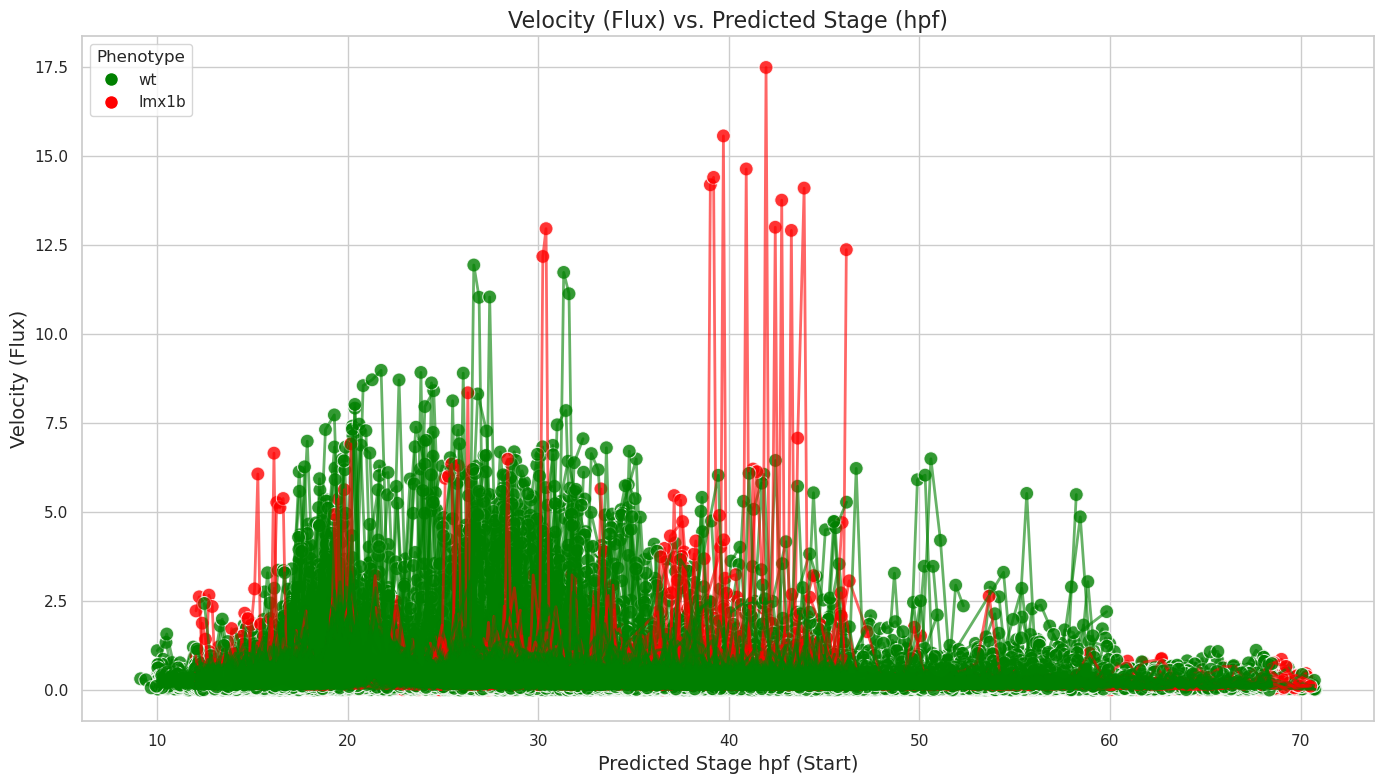

Velocity plot saved to /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/velocity_plot.png


<Figure size 640x480 with 0 Axes>

In [150]:
# Define the directory where you want to save the plot
save_directory = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107"

# Plot the velocities

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

def plot_velocity(velocity_df, save_dir=None):
    """
    Plots velocity vs. predicted_stage_hpf_start, coloring by phenotype and connecting points per embryo_id.
    
    Parameters:
        velocity_df (pd.DataFrame): DataFrame with columns:
            ['embryo_id', 'phenotype', 'predicted_stage_hpf_start', 'velocity']
        save_dir (str, optional): Directory to save the plot as PNG or PDF. If None, plot is not saved.
    
    Returns:
        matplotlib.figure.Figure: The seaborn/matplotlib figure object.
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D
    
    # Set seaborn style for aesthetics
    sns.set(style="whitegrid")
    
    # Initialize the matplotlib figure
    plt.figure(figsize=(14, 8))
    
    # Define color palette for phenotypes
    # Customize colors as needed
    palette = {"wt": "green", "lmx1b": "red"}
    
    # Create a scatter plot with Seaborn
    scatter = sns.scatterplot(
        data=velocity_df,
        x='predicted_stage_hpf_start',
        y='velocity',
        hue='phenotype',
        palette=palette,
        edgecolor='w',
        s=100,
        alpha=0.8
    )
    
    # Overlay lines connecting points belonging to the same embryo_id
    # Sort the DataFrame by 'embryo_id' and 'predicted_stage_hpf_start' to ensure proper line connections
    velocity_df_sorted = velocity_df.sort_values(by=['embryo_id', 'predicted_stage_hpf_start'])
    
    # Group by 'embryo_id' and plot lines
    for embryo_id, group in velocity_df_sorted.groupby('embryo_id'):
        plt.plot(
            group['predicted_stage_hpf_start'],
            group['velocity'],
            color=palette.get(group['phenotype'].iloc[0], "gray"),
            linestyle='-',
            linewidth=2,
            alpha=0.6,
            label=f"{group['phenotype'].iloc[0]} - {embryo_id}"
        )
    
    # Create custom legend handles to avoid duplicate labels
    # We only want to show phenotype colors in the legend
    handles = [
        Line2D([0], [0], marker='o', color='w', label=phen,
               markerfacecolor=palette[phen], markersize=10)
        for phen in palette
    ]
    
    # Add the custom legend to the plot
    plt.legend(handles=handles, title='Phenotype', loc='upper left')
    
    # Set plot labels and title
    plt.title('Velocity (Flux) vs. Predicted Stage (hpf)', fontsize=16)
    plt.xlabel('Predicted Stage hpf (Start)', fontsize=14)
    plt.ylabel('Velocity (Flux)', fontsize=14)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Save the plot if a save directory is provided
    if save_dir:
        # Ensure the save directory exists
        os.makedirs(save_dir, exist_ok=True)
        # Define the file path (PNG format)
        plot_path = os.path.join(save_dir, 'velocity_plot.png')  # Change to .pdf if needed
        plt.savefig(plot_path, dpi=300)
        print(f"Velocity plot saved to {plot_path}")
    
    # Return the current figure
    return plt.gcf()
fig = plot_velocity(x, save_dir=save_directory)

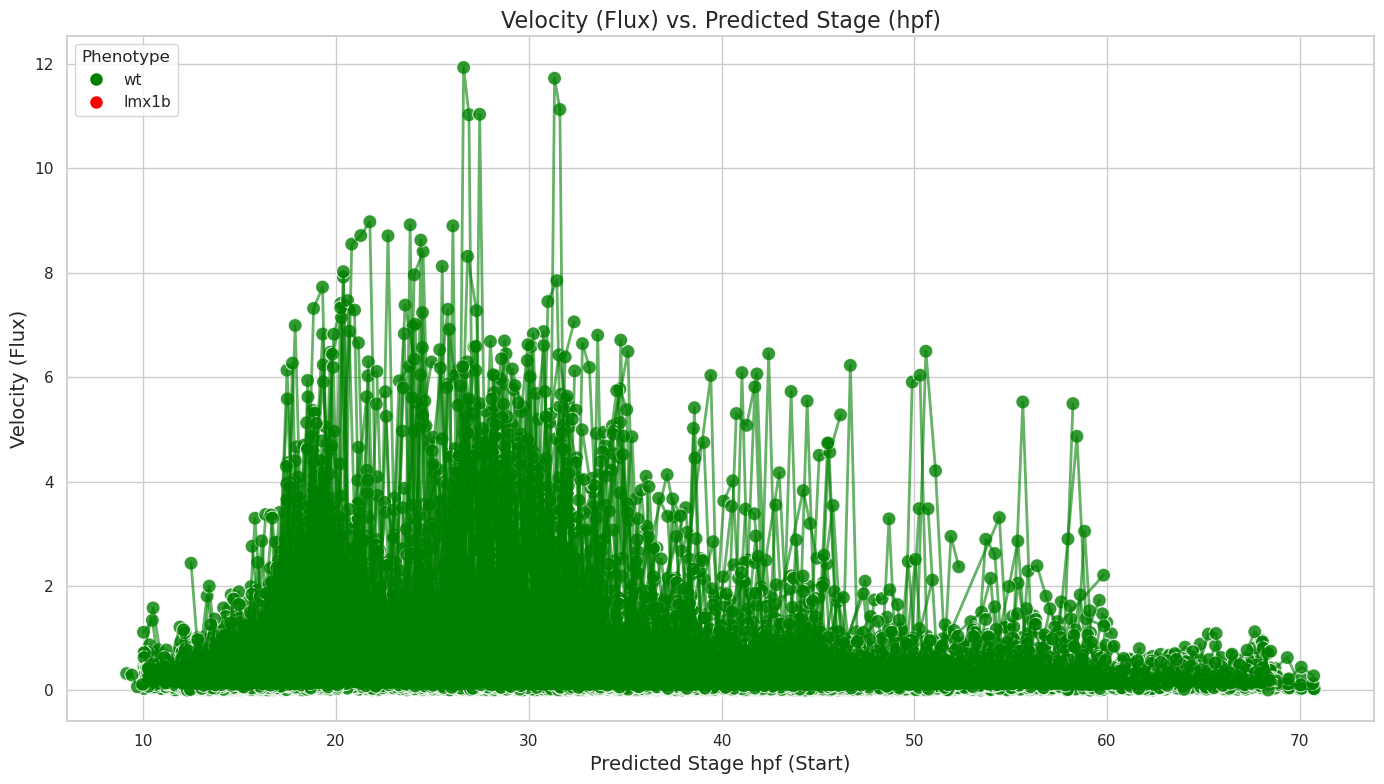

Velocity plot saved to /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/velocity_plot.png


<Figure size 640x480 with 0 Axes>

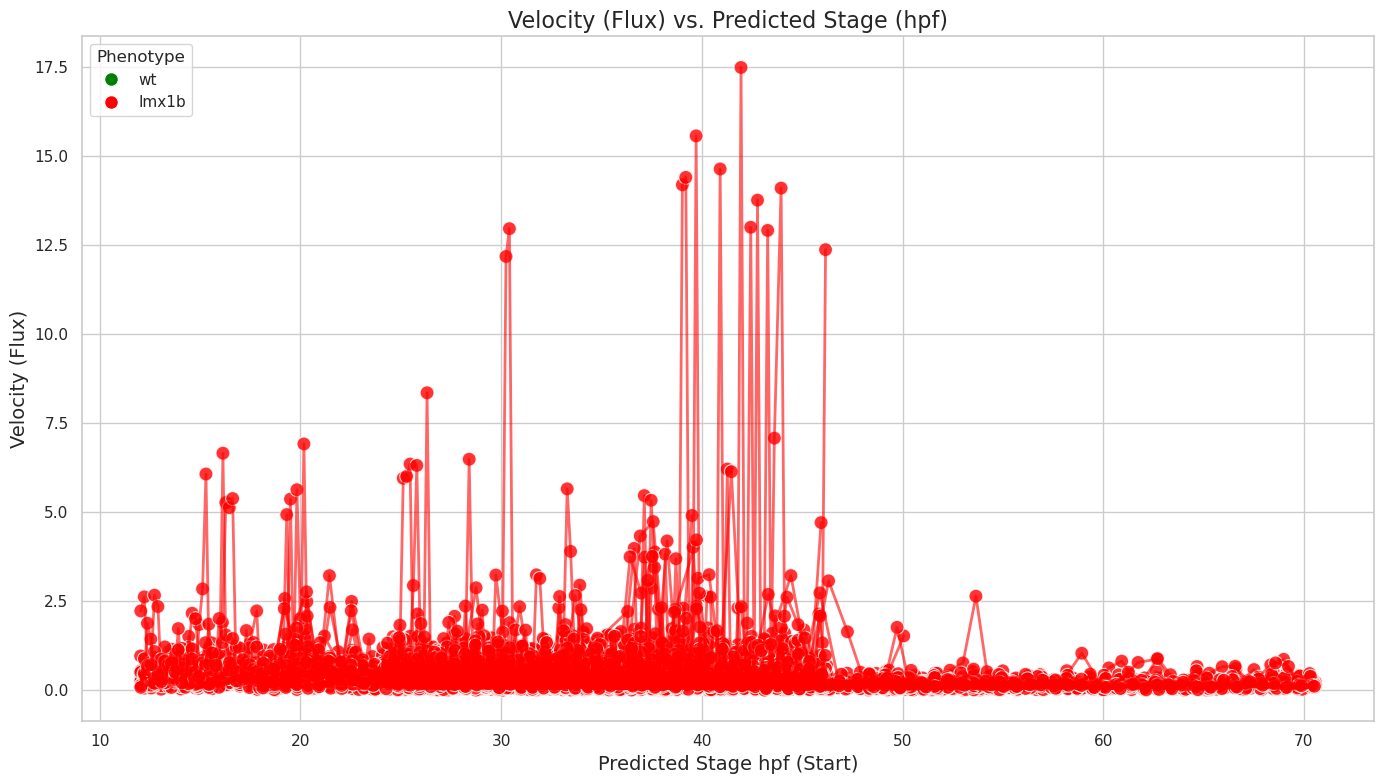

Velocity plot saved to /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/velocity_plot.png


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [152]:
plot_velocity(velocity_df[velocity_df["phenotype"]=="wt"], save_dir=save_directory)
plot_velocity(velocity_df[velocity_df["phenotype"]=="lmx1b"], save_dir=save_directory)

# Time delay calculations

In [279]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def plot_development_delay(
    wt_splines_n_planes,
    lmx1b_projection,
    wt_projection,
    save_dir=".",
    file_prefix="dev_delay",
    min_images=5,
    max_embryos_per_phenotype=25,
    smoothing_window=1,
    random_seed=None
):
    """
    Plots developmental delay for each embryo over time with optional smoothing.
    
    The plot shows predicted_stage_hpf (x-axis) vs time_delay (y-axis), where
    time_delay = predicted_stage_hpf - segment_avg_time (from WT spline).
    
    Each embryo is a separate trace (lines+markers), colored by phenotype.
    Optionally, the time_delay can be smoothed over 'smoothing_window' time points.
    
    Parameters
    ----------
    wt_splines_n_planes : pd.DataFrame
        The reference WT spline DataFrame. Must contain at least:
            - seg_id
            - segment_avg_time
    lmx1b_projection : pd.DataFrame
        A projection DataFrame with columns:
            - ref_seg_id (to match seg_id)
            - embryo_id
            - phenotype
            - predicted_stage_hpf
            - snip_id
            - ... (other columns)
    wt_projection : pd.DataFrame
        Similar structure to lmx1b_projection for WT points.
    save_dir : str, optional
        Directory to save the resulting HTML file.
    file_prefix : str, optional
        Filename prefix for the saved plot HTML.
    min_images : int, optional
        Minimum number of data points required for an embryo to be included.
    max_embryos_per_phenotype : int, optional
        Maximum number of embryo_ids to randomly select per phenotype.
    smoothing_window : int, optional
        Number of time points to average over for smoothing the time_delay.
        Default is 1 (no smoothing).
    random_seed : int, optional
        For reproducible random selection if you choose to sample. By default None.
    
    Returns
    -------
    fig : go.Figure
        The Plotly figure object with the 2D lines+markers plot.
    """
    
    # -------------------------
    # 0. Optional: Seed for Reproducibility
    # -------------------------
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # -------------------------
    # 1. Prepare Save Directory
    # -------------------------
    os.makedirs(save_dir, exist_ok=True)
    
    # -------------------------
    # 2. Concatenate Projection DataFrames
    # -------------------------
    df_proj = pd.concat([lmx1b_projection, wt_projection], ignore_index=True)
    
    # Ensure required columns are present
    required_cols = ["ref_seg_id", "embryo_id", "phenotype", "predicted_stage_hpf", "snip_id"]
    for col in required_cols:
        if col not in df_proj.columns:
            raise ValueError(f"Column '{col}' is missing in projection DataFrame.")
    
    # -------------------------
    # 3. Merge with WT Spline Data to Get 'segment_avg_time'
    # -------------------------
    if "seg_id" not in wt_splines_n_planes.columns or "segment_avg_time" not in wt_splines_n_planes.columns:
        raise ValueError("wt_splines_n_planes must have 'seg_id' and 'segment_avg_time' columns.")
    
    df_merged = df_proj.merge(
        wt_splines_n_planes[['seg_id', 'segment_avg_time']],
        left_on='ref_seg_id',
        right_on='seg_id',
        how='left'
    )
    
    # Drop rows with missing 'segment_avg_time'
    df_merged = df_merged.dropna(subset=['segment_avg_time'])
    
    # -------------------------
    # 4. Compute 'time_delay'
    # -------------------------
    df_merged['time_delay'] = df_merged['predicted_stage_hpf'] - df_merged['segment_avg_time']
    
    # -------------------------
    # 5. Filter Embryos by Minimum Data Points
    # -------------------------
    embryo_counts = df_merged.groupby('embryo_id').size()
    valid_embryos = embryo_counts[embryo_counts >= min_images].index
    df_filtered = df_merged[df_merged['embryo_id'].isin(valid_embryos)]
    
    if df_filtered.empty:
        print(f"No embryos have at least {min_images} data points. Exiting.")
        return None
    
    # -------------------------
    # 6. Downsample Embryos per Phenotype
    # -------------------------
    chosen_embryos = []
    for phen in df_filtered['phenotype'].unique():
        phen_df = df_filtered[df_filtered['phenotype'] == phen]
        embryo_ids = phen_df['embryo_id'].unique()
        if len(embryo_ids) > max_embryos_per_phenotype:
            chosen = np.random.choice(embryo_ids, max_embryos_per_phenotype, replace=False)
        else:
            chosen = embryo_ids
        chosen_embryos.extend([(phen, e) for e in chosen])
    
    if not chosen_embryos:
        print("No embryos selected after downsampling.")
        return None
    
    # -------------------------
    # 7. Define Color Mapping for Phenotypes
    # -------------------------
    phenotypes = list(df_filtered['phenotype'].unique())
    palette = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']
    phen_color_map = {phen: palette[i % len(palette)] for i, phen in enumerate(phenotypes)}
    
    # -------------------------
    # 8. Initialize Plotly Figure
    # -------------------------
    fig = go.Figure()
    
    # -------------------------
    # 9. Add Traces for Each Embryo with Smoothing
    # -------------------------
    for (phen, embryo) in chosen_embryos:
        embryo_df = df_filtered[
            (df_filtered['phenotype'] == phen) &
            (df_filtered['embryo_id'] == embryo)
        ].sort_values('predicted_stage_hpf')
        
        if embryo_df.empty:
            continue
        
        # Apply smoothing to 'time_delay' if smoothing_window > 1
        if smoothing_window > 1:
            # Use rolling window with center=True to center the window
            embryo_df['time_delay_smooth'] = embryo_df['time_delay'].rolling(
                window=smoothing_window, min_periods=1, center=True
            ).mean()
        else:
            # No smoothing; use original 'time_delay'
            embryo_df['time_delay_smooth'] = embryo_df['time_delay']
        
        # Assign color based on phenotype
        line_color = phen_color_map.get(phen, 'gray')
        
        # Add trace with smoothed 'time_delay'
        fig.add_trace(
            go.Scatter(
                x=embryo_df['predicted_stage_hpf'],
                y=embryo_df['time_delay_smooth'],
                mode='lines+markers',
                name=f"{phen} - {embryo}",
                line=dict(color=line_color, width=2),
                marker=dict(size=6, color=line_color),
                hovertemplate=(
                    "Phenotype: %{customdata[0]}<br>"
                    "Time Delay (Original): %{customdata[1]:.2f}<br>"
                    "Time Delay (Smoothed): %{y:.2f}<br>"
                    "Embryo ID: %{customdata[2]}<br>"
                    "Snip ID: %{customdata[3]}<br>"
                    "Predicted Stage (hpf): %{x:.2f}<br>"
                    "Segment Avg Time: %{customdata[4]:.2f}<extra></extra>"
                ),
                customdata=np.stack([
                    embryo_df['phenotype'],
                    embryo_df['time_delay'],
                    embryo_df['embryo_id'],
                    embryo_df['snip_id'],
                    embryo_df['segment_avg_time']
                ], axis=1),
                showlegend=True
            )
        )
    
    # -------------------------
    # 10. Update Layout
    # -------------------------
    fig.update_layout(
        title="Developmental Delay Over Time",
        xaxis_title="Predicted Stage (hpf)",
        yaxis_title="Time Delay (predicted_stage_hpf - segment_avg_time)",
        legend=dict(
            title="Phenotype - Embryo",
            itemsizing='constant',
            x=0.8,
            y=1.0
        ),
        width=1000,
        height=700,
        margin=dict(l=0, r=200, b=0, t=50)  # Increased right margin to avoid legend overlap
    )
    
    # -------------------------
    # 11. Save Plot as HTML
    # -------------------------
    outfile = os.path.join(save_dir, f"{file_prefix}_dev_delay.html")
    fig.write_html(outfile)
    print(f"Developmental delay plot saved to: {outfile}")
    
    return fig

In [281]:

# Call the function
fig = plot_development_delay(
    wt_splines_n_planes=wt_splines_n_planes,
    lmx1b_projection=lmx1b_projection,
    wt_projection=wt_projection,
    save_dir=save_directory,
    file_prefix="my_dev_delay_smoothened",
    min_images=10,  # Ensures embryos have at least 2 points
    max_embryos_per_phenotype=50,
    random_seed=42,  # For reproducible downsampling
    smoothing_window=3,  # Smooth over 3 time points
)

Developmental delay plot saved to: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/my_dev_delay_smoothened_dev_delay.html


In [285]:
df_augmented[df_augmented["phenotype"] == "inj-ctrl"]

,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,length_um,...,PCA_2,PCA_3,embryo_id,class_num,pred_prob_wnt-i,pred_prob_tgfb-i,pred_prob_wt,pred_prob_lmx1b,pred_prob_gdf3,segment_id


In [291]:

inj_ctrl_df


,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,length_um,...,UMAP_01_bio_3,UMAP_02_bio_3,UMAP_00_n_3,UMAP_01_n_3,UMAP_02_n_3,color,PCA_1,PCA_2,PCA_3,embryo_id
28447,28447,20230830_A03_e00_t0000,20230830,EM,inj-ctrl_wik,1,inj-ctrl,48.047985,7.482679e+05,2102.034561,...,6.616081,3.782840,-0.221502,2.750697,10.313026,NaN,-0.309362,-0.595027,0.586788,20230830_A03_e00
28451,28451,20230830_B03_e00_t0000,20230830,EM,inj-ctrl_wik,1,inj-ctrl,48.051002,7.282171e+05,2163.857302,...,6.591870,3.870285,-2.354985,-2.754916,14.129728,NaN,-0.153632,-0.862967,0.580450,20230830_B03_e00
28455,28455,20230830_C03_e00_t0000,20230830,EM,inj-ctrl_wik,1,inj-ctrl,48.054030,7.187287e+05,2104.082433,...,6.608363,3.752576,-0.170018,2.830496,10.320886,NaN,-0.342149,-0.595646,0.602836,20230830_C03_e00
28459,28459,20230830_D03_e00_t0000,20230830,EM,inj-ctrl_wik,1,inj-ctrl,48.057069,8.507303e+05,2263.089261,...,4.785081,4.521818,-1.901242,-0.725795,11.490608,NaN,0.167379,-1.152017,0.612246,20230830_D03_e00
28463,28463,20230830_E03_e00_t0000,20230830,EM,inj-ctrl_wik,1,inj-ctrl,48.060958,8.371841e+05,2237.850634,...,6.721833,4.344726,-2.329923,-2.834824,14.187023,NaN,-0.336459,-0.874867,0.284153,20230830_E03_e00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55480,55480,20240510_F07_e00_t0000,20240510,EM,inj-ctrl_ab,1,inj-ctrl,48.186467,1.199039e+06,3048.120529,...,2.630485,4.374999,-0.390976,-1.015979,4.703045,NaN,0.527164,-1.951346,0.486663,20240510_F07_e00
55484,55484,20240510_G04_e00_t0000,20240510,EM,inj-ctrl_ab,1,inj-ctrl,36.070580,1.058214e+06,2779.426935,...,6.473687,3.930164,-0.048480,-1.656980,5.772696,NaN,-0.843173,-1.528337,0.066795,20240510_G04_e00
55487,55487,20240510_G07_e00_t0000,20240510,EM,inj-ctrl_ab,1,inj-ctrl,48.190606,1.249144e+06,3149.399217,...,2.528078,4.298550,-0.596060,-1.043903,4.595152,NaN,0.623977,-1.857724,0.515351,20240510_G07_e00
55491,55491,20240510_H04_e00_t0000,20240510,EM,inj-ctrl_ab,1,inj-ctrl,36.066485,1.141297e+06,2892.284403,...,8.072947,3.137120,0.280451,-1.370520,5.193442,NaN,-0.759343,-1.623607,-0.369415,20240510_H04_e00


In [282]:
# Suppose we have:
# df_augmented       -> your main augmented DataFrame with "wt" and "lmx1b" (and others)
# segment_info_df    -> from create_spline_segments_for_df
# We pick "wt" splines for reference:
lmx1b_splines_n_planes = segment_info_df[segment_info_df["phenotype"] == "lmx1b"]

# A) Points from "wt" itself
wt_pert_df = df_augmented[df_augmented["phenotype"] == "wt"]
wt_projection_to_lmx1b = project_points_onto_reference_spline(
    wt_pert_df,
    lmx1b_splines_n_planes
)

# B) Points from "lmx1b"
lmx1b_pert_df = df_augmented[df_augmented["phenotype"] == "lmx1b"]
lmx1b_projection_to_lmx1b = project_points_onto_reference_spline(
    lmx1b_pert_df,
    lmx1b_splines_n_planes
)


# Call the function
fig = plot_development_delay(
    wt_splines_n_planes=lmx1b_splines_n_planes,
    lmx1b_projection=lmx1b_projection_to_lmx1b,
    wt_projection=wt_projection_to_lmx1b,
    save_dir=save_directory,
    file_prefix="my_dev_delay_smoothened_proj_lmx1b",
    min_images=10,  # Ensures embryos have at least 2 points
    max_embryos_per_phenotype=100,
    random_seed=42,  # For reproducible downsampling
    smoothing_window=5,  # Smooth over 3 time points
)

## improved dev delat function

In [33]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def plot_development_delay(
    spline_df,
    projection_dfs,
    save_dir=".",
    file_prefix="dev_delay",
    min_images=5,
    max_embryos_per_phenotype=25,
    smoothing_window=1,
    random_seed=None
):
    """
    Plots developmental delay for multiple embryos over time with optional smoothing.
    
    The plot shows predicted_stage_hpf (x-axis) vs time_delay (y-axis), where
    time_delay = predicted_stage_hpf - segment_avg_time (from spline).
    
    Each embryo is a separate trace (lines+markers), colored by phenotype.
    Optionally, the time_delay can be smoothed over 'smoothing_window' time points.
    
    Parameters
    ----------
    spline_df : pd.DataFrame
        The reference spline DataFrame. Must contain at least:
            - seg_id
            - segment_avg_time
    projection_dfs : list of pd.DataFrame
        A list of projection DataFrames. Each DataFrame must contain columns:
            - ref_seg_id (to match seg_id)
            - embryo_id
            - phenotype
            - predicted_stage_hpf
            - snip_id
            - ... (other relevant columns)
    save_dir : str, optional
        Directory to save the resulting HTML file.
    file_prefix : str, optional
        Filename prefix for the saved plot HTML.
    min_images : int, optional
        Minimum number of data points required for an embryo to be included.
    max_embryos_per_phenotype : int, optional
        Maximum number of embryo_ids to randomly select per phenotype.
    smoothing_window : int, optional
        Number of time points to average over for smoothing the time_delay.
        Default is 1 (no smoothing).
    random_seed : int, optional
        For reproducible random selection if you choose to sample. By default None.
    
    Returns
    -------
    fig : go.Figure
        The Plotly figure object with the 2D lines+markers plot.
    """
    
    # -------------------------
    # 0. Optional: Seed for Reproducibility
    # -------------------------
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # -------------------------
    # 1. Prepare Save Directory
    # -------------------------
    os.makedirs(save_dir, exist_ok=True)
    
    # -------------------------
    # 2. Concatenate All Projection DataFrames
    # -------------------------
    if not isinstance(projection_dfs, list):
        raise TypeError("projection_dfs must be a list of pandas DataFrames.")
    
    df_proj = pd.concat(projection_dfs, ignore_index=True)
    
    # Ensure required columns are present
    required_cols = ["ref_seg_id", "embryo_id", "phenotype", "predicted_stage_hpf", "snip_id"]
    missing_cols = [col for col in required_cols if col not in df_proj.columns]
    if missing_cols:
        raise ValueError(f"The following required columns are missing in projection DataFrames: {missing_cols}")
    
    # -------------------------
    # 3. Merge with Spline Data to Get 'segment_avg_time'
    # -------------------------
    if "seg_id" not in spline_df.columns or "segment_avg_time" not in spline_df.columns:
        raise ValueError("spline_df must have 'seg_id' and 'segment_avg_time' columns.")
    
    df_merged = df_proj.merge(
        spline_df[['seg_id', 'segment_avg_time']],
        left_on='ref_seg_id',
        right_on='seg_id',
        how='left'
    )
    
    # Drop rows with missing 'segment_avg_time'
    df_merged = df_merged.dropna(subset=['segment_avg_time'])
    
    # -------------------------
    # 4. Compute 'time_delay'
    # -------------------------
    df_merged['time_delay'] = df_merged['predicted_stage_hpf'] - df_merged['segment_avg_time']
    
    # -------------------------
    # 5. Filter Embryos by Minimum Data Points
    # -------------------------
    embryo_counts = df_merged.groupby('embryo_id').size()
    valid_embryos = embryo_counts[embryo_counts >= min_images].index
    df_filtered = df_merged[df_merged['embryo_id'].isin(valid_embryos)]
    
    if df_filtered.empty:
        print(f"No embryos have at least {min_images} data points. Exiting.")
        return None
    
    # -------------------------
    # 6. Downsample Embryos per Phenotype
    # -------------------------
    chosen_embryos = []
    for phen in df_filtered['phenotype'].unique():
        phen_df = df_filtered[df_filtered['phenotype'] == phen]
        embryo_ids = phen_df['embryo_id'].unique()
        if len(embryo_ids) > max_embryos_per_phenotype:
            chosen = np.random.choice(embryo_ids, max_embryos_per_phenotype, replace=False)
        else:
            chosen = embryo_ids
        chosen_embryos.extend([(phen, e) for e in chosen])
    
    if not chosen_embryos:
        print("No embryos selected after downsampling.")
        return None
    
    # -------------------------
    # 7. Define Color Mapping for Phenotypes
    # -------------------------
    # Determine unique phenotypes in the selected data
    selected_phenotypes = df_filtered['phenotype'].unique()
    num_phenotypes = len(selected_phenotypes)
    
    # Generate a color palette
    # You can choose any Plotly color palette or define your own
    # Here, we'll use Plotly's qualitative palette which can handle up to 10 distinct colors
    import plotly.express as px
    color_palette = px.colors.qualitative.Plotly
    
    if num_phenotypes > len(color_palette):
        # If more phenotypes than colors in the palette, extend the palette
        extended_palette = color_palette * (num_phenotypes // len(color_palette) + 1)
    else:
        extended_palette = color_palette
    
    phen_color_map = {phen: extended_palette[i] for i, phen in enumerate(selected_phenotypes)}
    
    # -------------------------
    # 8. Initialize Plotly Figure
    # -------------------------
    fig = go.Figure()
    
    # -------------------------
    # 9. Add Traces for Each Embryo with Optional Smoothing
    # -------------------------
    for (phen, embryo) in chosen_embryos:
        embryo_df = df_filtered[
            (df_filtered['phenotype'] == phen) &
            (df_filtered['embryo_id'] == embryo)
        ].sort_values('predicted_stage_hpf')
        
        if embryo_df.empty:
            continue
        
        # Apply smoothing to 'time_delay' if smoothing_window > 1
        if smoothing_window > 1:
            # Use rolling window with center=True to center the window
            embryo_df['time_delay_smooth'] = embryo_df['time_delay'].rolling(
                window=smoothing_window, min_periods=1, center=True
            ).mean()
        else:
            # No smoothing; use original 'time_delay'
            embryo_df['time_delay_smooth'] = embryo_df['time_delay']
        
        # Assign color based on phenotype
        line_color = phen_color_map.get(phen, 'gray')
        
        # Add trace with smoothed 'time_delay'
        fig.add_trace(
            go.Scatter(
                x=embryo_df['predicted_stage_hpf'],
                y=embryo_df['time_delay_smooth'],
                mode='lines+markers',
                name=f"{phen} - {embryo}",
                line=dict(color=line_color, width=2),
                marker=dict(size=6, color=line_color),
                hovertemplate=(
                    "Phenotype: %{customdata[0]}<br>"
                    "Time Delay (Original): %{customdata[1]:.2f}<br>"
                    "Time Delay (Smoothed): %{y:.2f}<br>"
                    "Embryo ID: %{customdata[2]}<br>"
                    "Snip ID: %{customdata[3]}<br>"
                    "Predicted Stage (hpf): %{x:.2f}<br>"
                    "Segment Avg Time: %{customdata[4]:.2f}<extra></extra>"
                ),
                customdata=np.stack([
                    embryo_df['phenotype'],
                    embryo_df['time_delay'],
                    embryo_df['embryo_id'],
                    embryo_df['snip_id'],
                    embryo_df['segment_avg_time']
                ], axis=1),
                showlegend=True
            )
        )
    
    # -------------------------
    # 10. Update Layout
    # -------------------------
    fig.update_layout(
        title="Developmental Delay Over Time",
        xaxis_title="Predicted Stage (hpf)",
        yaxis_title="Time Delay (predicted_stage_hpf - segment_avg_time)",
        legend=dict(
            title="Phenotype - Embryo",
            itemsizing='constant',
            x=0.8,
            y=1.0
        ),
        width=1000,
        height=700,
        margin=dict(l=0, r=200, b=0, t=50)  # Increased right margin to avoid legend overlap
    )
    
    # -------------------------
    # 11. Save Plot as HTML
    # -------------------------
    outfile = os.path.join(save_dir, f"{file_prefix}_dev_delay.html")
    fig.write_html(outfile)
    print(f"Developmental delay plot saved to: {outfile}")
    
    return fig

In [297]:
wt_pert_df = df_augmented[df_augmented["phenotype"] == "wt"]
wt_projection_to_wt = project_points_onto_reference_spline(
    wt_pert_df,
    wt_splines_n_planes
)

In [ ]:
segment_info_df

In [31]:
# Suppose we have:
# df_augmented       -> your main augmented DataFrame with "wt" and "lmx1b" (and others)
# segment_info_df    -> from create_spline_segments_for_df
# We pick "wt" splines for reference:
wt_splines_n_planes = segment_info_df[segment_info_df["phenotype"] == "wt"]

# A) Points from "wt" itself
wt_pert_df = df_augmented[df_augmented["phenotype"] == "wt"]
wt_projection_to_wt = project_points_onto_reference_spline(
    wt_pert_df,
    wt_splines_n_planes
)

# B) Points from "lmx1b"
lmx1b_pert_df = df_augmented[df_augmented["phenotype"] == "lmx1b"]
lmx1b_projection_to_wt = project_points_onto_reference_spline(
    lmx1b_pert_df,
    wt_splines_n_planes
)

wnt_i_pert_df = df_augmented[df_augmented["phenotype"] == "wnt-i"]
wnt_i_projection_to_wt = project_points_onto_reference_spline(
    wnt_i_pert_df,
    wt_splines_n_planes
)

gdf3_pert_df = df_augmented[df_augmented["phenotype"] == "gdf3"]
gdf3_projection_to_wt = project_points_onto_reference_spline(
    gdf3_pert_df,
    wt_splines_n_planes
)

inj_ctrl_df = df[df["phenotype"]=="inj-ctrl"]
inj_ctrl_projection_to_wt = project_points_onto_reference_spline(
    inj_ctrl_df,
    wt_splines_n_planes
)


uncertain_df = df[df["phenotype"]=="uncertain"]
uncertain_df_projection_to_wt = project_points_onto_reference_spline(
    uncertain_df,
    wt_splines_n_planes
)



In [25]:
df["phenotype"].unique()

array(['wt', 'gdf3', 'shh-i', 'ethanol', 'fgf-i', 'lmx1b', 'inj-ctrl',
       'tbxta', 'uncertain', 'DMSO', 'notch-i', 'tgfb-i', 'noto', 'wnt-i',
       'tbx16', 'tbx2b', 'tbx2b:tbx2a', 'nfatc1', 'nfatc:gata2a', 'tbx6',
       'smyda:smydb', 'smad5', 'ctrl-inj', 'meox1', 'sox10', 'tbx5a',
       'meox1:sox1', 'meox1:tbx5a', 'sox10:tbx5a'], dtype=object)

In [10]:
wt_projection_to_wt

,snip_id,embryo_id,phenotype,predicted_stage_hpf,PCA_1,PCA_2,PCA_3,ref_seg_id,closest_on_spline_x,closest_on_spline_y,closest_on_spline_z,plane_point_x,plane_point_y,plane_point_z,distance_to_plane,distance_to_axis,hypotenuse
0,20230525_A03_e00_t0001,20230525_A03_e00,wt,15.105656,1.901070,-0.127321,-1.101198,3,1.953785,-0.043151,-1.006570,1.906880,-0.041633,-1.007983,0.126748,0.104307,0.164149
1,20230525_A03_e00_t0002,20230525_A03_e00,wt,15.638449,1.680511,0.055609,-1.526103,6,1.821913,0.377326,-1.385814,1.673781,0.277129,-1.291201,0.322948,0.210035,0.385240
2,20230525_A03_e00_t0003,20230525_A03_e00,wt,16.171827,1.760055,0.062241,-1.725102,6,1.796845,0.395037,-1.401162,1.750370,0.381063,-1.387020,0.464801,0.049483,0.467428
3,20230525_A03_e00_t0004,20230525_A03_e00,wt,16.706109,1.667349,0.168485,-1.763052,6,1.694922,0.467046,-1.463564,1.658648,0.454928,-1.459305,0.417598,0.124528,0.435769
4,20230525_A03_e00_t0005,20230525_A03_e00,wt,17.238502,1.493429,0.169785,-1.978279,7,1.514457,0.572310,-1.554420,1.548402,0.576968,-1.559111,0.586960,0.060201,0.590040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9290,20241023_H04_e00_t0035,20241023_H04_e00,wt,48.651291,0.796327,-1.971544,0.462619,43,0.775786,-1.933339,0.490496,0.767657,-1.966650,0.492455,0.041666,0.045549,0.061732
9291,20241023_H04_e00_t0036,20241023_H04_e00,wt,49.153548,0.619116,-1.978784,0.450740,43,0.662969,-1.927635,0.399549,0.667910,-1.987114,0.399962,0.070913,0.120290,0.139636
9292,20241023_H04_e00_t0037,20241023_H04_e00,wt,49.655406,0.794349,-1.981253,0.450484,43,0.768966,-1.932994,0.484998,0.759852,-1.975364,0.486384,0.050135,0.047799,0.069270
9293,20241023_H04_e00_t0038,20241023_H04_e00,wt,50.155134,0.920570,-1.950069,0.624578,44,0.928709,-1.942470,0.615344,0.928331,-1.952574,0.616114,0.011753,0.023372,0.026161


In [12]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

def plot_hypotenuse_vs_time_diff(
    spline_df,
    projection_dfs,
    save_dir=".",
    file_prefix="hypotenuse_vs_time_diff",
    min_images=5,
    max_embryos_per_phenotype=25,
    smoothing_window=1,
    random_seed=None
):
    """
    Plots a scatter plot of hypotenuse vs. time_diff for multiple embryos across multiple projection DataFrames.
    
    Parameters
    ----------
    spline_df : pd.DataFrame
        The reference spline DataFrame. Must contain at least:
            - seg_id
            - segment_avg_time
    projection_dfs : list of pd.DataFrame
        A list of projection DataFrames. Each DataFrame must contain columns:
            - hypotenuse
            - predicted_stage_hpf
            - ref_seg_id
            - embryo_id
            - phenotype
            - snip_id
            - ... (other relevant columns)
    save_dir : str, optional
        Directory to save the resulting HTML file.
    file_prefix : str, optional
        Filename prefix for the saved plot HTML.
    min_images : int, optional
        Minimum number of data points required for an embryo to be included.
    max_embryos_per_phenotype : int, optional
        Maximum number of embryo_ids to randomly select per phenotype.
    smoothing_window : int, optional
        Number of time points to average over for smoothing the time_diff.
        Default is 1 (no smoothing).
    random_seed : int, optional
        For reproducible random selection if downsampling is applied.
        Default is None.
    
    Returns
    -------
    fig : plotly.graph_objects.Figure
        The Plotly figure object with the scatter plot.
    """
    
    # -------------------------
    # 0. Optional: Seed for Reproducibility
    # -------------------------
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # -------------------------
    # 1. Prepare Save Directory
    # -------------------------
    os.makedirs(save_dir, exist_ok=True)
    
    # -------------------------
    # 2. Validate Input Projection DataFrames
    # -------------------------
    if not isinstance(projection_dfs, list):
        raise TypeError("projection_dfs must be a list of pandas DataFrames.")
    
    required_cols = ["hypotenuse", "predicted_stage_hpf", "ref_seg_id", "embryo_id", "phenotype", "snip_id"]
    for idx, df in enumerate(projection_dfs):
        missing = [col for col in required_cols if col not in df.columns]
        if missing:
            raise ValueError(f"Projection DataFrame at index {idx} is missing columns: {missing}")
    
    # -------------------------
    # 3. Concatenate All Projection DataFrames
    # -------------------------
    df_proj = pd.concat(projection_dfs, ignore_index=True)
    
    # -------------------------
    # 4. Merge with Spline Data to Get 'segment_avg_time'
    # -------------------------
    if "seg_id" not in spline_df.columns or "segment_avg_time" not in spline_df.columns:
        raise ValueError("spline_df must have 'seg_id' and 'segment_avg_time' columns.")
    
    df_merged = df_proj.merge(
        spline_df[['seg_id', 'segment_avg_time']],
        left_on='ref_seg_id',
        right_on='seg_id',
        how='left'
    )
    
    # Drop rows with missing 'segment_avg_time'
    df_merged = df_merged.dropna(subset=['segment_avg_time'])
    
    # -------------------------
    # 5. Compute 'time_diff'
    # -------------------------
    df_merged['time_diff'] = df_merged['predicted_stage_hpf'] - df_merged['segment_avg_time']
    
    # -------------------------
    # 6. Filter Embryos by Minimum Data Points
    # -------------------------
    embryo_counts = df_merged.groupby('embryo_id').size()
    valid_embryos = embryo_counts[embryo_counts >= min_images].index
    df_filtered = df_merged[df_merged['embryo_id'].isin(valid_embryos)]
    
    if df_filtered.empty:
        print(f"No embryos have at least {min_images} data points. Exiting.")
        return None
    
    # -------------------------
    # 7. Downsample Embryos per Phenotype
    # -------------------------
    chosen_embryos = []
    for phen in df_filtered['phenotype'].unique():
        phen_df = df_filtered[df_filtered['phenotype'] == phen]
        embryo_ids = phen_df['embryo_id'].unique()
        if len(embryo_ids) > max_embryos_per_phenotype:
            chosen = np.random.choice(embryo_ids, max_embryos_per_phenotype, replace=False)
        else:
            chosen = embryo_ids
        chosen_embryos.extend([(phen, e) for e in chosen])
    
    if not chosen_embryos:
        print("No embryos selected after downsampling.")
        return None
    
    # -------------------------
    # 8. Define Color Mapping for Phenotypes
    # -------------------------
    # Determine unique phenotypes in the selected data
    selected_phenotypes = df_filtered['phenotype'].unique()
    num_phenotypes = len(selected_phenotypes)
    
    # Generate a color palette using Plotly's qualitative palette
    color_palette = px.colors.qualitative.Plotly  # Up to 10 distinct colors
    if num_phenotypes > len(color_palette):
        # Extend the palette if needed
        extended_palette = color_palette * (num_phenotypes // len(color_palette) + 1)
    else:
        extended_palette = color_palette
    
    phen_color_map = {phen: extended_palette[i] for i, phen in enumerate(selected_phenotypes)}
    
    # -------------------------
    # 9. Initialize Plotly Figure
    # -------------------------
    fig = go.Figure()
    
    # -------------------------
    # 10. Add Scatter Traces for Each Embryo
    # -------------------------
    for (phen, embryo) in chosen_embryos:
        embryo_df = df_filtered[
            (df_filtered['phenotype'] == phen) &
            (df_filtered['embryo_id'] == embryo)
        ].sort_values('predicted_stage_hpf')
        
        if embryo_df.empty:
            continue
        
        # Apply smoothing to 'time_diff' if smoothing_window > 1
        if smoothing_window > 1:
            embryo_df['time_diff_smooth'] = embryo_df['time_diff'].rolling(
                window=smoothing_window, min_periods=1, center=True
            ).mean()
        else:
            embryo_df['time_diff_smooth'] = embryo_df['time_diff']
        
        # Assign color based on phenotype
        line_color = phen_color_map.get(phen, 'gray')
        
        # Add scatter trace
        fig.add_trace(
            go.Scatter(
                x=embryo_df['hypotenuse'],
                y=embryo_df['time_diff_smooth'],
                mode='lines+markers',
                name=f"{phen} - {embryo}",
                line=dict(color=line_color, width=2),
                marker=dict(size=6, color=line_color),
                hovertemplate=(
                    "Phenotype: %{customdata[0]}<br>"
                    "Time Diff (Original): %{customdata[1]:.2f}<br>"
                    "Time Diff (Smoothed): %{y:.2f}<br>"
                    "Embryo ID: %{customdata[2]}<br>"
                    "Snip ID: %{customdata[3]}<br>"
                    "Predicted Stage (hpf): %{customdata[4]:.2f}<br>"
                    "Segment Avg Time: %{customdata[5]:.2f}<extra></extra>"
                ),
                customdata=np.stack([
                    embryo_df['phenotype'],
                    embryo_df['time_diff'],
                    embryo_df['embryo_id'],
                    embryo_df['snip_id'],
                    embryo_df['predicted_stage_hpf'],
                    embryo_df['segment_avg_time']
                ], axis=1)
            )
        )
    
    # -------------------------
    # 11. Update Layout
    # -------------------------
    fig.update_layout(
        title="Hypotenuse vs Time Difference",
        xaxis_title="Hypotenuse",
        yaxis_title="Time Difference (predicted_stage_hpf - segment_avg_time)",
        legend=dict(
            title="Phenotype - Embryo",
            itemsizing='constant',
            x=0.8,
            y=1.0
        ),
        width=1000,
        height=700,
        margin=dict(l=50, r=250, b=50, t=100)  # Adjusted margins for clarity
    )
    
    # -------------------------
    # 12. Save Plot as HTML
    # -------------------------
    outfile = os.path.join(save_dir, f"{file_prefix}_hypotenuse_vs_time_diff.html")
    fig.write_html(outfile)
    print(f"Hypotenuse vs Time Difference plot saved to: {outfile}")
    
    return fig


# Prepare list of projection DataFrames
projection_dfs = [
    wt_projection_to_wt,
    lmx1b_projection_to_wt,
    inj_ctrl_projection_to_wt]
save_directory = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107"
# Call the updated function
fig = plot_hypotenuse_vs_time_diff(
    spline_df=wt_splines_n_planes,
    projection_dfs=projection_dfs,
    save_dir=save_directory,
    file_prefix="my_dev_delay_multi_proj",
    min_images=10,  # Ensures embryos have at least 10 points
    max_embryos_per_phenotype=1000,
    smoothing_window=1,  # Smooth over 5 time points
    random_seed=42  # For reproducible downsampling
)

Hypotenuse vs Time Difference plot saved to: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/my_dev_delay_multi_proj_hypotenuse_vs_time_diff.html


In [11]:
wt_splines_n_planes

,Unnamed: 0,phenotype,seg_id,segment_avg_time,segment_var_time,principal_axis_x,principal_axis_y,principal_axis_z,segment_midpoint_x,segment_midpoint_y,segment_midpoint_z,segment_start_x,segment_start_y,segment_start_z,segment_end_x,segment_end_y,segment_end_z
0,0,wt,0,12.465383,2.257618,0.160423,0.123332,0.979313,2.042012,-0.648302,-0.656583,2.092360,-0.690162,-0.697707,1.991664,-0.606441,-0.615459
1,1,wt,1,12.176554,2.004771,-0.417814,-0.329356,-0.846733,1.976457,-0.495533,-0.668610,1.991664,-0.606441,-0.615459,1.961250,-0.384625,-0.721761
2,2,wt,2,14.629201,17.692661,-0.313892,-0.593545,-0.741065,1.959757,-0.295495,-0.792825,1.961250,-0.384625,-0.721761,1.958265,-0.206365,-0.863888
3,3,wt,3,15.142377,4.885581,-0.045840,-0.676050,-0.735429,1.955648,-0.111008,-0.947249,1.958265,-0.206365,-0.863888,1.953030,-0.015651,-1.030610
4,4,wt,4,16.611350,8.012794,-0.228407,-0.690773,-0.686049,1.943216,0.077762,-1.115555,1.953030,-0.015651,-1.030610,1.933403,0.171176,-1.200501
5,5,wt,5,17.394150,7.359210,-0.189080,-0.725362,-0.661891,1.896970,0.260607,-1.281333,1.933403,0.171176,-1.200501,1.860538,0.350038,-1.362166
6,6,wt,6,17.828016,3.591695,-0.020837,0.685931,0.727369,1.769071,0.414659,-1.418166,1.860538,0.350038,-1.362166,1.677604,0.479281,-1.474167
7,7,wt,7,18.059059,5.140190,0.093656,0.693715,0.714134,1.576442,0.536966,-1.523929,1.677604,0.479281,-1.474167,1.475279,0.594650,-1.573692
8,8,wt,8,18.071403,4.370206,0.133786,0.644792,0.752558,1.372110,0.657617,-1.610579,1.475279,0.594650,-1.573692,1.268940,0.720584,-1.647466
9,9,wt,9,18.573126,4.511043,-0.393376,-0.519665,-0.758422,1.163344,0.789772,-1.652627,1.268940,0.720584,-1.647466,1.057749,0.858961,-1.657789


In [35]:

# Prepare List of Projection DataFrames
# -------------------------
projection_dfs = [
    wt_projection_to_wt,
    lmx1b_projection_to_wt,
    inj_ctrl_projection_to_wt,
    wnt_i_projection_to_wt,
    gdf3_projection_to_wt,
    uncertain_df_projection_to_wt,
]

# -------------------------
# Call the Updated Function
# -------------------------
fig = plot_development_delay(
    spline_df=wt_splines_n_planes,
    projection_dfs=projection_dfs,
    save_dir=save_directory,
    file_prefix="dev_delay_multi_proj_pert_comp_with_uncertain",
    min_images=10,  # Ensures embryos have at least 2 points
    max_embryos_per_phenotype=20,
    smoothing_window=5,  # Smooth over 3 time points
    random_seed=42  # For reproducible downsampling
)

Developmental delay plot saved to: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/dev_delay_multi_proj_pert_comp_with_uncertain_dev_delay.html


In [302]:
df["phenotype"].unique()

array(['wt', 'gdf3', 'shh-i', 'ethanol', 'fgf-i', 'lmx1b', 'inj-ctrl',
       'tbxta', 'uncertain', 'DMSO', 'notch-i', 'tgfb-i', 'noto', 'wnt-i',
       'tbx16', 'tbx2b', 'tbx2b:tbx2a', 'nfatc1', 'nfatc:gata2a', 'tbx6',
       'smyda:smydb', 'smad5', 'ctrl-inj', 'meox1', 'sox10', 'tbx5a',
       'meox1:sox1', 'meox1:tbx5a', 'sox10:tbx5a'], dtype=object)

In [301]:
wt_pert_df

,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,length_um,...,PCA_2,PCA_3,embryo_id,class_num,pred_prob_wnt-i,pred_prob_tgfb-i,pred_prob_wt,pred_prob_lmx1b,pred_prob_gdf3,segment_id
0,0,20230525_A03_e00_t0001,20230525,EM,wt_wik,0,wt,15.105656,4.745473e+05,878.622828,...,-0.127321,-1.101198,20230525_A03_e00,2,0.001626,0.041216,0.914527,0.033580,0.009051,3.0
1,1,20230525_A03_e00_t0002,20230525,EM,wt_wik,0,wt,15.638449,4.832259e+05,889.713055,...,0.055609,-1.526103,20230525_A03_e00,2,0.000389,0.011992,0.961044,0.015845,0.010729,6.0
2,2,20230525_A03_e00_t0003,20230525,EM,wt_wik,0,wt,16.171827,4.952603e+05,912.907907,...,0.062241,-1.725102,20230525_A03_e00,2,0.000353,0.012362,0.971306,0.013021,0.002959,6.0
3,3,20230525_A03_e00_t0004,20230525,EM,wt_wik,0,wt,16.706109,4.941031e+05,928.857645,...,0.168485,-1.763052,20230525_A03_e00,2,0.000120,0.005363,0.970987,0.011586,0.011944,6.0
4,4,20230525_A03_e00_t0005,20230525,EM,wt_wik,0,wt,17.238502,5.068318e+05,952.938404,...,0.169785,-1.978279,20230525_A03_e00,2,0.000031,0.003589,0.966876,0.014401,0.015103,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12762,89773,20241023_H04_e00_t0035,20241023,EM,wt_ab,0,wt,48.651291,1.421562e+06,3266.421928,...,-1.971544,0.462619,20241023_H04_e00,2,0.000166,0.000400,0.915211,0.083504,0.000719,43.0
12763,89774,20241023_H04_e00_t0036,20241023,EM,wt_ab,0,wt,49.153548,1.395998e+06,3192.147066,...,-1.978784,0.450740,20241023_H04_e00,2,0.000138,0.000265,0.928654,0.070632,0.000311,43.0
12764,89775,20241023_H04_e00_t0037,20241023,EM,wt_ab,0,wt,49.655406,1.418644e+06,3263.658039,...,-1.981253,0.450484,20241023_H04_e00,2,0.000099,0.000341,0.932822,0.066335,0.000403,43.0
12765,89776,20241023_H04_e00_t0038,20241023,EM,wt_ab,0,wt,50.155134,1.451988e+06,3256.981299,...,-1.950069,0.624578,20241023_H04_e00,2,0.000069,0.000187,0.952974,0.046569,0.000202,44.0


In [208]:
df_augmented

,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,length_um,...,class_num,pred_prob_wnt-i,pred_prob_tgfb-i,pred_prob_wt,pred_prob_lmx1b,pred_prob_gdf3,segment_id,plane_normal_x,plane_normal_y,plane_normal_z
0,0,20230525_A03_e00_t0001,20230525,EM,wt_wik,0,wt,15.105656,474547.283253,878.622828,...,2,0.001626,0.041216,0.914527,0.033580,0.009051,3.0,-0.045840,-0.676050,-0.735429
1,1,20230525_A03_e00_t0002,20230525,EM,wt_wik,0,wt,15.638449,483225.909501,889.713055,...,2,0.000389,0.011992,0.961044,0.015845,0.010729,6.0,-0.020837,0.685931,0.727369
2,2,20230525_A03_e00_t0003,20230525,EM,wt_wik,0,wt,16.171827,495260.271232,912.907907,...,2,0.000353,0.012362,0.971306,0.013021,0.002959,6.0,-0.020837,0.685931,0.727369
3,3,20230525_A03_e00_t0004,20230525,EM,wt_wik,0,wt,16.706109,494103.121065,928.857645,...,2,0.000120,0.005363,0.970987,0.011586,0.011944,6.0,-0.020837,0.685931,0.727369
4,4,20230525_A03_e00_t0005,20230525,EM,wt_wik,0,wt,17.238502,506831.772896,952.938404,...,2,0.000031,0.003589,0.966876,0.014401,0.015103,7.0,0.093656,0.693715,0.714134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12816,90036,20241023_H12_e00_t0038,20241023,EM,gdf3_gdf3,0,gdf3,50.487415,621308.136890,1232.616346,...,4,0.000739,0.000032,0.263430,0.018936,0.716864,29.0,-0.597202,-0.244226,-0.764005
12817,90037,20241023_H12_e00_t0039,20241023,EM,gdf3_gdf3,0,gdf3,50.989941,627004.387698,1239.195426,...,4,0.000616,0.000026,0.141443,0.016719,0.841196,29.0,-0.597202,-0.244226,-0.764005
12818,90038,20241023_H12_e00_t0040,20241023,EM,gdf3_gdf3,0,gdf3,51.489939,630477.711362,1242.291076,...,4,0.001210,0.000072,0.192035,0.015796,0.790887,29.0,-0.597202,-0.244226,-0.764005
12819,90039,20241023_H12_e00_t0041,20241023,EM,gdf3_gdf3,0,gdf3,51.991530,627004.387698,1233.973759,...,4,0.000951,0.000084,0.294809,0.024882,0.679274,28.0,-0.586826,-0.166615,-0.792385


In [19]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def plot_3d_pca(
    df_augmented,
    phenotypes=["wt", "lmx1b"],
    color_col="pred_prob_wt",
    save_dir=".",
    model_index=1,
    max_embryos_per_phenotype=25,
    min_images=5,
    point_opacity=0.3,
    line_opacity=0.3,
    random_seed=None
):
    """
    Creates a 3D Plotly scatter plot of PCA coordinates for specified phenotypes,
    coloring points by 'color_col' (NO colorbar), and connecting points from each
    embryo_id in a single trace (lines+markers). Each (phenotype, embryo_id)
    trace is individually togglable in the legend.

    Parameters
    ----------
    df_augmented : pd.DataFrame
        Must contain columns:
          - 'phenotype': e.g. 'wt', 'lmx1b'
          - color_col : e.g. 'pred_prob_wt' (numeric column for coloring)
          - 'embryo_id': embryo identifier
          - 'snip_id': snippet/point identifier
          - 'PCA_1', 'PCA_2', 'PCA_3': numeric PCA coordinates
          - 'predicted_stage_hpf': used to order points chronologically
    phenotypes : list of str, optional
        Which phenotypes to plot (default ["wt", "lmx1b"]).
    color_col : str, optional
        Name of the column to color points by (default "pred_prob_wt").
    save_dir : str, optional
        Directory to save the HTML plot (default current dir).
    model_index : int, optional
        Appended to the output filename (default 1).
    max_embryos_per_phenotype : int, optional
        Max embryo_ids to randomly pick per phenotype (default 25).
    min_images : int, optional
        Minimum number of data points required for an embryo to be included (default 5).
    point_opacity : float, optional
        Opacity for points (0.0 -> 1.0). Default 0.3 for semi-transparency.
    line_opacity : float, optional
        Opacity for lines (0.0 -> 1.0). Default 0.3 for semi-transparency.
    random_seed : int, optional
        Seed for reproducible random embryo selection. Default None (no fixed seed).

    Returns
    -------
    fig : go.Figure or None
        The Plotly Figure object (None if there's no data to plot).
    """

    # -------------------------
    # 0. Optional: seed for reproducibility
    # -------------------------
    if random_seed is not None:
        np.random.seed(random_seed)

    # -------------------------
    # 1. Prepare Save Directory
    # -------------------------
    os.makedirs(save_dir, exist_ok=True)

    # -------------------------
    # 2. Filter by Phenotype
    # -------------------------
    df_filtered = df_augmented[df_augmented["phenotype"].isin(phenotypes)].copy()
    if df_filtered.empty:
        print(f"No data found for phenotypes {phenotypes}. Exiting.")
        return None

    # -------------------------
    # 3. Filter Embryos by Min Images
    # -------------------------
    embryo_counts = df_filtered.groupby("embryo_id")["snip_id"].count()
    valid_embryos = embryo_counts[embryo_counts >= min_images].index
    df_filtered = df_filtered[df_filtered["embryo_id"].isin(valid_embryos)]
    if df_filtered.empty:
        print(f"No embryos have at least {min_images} data points. Exiting.")
        return None

    # -------------------------
    # 4. Downsample Embryos per Phenotype
    # -------------------------
    chosen_embryos = []
    for phen in phenotypes:
        phen_df = df_filtered[df_filtered["phenotype"] == phen]
        embryo_ids = phen_df["embryo_id"].unique()
        if len(embryo_ids) > max_embryos_per_phenotype:
            chosen = np.random.choice(embryo_ids, max_embryos_per_phenotype, replace=False)
        else:
            chosen = embryo_ids
        # Store (phenotype, embryo_id) pairs
        chosen_embryos.extend([(phen, e) for e in chosen])

    if not chosen_embryos:
        print("No embryo_ids selected after downsampling. Exiting.")
        return None

    # -------------------------
    # 5. Global Color Scale
    # -------------------------
    global_min = df_filtered[color_col].min()
    global_max = df_filtered[color_col].max()

    # -------------------------
    # 6. Initialize Plotly Figure
    # -------------------------
    fig = go.Figure()

    # -------------------------
    # 7. Add One Trace per (phenotype, embryo_id)
    # -------------------------
    for (phen, embryo) in chosen_embryos:
        embryo_df = df_filtered[
            (df_filtered["phenotype"] == phen) &
            (df_filtered["embryo_id"] == embryo)
        ].sort_values("predicted_stage_hpf")

        if embryo_df.empty:
            continue

        # Add lines+markers in a single trace
        fig.add_trace(go.Scatter3d(
            x=embryo_df["PCA_1"],
            y=embryo_df["PCA_2"],
            z=embryo_df["PCA_3"],
            mode="lines+markers",
            name=f"{phen} - {embryo}",
            line=dict(
                color=f"rgba(0,0,0,{line_opacity})",
                width=2
            ),
            marker=dict(
                size=5,
                color=embryo_df[color_col],
                colorscale="Viridis",
                cmin=global_min,       # Global min
                cmax=global_max,       # Global max
                opacity=point_opacity,
                showscale=False        # No colorbar
            ),
            customdata=embryo_df[["phenotype", color_col, "embryo_id", "snip_id", "predicted_stage_hpf"]].values,
            hovertemplate=(
                "phenotype: %{customdata[0]}<br>"
                f"{color_col}: " + " %{customdata[1]:.3f}<br>"
                "embryo_id: %{customdata[2]}<br>"
                "snip_id: %{customdata[3]}<br>"
                "predicted_stage_hpf: %{customdata[4]:.2f}<br>"
                "PCA: (%{x:.2f}, %{y:.2f}, %{z:.2f})<extra></extra>"
            ),
            showlegend=True
        ))

    # -------------------------
    # 8. Layout Settings: White Background
    # -------------------------
    fig.update_layout(
        title=f"3D PCA Plot (Model {model_index}) - {', '.join(phenotypes)} colored by '{color_col}'",
        scene=dict(
            xaxis_title="PCA 1",
            yaxis_title="PCA 2",
            zaxis_title="PCA 3",
            bgcolor='white',  # Correct background color
            xaxis=dict(showbackground=True, backgroundcolor='white'),
            yaxis=dict(showbackground=True, backgroundcolor='white'),
            zaxis=dict(showbackground=True, backgroundcolor='white')
        ),
        legend=dict(
            title="Phenotype - Embryo",
            itemsizing='constant',
            x=0.8,
            y=1.0
        ),
        width=1200,
        height=800,
        margin=dict(l=0, r=200, b=0, t=50)  # Increased right margin to avoid legend overlap
    )

    # -------------------------
    # 9. Save Plot as HTML (Interactive)
    # -------------------------
    out_filename = f"3D_PCA_plot_model_{model_index}_phenotypes_{phenotypes}_{color_col}.html"
    out_path = os.path.join(save_dir, out_filename)
    fig.write_html(out_path)
    print(f"3D PCA plot saved to {out_path}")

    return fig

In [251]:
# Now call the function
fig = plot_3d_pca(
    df_augmented=df_augmented,
    phenotypes=["wt", "lmx1b"],
    color_col="pred_prob_wt",
    save_dir=save_directory,
    model_index=74,
    max_embryos_per_phenotype=10,
    point_opacity=0.4,
    line_opcity=0.4,
    min_images=20,
    random_seed=42
)

3D PCA plot saved to /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/3D_PCA_plot_model_74_pred_prob_wt.html


# zooming in on WT and lmx1b

In [17]:
df["phenotype"].unique()


array(['wt', 'gdf3', 'shh-i', 'ethanol', 'fgf-i', 'lmx1b', 'inj-ctrl',
       'tbxta', 'uncertain', 'DMSO', 'notch-i', 'tgfb-i', 'noto', 'wnt-i',
       'tbx16', 'tbx2b', 'tbx2b:tbx2a', 'nfatc1', 'nfatc:gata2a', 'tbx6',
       'smyda:smydb', 'smad5', 'ctrl-inj', 'meox1', 'sox10', 'tbx5a',
       'meox1:sox1', 'meox1:tbx5a', 'sox10:tbx5a'], dtype=object)

F1 score plot saved to: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/f1_score_over_time_multiclass_ctrl_analysis_on_['inj-ctrl',_'lmx1b',_'wt'].png


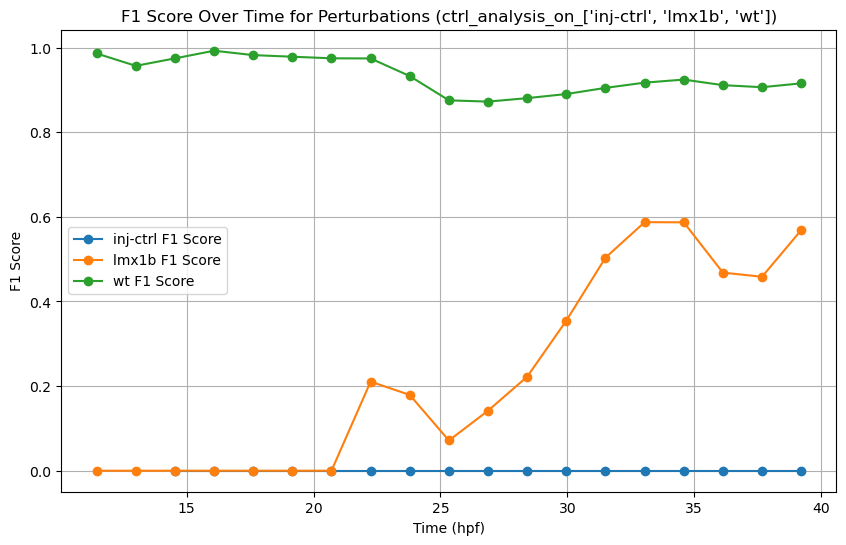

In [44]:
df_train, df_test, df = split_train_test(df)


comparisons = ["inj-ctrl","lmx1b", "wt"]

# Logistic Regression for 'all' data
y_test, y_pred_proba, log_reg, train_df, test_df = logistic_regression_multiclass(
    df_train, df_test, z_mu_biological_columns, comparisons, tol=0.001
)


# Create column names like 'pred_prob_wnt-i', 'pred_prob_tgfb-i', etc.
pred_prob_columns = [f'pred_prob_{pert}' for pert in comparisons]
# Ensure y_pred_proba has the correct shape
pred_df = pd.DataFrame(y_pred_proba, columns=pred_prob_columns)

#Add predicated probs to the dataframe
test_df = pd.concat([test_df.reset_index(drop=True), pred_df.reset_index(drop=True)], axis=1)

X = test_df[z_mu_biological_columns].values
pca = PCA(n_components=3)
pcs = pca.fit_transform(X)

# test_df['color'] = test_df['phenotype'].map(color_discrete_map)

test_df["PCA_1"] = pcs[:, 0]
test_df["PCA_2"] = pcs[:, 1]
test_df["PCA_3"] = pcs[:, 2]




results_dict_all = f1_score_over_time_multiclass(y_test, y_pred_proba, test_df, comparisons, num_bins=20, max_hpf=40)
dataset_label_all = f'ctrl_analysis_on_{comparisons}'
plot_f1_score_over_time(results_dict_all, comparisons, dataset_label=dataset_label_all,
                        title="F1 Score Over Time for Perturbations", save_dir="/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107")

In [55]:
pert_splines

,PCA_1,PCA_2,PCA_3,phenotype
0,1.892469,-0.230428,-1.663534,lmx1b
1,1.882997,-0.207147,-1.652277,lmx1b
2,1.870474,-0.183706,-1.644493,lmx1b
3,1.859136,-0.160708,-1.634081,lmx1b
4,1.849078,-0.138270,-1.621359,lmx1b
...,...,...,...,...
995,1.854498,-2.058302,1.305479,wt
996,1.874296,-2.059714,1.320414,wt
997,1.893867,-2.060976,1.335656,wt
998,1.913018,-2.061984,1.351440,wt


In [62]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet

# ============================
# Utility Functions
# ============================
def compute_spline_distances(spline_pts):
    """Compute cumulative distances along the spline."""
    diffs = np.diff(spline_pts, axis=0)
    seg_lengths = np.linalg.norm(diffs, axis=1)
    cumdist = np.insert(np.cumsum(seg_lengths), 0, 0.0)
    return cumdist, cumdist[-1]

def split_spline(spline_pts, k):
    """
    Split the spline into k segments based on cumulative distance.
    Returns a list of (start_pt, end_pt) tuples.
    """
    cumdist, total_dist = compute_spline_distances(spline_pts)
    segment_distances = np.linspace(0, total_dist, k+1)
    segment_indices = np.searchsorted(cumdist, segment_distances)
    segment_list = []
    for i in range(k):
        i0 = min(segment_indices[i], len(spline_pts) - 1)
        i1 = min(segment_indices[i+1], len(spline_pts) - 1)
        start_pt = spline_pts[i0]
        end_pt = spline_pts[i1]
        segment_list.append((start_pt, end_pt))
    return segment_list

def point_to_segment_distance(point, seg_start, seg_end):
    """
    Minimum distance from a 3D point to a line segment defined by seg_start, seg_end.
    """
    seg_vec = seg_end - seg_start
    pt_vec = point - seg_start
    seg_len_sq = np.dot(seg_vec, seg_vec)
    if seg_len_sq == 0.0:
        return np.linalg.norm(point - seg_start)
    t = np.dot(pt_vec, seg_vec) / seg_len_sq
    t = np.clip(t, 0.0, 1.0)
    projection = seg_start + t * seg_vec
    return np.linalg.norm(point - projection)

def assign_points_to_segments(pert_df, segments):
    """
    Assign each point to the closest segment, create a 'segment_id' column in pert_df.
    """
    points = pert_df[["PCA_1", "PCA_2", "PCA_3"]].values
    assigned_segments = []
    
    for p in points:
        min_dist = float('inf')
        seg_idx = -1
        for i, (s0, s1) in enumerate(segments):
            dist = point_to_segment_distance(p, s0, s1)
            if dist < min_dist:
                min_dist = dist
                seg_idx = i
        assigned_segments.append(seg_idx)
    
    pert_df["segment_id"] = assigned_segments
    return pert_df

def perform_robust_pca(seg_points):
    """
    Perform robust PCA using Minimum Covariance Determinant (MCD).
    Returns the principal axis (first eigenvector) or None if not enough points.
    """
    if len(seg_points) < 2:
        return None
    try:
        mcd = MinCovDet().fit(seg_points)
        cov = mcd.covariance_
        eig_vals, eig_vecs = np.linalg.eigh(cov)
        principal_axis = eig_vecs[:, np.argmax(eig_vals)]
        principal_axis /= np.linalg.norm(principal_axis)
        return principal_axis
    except:
        # Fallback to standard PCA if MCD fails
        pca = PCA(n_components=3)
        pca.fit(seg_points)
        principal_axis = pca.components_[0]
        principal_axis /= np.linalg.norm(principal_axis)
        return principal_axis

def create_spline_segments_for_df(df, pert_splines, k=50):
    """
    For each phenotype in df, finds its spline in pert_splines, splits it into k segments,
    assigns each point to a segment, performs robust PCA for each segment, and returns:
    
    1) df_augmented: original df augmented with 'segment_id'
    2) segment_info_df: columns = [
        phenotype, seg_id, segment_avg_time, segment_var_time,
        principal_axis_x, principal_axis_y, principal_axis_z,
        segment_midpoint_x, segment_midpoint_y, segment_midpoint_z,
        segment_start_x, segment_start_y, segment_start_z,
        segment_end_x, segment_end_y, segment_end_z
    ]
    3) (optionally) return pert_splines, which is often unchanged
    """
    # 1. Copy df so we don't mutate the original
    df_augmented = df.copy()
    
    # 2. We'll store per-segment info in this list of dicts
    segment_info_records = []
    
    # 3. Loop over each phenotype
    unique_phenotypes = df_augmented["phenotype"].unique()
    for pert in tqdm(unique_phenotypes, desc="Processing phenotypes"):
        # A) Extract all points for this phenotype
        pert_df = df_augmented[df_augmented["phenotype"] == pert].copy()
        if pert_df.empty:
            continue
        
        # B) Retrieve the spline points for this phenotype
        spline_data = pert_splines[pert_splines["phenotype"] == pert]
        if spline_data.empty:
            continue
        
        # Convert to NumPy
        spline_points = spline_data[["PCA_1", "PCA_2", "PCA_3"]].values
        
        # C) Split the spline
        segment_list = split_spline(spline_points, k)
        
        # D) Assign points to segments
        pert_df = assign_points_to_segments(pert_df, segment_list)
        
        # E) Update df_augmented with new segment IDs
        df_augmented.loc[pert_df.index, "segment_id"] = pert_df["segment_id"]
        
        # F) For each segment, perform robust PCA
        seg_data_dict = {}
        for seg_id in range(k):
            seg_points_df = pert_df[pert_df["segment_id"] == seg_id]
            seg_points = seg_points_df[["PCA_1", "PCA_2", "PCA_3"]].values
            
            if len(seg_points) < 2:
                principal_axis = None
            else:
                principal_axis = perform_robust_pca(seg_points)
            
            seg_start, seg_end = segment_list[seg_id]
            midpoint = 0.5 * (seg_start + seg_end)
            
            seg_data_dict[seg_id] = {
                "principal_axis": principal_axis,
                "segment_midpoint": midpoint,
                "segment_start": seg_start,
                "segment_end": seg_end,
                "segment_avg_time": seg_points_df["predicted_stage_hpf"].mean(),
                "segment_var_time": seg_points_df["predicted_stage_hpf"].var()
            }
        
        # G) Build segment_info_records
        for seg_id, info in seg_data_dict.items():
            principal_axis = info["principal_axis"]
            midpoint = info["segment_midpoint"]
            seg_start = info["segment_start"]
            seg_end = info["segment_end"]
            segment_avg_time = info["segment_avg_time"]
            segment_var_time = info["segment_var_time"]
            
            if principal_axis is None:
                px, py, pz = np.nan, np.nan, np.nan
            else:
                px, py, pz = principal_axis
            
            mx, my, mz = midpoint
            sx, sy, sz = seg_start
            ex, ey, ez = seg_end
            
            record = {
                "phenotype": pert,
                "seg_id": seg_id,
                "segment_avg_time": segment_avg_time,
                "segment_var_time": segment_var_time,
                "principal_axis_x": px,
                "principal_axis_y": py,
                "principal_axis_z": pz,
                "segment_midpoint_x": mx,
                "segment_midpoint_y": my,
                "segment_midpoint_z": mz,
                "segment_start_x": sx,
                "segment_start_y": sy,
                "segment_start_z": sz,
                "segment_end_x": ex,
                "segment_end_y": ey,
                "segment_end_z": ez
            }
            segment_info_records.append(record)
    
    # 4. Convert records to DataFrame
    segment_info_df = pd.DataFrame(segment_info_records)
    return df_augmented, segment_info_df, pert_splines

# ============================
# Main Wrapper Function
# ============================
def build_splines_and_segments(
    df,
    comparisons,
    save_dir,
    model_index,
    LocalPrincipalCurveClass,
    bandwidth=0.5,
    max_iter=250,
    tol=1e-3,
    angle_penalty_exp=2,
    early_stage_offset=1.0,
    late_stage_offset=3.0,
    k=50
):
    """
    1) Builds splines for each phenotype in `comparisons` using LocalPrincipalCurve
    2) Creates `df_augmented` by assigning segment IDs for each phenotype
    3) Returns `pert_splines`, `df_augmented`, and `segment_info_df`
    
    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing at least ["phenotype", "PCA_1", "PCA_2", "PCA_3", "predicted_stage_hpf"].
    comparisons : list
        List of phenotypes to process.
    save_dir : str
        Directory to save the spline CSV if desired.
    model_index : int
        Model index used in naming output files.
    LocalPrincipalCurveClass : class
        Reference to your LocalPrincipalCurve class (or a similar spline-fitting class).
    bandwidth : float
        Bandwidth parameter for LocalPrincipalCurve.
    max_iter : int
        Max iterations for LocalPrincipalCurve fitting.
    tol : float
        Tolerance for LocalPrincipalCurve convergence.
    angle_penalty_exp : int
        Angle penalty exponent for LocalPrincipalCurve.
    early_stage_offset : float
        Window (in hours) for selecting "early" timepoints to compute the average start point.
    late_stage_offset : float
        Window (in hours) for selecting "late" timepoints to compute the average end point.
    k : int
        Number of segments to split each spline into.

    Returns
    -------
    pert_splines : pd.DataFrame
        DataFrame containing the spline points for each phenotype.
    df_augmented : pd.DataFrame
        Original DataFrame plus a `segment_id` column.
    segment_info_df : pd.DataFrame
        Per-segment PCA info (principal_axis, midpoint, etc.).
    """
    
    # ----------------------------
    # 1. Generate a color palette
    # ----------------------------
    color_palette = px.colors.qualitative.Plotly
    if len(comparisons) > len(color_palette):
        extended_palette = color_palette * (len(comparisons) // len(color_palette) + 1)
    else:
        extended_palette = color_palette

    # ----------------------------
    # 2. Build Spline Data
    # ----------------------------
    print("Building spline data for each phenotype...")
    splines_records = []

    df = df[df["phenotype"].isin(comparisons)]
    
    for idx, pert in enumerate(tqdm(comparisons, desc="Creating splines for each phenotype")):
        # Filter the DataFrame for the given phenotype
        pert_df = df[df["phenotype"] == pert].copy()
        if pert_df.empty:
            # If no data points for this phenotype, skip
            continue

        # Extract PCA coordinates
        pert_3d = pert_df[["PCA_1", "PCA_2", "PCA_3"]].values
        
        # Compute average early stage point
        min_time = pert_df["predicted_stage_hpf"].min()
        early_mask = (pert_df["predicted_stage_hpf"] >= min_time) & \
                     (pert_df["predicted_stage_hpf"] < min_time + early_stage_offset)
        avg_early_timepoint = pert_df.loc[early_mask, ["PCA_1", "PCA_2", "PCA_3"]].mean().values
        
        # Compute average late stage point
        max_time = pert_df["predicted_stage_hpf"].max()
        late_mask = (pert_df["predicted_stage_hpf"] >= (max_time - late_stage_offset))
        avg_late_timepoint = pert_df.loc[late_mask, ["PCA_1", "PCA_2", "PCA_3"]].mean().values

        # Downsample for curve fitting (example: 5% for wt, 10% for others)
        if len(pert_3d) == 0:
            continue
        
        if pert == "wt":
            subset_size = max(1, int(0.05 * len(pert_3d)))
        else:
            subset_size = max(1, int(0.10 * len(pert_3d)))

        # Randomly select a subset of points for fitting
        rng = np.random.RandomState(42)
        subset_indices = rng.choice(len(pert_3d), size=subset_size, replace=False)
        pert_3d_subset = pert_3d[subset_indices, :]

        # Fit LocalPrincipalCurve
        lpc = LocalPrincipalCurveClass(
            bandwidth=bandwidth,
            max_iter=max_iter,
            tol=tol,
            angle_penalty_exp=angle_penalty_exp
        )
        
        # Fit with the optional start_points/end_point to anchor the spline
        lpc.fit(
            pert_3d_subset,
            start_points=avg_early_timepoint,
            end_point=avg_late_timepoint,
            remove_similar_end_start_points=True
        )
        
        spline_points = None
        if len(lpc.cubic_splines) > 0:
            # If your local principal curve class stores the final spline
            spline_points = lpc.cubic_splines[0]
        else:
            # If no spline was built, skip
            continue
        
        # Create a temporary DataFrame for the current spline
        spline_df = pd.DataFrame(spline_points, columns=["PCA_1", "PCA_2", "PCA_3"])
        spline_df["phenotype"] = pert
        
        # Collect for later concatenation
        splines_records.append(spline_df)

    # Concatenate all spline DataFrames
    if splines_records:
        pert_splines = pd.concat(splines_records, ignore_index=True)
    else:
        # Fallback to an empty DataFrame if no splines
        pert_splines = pd.DataFrame(columns=["PCA_1", "PCA_2", "PCA_3", "phenotype"])

    # Optionally, save the spline data
    spline_csv_path = os.path.join(save_dir, f"pert_splines_{model_index}_unique.csv")
    pert_splines.to_csv(spline_csv_path, index=False)
    print(f"Spline DataFrame 'pert_splines' saved to: {spline_csv_path}")

    # ----------------------------
    # 3. Create segments for each phenotype using the function above
    # ----------------------------
    print("Assigning segments and building segment_info_df...")
    df_augmented, segment_info_df, pert_splines_out = create_spline_segments_for_df(
        df=df,
        pert_splines=pert_splines,
        k=k
    )

    # Return all three final structures
    return pert_splines_out, df_augmented, segment_info_df

In [63]:


comparisons = comparisons  # list of phenotypes
save_dir = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107"
model_index = 74

pert_splines, df_augmented, segment_info_df = build_splines_and_segments(
    df=df,
    comparisons=comparisons,
    save_dir=save_dir,
    model_index=model_index,
    LocalPrincipalCurveClass=LocalPrincipalCurve,
    bandwidth=0.5,
    max_iter=250,
    tol=1e-3,
    angle_penalty_exp=2,
    early_stage_offset=1.0,
    late_stage_offset=3.0,
    k=50
)

Building spline data for each phenotype...


Creating splines for each phenotype:   0%|                | 0/3 [00:00<?, ?it/s]

Starting point not in dataset. Using closest point: [ 2.06815377 -0.2241942  -0.987599  ]


Creating splines for each phenotype:  33%|██▋     | 1/3 [00:01<00:03,  1.57s/it]

Starting point not in dataset. Using closest point: [ 2.21288023  0.01388959 -0.42695413]


Creating splines for each phenotype:  67%|█████▎  | 2/3 [00:08<00:04,  4.48s/it]

Starting point not in dataset. Using closest point: [ 1.96934187 -0.51020821 -0.64094762]


Creating splines for each phenotype: 100%|████████| 3/3 [00:28<00:00,  9.39s/it]


Spline DataFrame 'pert_splines' saved to: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/pert_splines_74_unique.csv
Assigning segments and building segment_info_df...


Processing phenotypes: 100%|██████████████████████| 3/3 [02:51<00:00, 57.32s/it]


In [60]:
segment_info_df

,phenotype,seg_id,segment_avg_time,segment_var_time,principal_axis_x,principal_axis_y,principal_axis_z,segment_midpoint_x,segment_midpoint_y,segment_midpoint_z,segment_start_x,segment_start_y,segment_start_z,segment_end_x,segment_end_y,segment_end_z
0,wt,0,10.640748,1.051989,-0.917001,-0.107609,0.384096,1.840785,1.193578,2.568231,1.919019,1.164153,2.682772,1.762550,1.223003,2.453690
1,wt,1,11.751668,1.674849,-0.872548,-0.105866,0.476920,1.729474,1.260598,2.320432,1.762550,1.223003,2.453690,1.696399,1.298192,2.187174
2,wt,2,12.931711,1.354109,-0.994227,-0.086083,-0.064047,1.678915,1.337183,2.050956,1.696399,1.298192,2.187174,1.661432,1.376173,1.914738
3,wt,3,13.883828,2.402354,-0.966500,-0.016127,0.256160,1.648223,1.411276,1.791838,1.661432,1.376173,1.914738,1.635014,1.446379,1.668938
4,wt,4,14.423616,1.703725,-0.984469,-0.095747,0.147153,1.618008,1.484762,1.532485,1.635014,1.446379,1.668938,1.601003,1.523145,1.396033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,lmx1b,45,NaN,NaN,NaN,NaN,NaN,1.971455,1.833307,-0.037545,1.992661,1.834062,-0.033799,1.950249,1.832553,-0.041291
146,lmx1b,46,NaN,NaN,NaN,NaN,NaN,1.928973,1.831564,-0.044556,1.950249,1.832553,-0.041291,1.907696,1.830575,-0.047820
147,lmx1b,47,18.092919,NaN,NaN,NaN,NaN,1.886441,1.829268,-0.051108,1.907696,1.830575,-0.047820,1.865186,1.827961,-0.054395
148,lmx1b,48,NaN,NaN,NaN,NaN,NaN,1.844250,1.826425,-0.059134,1.865186,1.827961,-0.054395,1.823314,1.824889,-0.063874


In [77]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_development_delay(
    spline_df,
    projection_dfs,
    df_augmented,                # <-- New DataFrame for extra metadata
    color_col="some_metadata",   # <-- Column in df_augmented to color by
    save_dir=".",
    file_prefix="dev_delay",
    min_images=5,
    max_embryos_per_phenotype=25,
    smoothing_window=1,
    random_seed=None
):
    """
    Plots developmental delay for multiple embryos over time with optional smoothing.
    
    The plot shows predicted_stage_hpf (x-axis) vs time_delay (y-axis), where
    time_delay = predicted_stage_hpf - segment_avg_time (from spline).

    Embryos are grouped and downsampled by 'phenotype', but colored by a column
    from `df_augmented` (using snip_id to join). This allows you to color by any
    metadata you have in `df_augmented[color_col]`.

    Parameters
    ----------
    spline_df : pd.DataFrame
        The reference spline DataFrame. Must contain at least:
            - seg_id
            - segment_avg_time

    projection_dfs : list of pd.DataFrame
        A list of projection DataFrames. Each DataFrame must contain columns:
            - ref_seg_id (to match seg_id)
            - embryo_id
            - phenotype
            - predicted_stage_hpf
            - snip_id
            - ...
    
    df_augmented : pd.DataFrame
        A DataFrame that contains additional metadata you wish to use for coloring
        or other purposes. Must include:
            - snip_id
            - color_col (the column you want to color by)
        so we can merge on snip_id.

    color_col : str, optional
        Column name (in df_augmented) to color by. If numeric, uses a continuous
        colormap; if categorical, uses a discrete color palette.

    save_dir : str, optional
        Directory to save the resulting HTML file.

    file_prefix : str, optional
        Filename prefix for the saved plot HTML.

    min_images : int, optional
        Minimum number of data points required for an embryo to be included.

    max_embryos_per_phenotype : int, optional
        Maximum number of embryo_ids to randomly select per phenotype.

    smoothing_window : int, optional
        Number of time points to average over for smoothing the time_delay.
        Default is 1 (no smoothing).

    random_seed : int, optional
        For reproducible random selection if you choose to sample. By default None.
    
    Returns
    -------
    fig : go.Figure or None
        The Plotly figure object with the 2D lines+markers plot, or None if no data remains
        after filtering.
    """
    # -------------------------
    # 0. Optional: Seed for Reproducibility
    # -------------------------
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # -------------------------
    # 1. Prepare Save Directory
    # -------------------------
    os.makedirs(save_dir, exist_ok=True)
    
    # -------------------------
    # 2. Concatenate All Projection DataFrames
    # -------------------------
    if not isinstance(projection_dfs, list):
        raise TypeError("projection_dfs must be a list of pandas DataFrames.")
    
    df_proj = pd.concat(projection_dfs, ignore_index=True)
    
    # Ensure required columns are present in df_proj
    required_cols = ["ref_seg_id", "embryo_id", "phenotype", "predicted_stage_hpf", "snip_id"]
    missing_cols = [col for col in required_cols if col not in df_proj.columns]
    if missing_cols:
        raise ValueError(
            f"The following required columns are missing in projection DataFrames: {missing_cols}"
        )
    
    # -------------------------
    # 3. Merge with Spline Data to Get 'segment_avg_time'
    # -------------------------
    if "seg_id" not in spline_df.columns or "segment_avg_time" not in spline_df.columns:
        raise ValueError("spline_df must have 'seg_id' and 'segment_avg_time' columns.")
    
    df_merged = df_proj.merge(
        spline_df[['seg_id', 'segment_avg_time']],
        left_on='ref_seg_id',
        right_on='seg_id',
        how='left'
    )
    
    # Drop rows with missing 'segment_avg_time'
    df_merged.dropna(subset=['segment_avg_time'], inplace=True)
    
    # -------------------------
    # 4. Merge with df_augmented to get color_col
    # -------------------------
    if "snip_id" not in df_augmented.columns:
        raise ValueError("df_augmented must have a 'snip_id' column to merge on.")
    if color_col not in df_augmented.columns:
        raise ValueError(f"'{color_col}' not found in df_augmented columns.")
    
    # Merge on snip_id
    df_merged = df_merged.merge(
        df_augmented[['snip_id', color_col]],
        on='snip_id',
        how='left'  # keep rows from df_merged, fill color_col with NaN if missing
    )
    
    # -------------------------
    # 5. Compute 'time_delay'
    # -------------------------
    df_merged['time_delay'] = df_merged['predicted_stage_hpf'] - df_merged['segment_avg_time']
    
    # -------------------------
    # 6. Filter Embryos by Minimum Data Points
    # -------------------------
    embryo_counts = df_merged.groupby('embryo_id').size()
    valid_embryos = embryo_counts[embryo_counts >= min_images].index
    df_filtered = df_merged[df_merged['embryo_id'].isin(valid_embryos)]
    
    if df_filtered.empty:
        print(f"No embryos have at least {min_images} data points. Exiting.")
        return None
    
    # -------------------------
    # 7. Downsample Embryos per Phenotype
    #     (Still grouping by 'phenotype')
    # -------------------------
    chosen_embryos = []
    for phen in df_filtered['phenotype'].unique():
        phen_df = df_filtered[df_filtered['phenotype'] == phen]
        embryo_ids = phen_df['embryo_id'].unique()
        
        if len(embryo_ids) > max_embryos_per_phenotype:
            chosen = np.random.choice(embryo_ids, max_embryos_per_phenotype, replace=False)
        else:
            chosen = embryo_ids
        
        chosen_embryos.extend([(phen, e) for e in chosen])
    
    if not chosen_embryos:
        print("No embryos selected after downsampling.")
        return None
    
    # -------------------------
    # 8. Prepare Coloring Logic Based on 'color_col'
    #     (Now in df_filtered after merge)
    # -------------------------
    if pd.api.types.is_numeric_dtype(df_filtered[color_col]):
        # Numeric column => continuous scale
        vmin = df_filtered[color_col].min()
        vmax = df_filtered[color_col].max()
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
        cmap = cm.get_cmap('viridis')  # or any other matplotlib colormap
        
        def get_color_numeric(val):
            return mcolors.to_hex(cmap(norm(val)))
        
        color_mode = 'numeric'
    else:
        # Categorical column => discrete palette
        unique_categories = df_filtered[color_col].dropna().unique()
        num_categories = len(unique_categories)
        
        color_palette = px.colors.qualitative.Plotly
        if num_categories > len(color_palette):
            color_palette = (color_palette * ((num_categories // len(color_palette)) + 1))[:num_categories]
        
        cat_color_map = {cat: color_palette[i] for i, cat in enumerate(unique_categories)}
        
        def get_color_categorical(val):
            return cat_color_map.get(val, 'gray')
        
        color_mode = 'categorical'
    
    # -------------------------
    # 9. Initialize Plotly Figure
    # -------------------------
    fig = go.Figure()
    
    # -------------------------
    # 10. Add Traces for Each Embryo with Optional Smoothing
    # -------------------------
    for (phen, embryo) in chosen_embryos:
        embryo_df = df_filtered[
            (df_filtered['phenotype'] == phen) &
            (df_filtered['embryo_id'] == embryo)
        ].sort_values('predicted_stage_hpf')
        
        if embryo_df.empty:
            continue
        
        # Smooth time_delay if needed
        if smoothing_window > 1:
            embryo_df['time_delay_smooth'] = (
                embryo_df['time_delay']
                .rolling(window=smoothing_window, min_periods=1, center=True)
                .mean()
            )
        else:
            embryo_df['time_delay_smooth'] = embryo_df['time_delay']
        
        # Determine color from the first unique color_col value in this embryo's subset
        col_values = embryo_df[color_col].dropna().unique()
        if len(col_values) == 0:
            # If no valid color_col value, default to gray
            trace_color = 'gray'
            color_val_label = 'NaN'
        else:
            main_val = col_values[0]
            color_val_label = str(main_val)
            if color_mode == 'numeric':
                trace_color = get_color_numeric(main_val)
            else:
                trace_color = get_color_categorical(main_val)
        
        fig.add_trace(
            go.Scatter(
                x=embryo_df['predicted_stage_hpf'],
                y=embryo_df['time_delay_smooth'],
                mode='lines+markers',
                name=f"{phen} - {embryo}",
                line=dict(color=trace_color, width=2),
                marker=dict(size=6, color=trace_color),
                hovertemplate=(
                    f"{color_col}: {color_val_label}<br>"
                    "Time Delay (Original): %{customdata[0]:.2f}<br>"
                    "Time Delay (Smoothed): %{y:.2f}<br>"
                    "Embryo ID: %{customdata[1]}<br>"
                    "Snip ID: %{customdata[2]}<br>"
                    "Predicted Stage (hpf): %{x:.2f}<br>"
                    "Segment Avg Time: %{customdata[3]:.2f}<br>"
                    "Phenotype: %{customdata[4]}<extra></extra>"
                ),
                customdata=np.stack([
                    embryo_df['time_delay'],
                    embryo_df['embryo_id'],
                    embryo_df['snip_id'],
                    embryo_df['segment_avg_time'],
                    embryo_df['phenotype']
                ], axis=1),
                showlegend=True
            )
        )
    
    # -------------------------
    # 11. Update Layout
    # -------------------------
    fig.update_layout(
        title="Developmental Delay Over Time",
        xaxis_title="Predicted Stage (hpf)",
        yaxis_title="Time Delay (predicted_stage_hpf - segment_avg_time)",
        legend=dict(
            title="Phenotype - Embryo",
            itemsizing='constant',
            x=0.8,
            y=1.0
        ),
        width=1000,
        height=700,
        margin=dict(l=0, r=200, b=0, t=50)
    )
    
    # -------------------------
    # 12. Save Plot as HTML
    # -------------------------
    outfile = os.path.join(save_dir, f"{file_prefix}_dev_delay.html")
    fig.write_html(outfile)
    print(f"Developmental delay plot saved to: {outfile}")
    
    return fig

In [ ]:
# Suppose we have:
# df_augmented       -> your main augmented DataFrame with "wt" and "lmx1b" (and others)
# segment_info_df    -> from create_spline_segments_for_df
# We pick "wt" splines for reference:
wt_splines_n_planes = segment_info_df[segment_info_df["phenotype"] == "wt"]

# A) Points from "wt" itself
wt_pert_df = df_augmented[df_augmented["phenotype"] == "wt"]
wt_projection_to_wt = project_points_onto_reference_spline(
    wt_pert_df,
    wt_splines_n_planes
)

# B) Points from "lmx1b"
lmx1b_pert_df = df_augmented[df_augmented["phenotype"] == "lmx1b"]
lmx1b_projection_to_wt = project_points_onto_reference_spline(
    lmx1b_pert_df,
    wt_splines_n_planes
)


inj_ctrl_df = df[df["phenotype"]=="inj-ctrl"]
inj_ctrl_projection_to_wt = project_points_onto_reference_spline(
    inj_ctrl_df,
    wt_splines_n_planes
)



In [71]:
df_augmented



,Unnamed: 0.1,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,...,UMAP_02_n_3,color,PCA_1,PCA_2,PCA_3,embryo_id,segment_id,plane_normal_x,plane_normal_y,plane_normal_z
0,0,0,20230525_A03_e00_t0001,20230525,EM,wt_wik,0,wt,15.105656,4.745473e+05,...,15.581752,#00CC96,1.901070,-0.127321,-1.101198,20230525_A03_e00,3.0,-0.336198,-0.651762,-0.679837
1,1,1,20230525_A03_e00_t0002,20230525,EM,wt_wik,0,wt,15.638449,4.832259e+05,...,15.861163,#00CC96,1.680511,0.055609,-1.526103,20230525_A03_e00,6.0,0.056817,0.710451,0.701449
2,2,2,20230525_A03_e00_t0003,20230525,EM,wt_wik,0,wt,16.171827,4.952603e+05,...,16.023083,#00CC96,1.760055,0.062241,-1.725102,20230525_A03_e00,6.0,0.056817,0.710451,0.701449
3,3,3,20230525_A03_e00_t0004,20230525,EM,wt_wik,0,wt,16.706109,4.941031e+05,...,16.236965,#00CC96,1.667349,0.168485,-1.763052,20230525_A03_e00,6.0,0.056817,0.710451,0.701449
4,4,4,20230525_A03_e00_t0005,20230525,EM,wt_wik,0,wt,17.238502,5.068318e+05,...,16.307163,#00CC96,1.493429,0.169785,-1.978279,20230525_A03_e00,7.0,0.072194,0.694244,0.716110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89859,89859,89859,20241023_H06_e00_t0038,20241023,EM,wt_ab,0,wt,50.238336,1.366267e+06,...,9.463744,#00CC96,0.432813,-1.733730,0.559822,20241023_H06_e00,42.0,-0.563980,0.238935,0.790466
89860,89860,89860,20241023_H06_e00_t0039,20241023,EM,wt_ab,0,wt,50.738937,1.394748e+06,...,9.445736,#00CC96,0.523018,-1.696523,0.686458,20241023_H06_e00,43.0,-0.596260,0.177336,0.782960
89861,89861,89861,20241023_H06_e00_t0040,20241023,EM,wt_ab,0,wt,51.239684,1.375575e+06,...,9.447878,#00CC96,0.526990,-1.702248,0.664226,20241023_H06_e00,43.0,-0.596260,0.177336,0.782960
89862,89862,89862,20241023_H06_e00_t0041,20241023,EM,wt_ab,0,wt,51.741783,1.401278e+06,...,9.433472,#00CC96,0.603234,-1.692902,0.720899,20241023_H06_e00,43.0,-0.596260,0.177336,0.782960


In [73]:
import pandas as pd

# Ensure 'snip_id' is present in both DataFrames
# Merge df_augmented with the 'temperature' column from embryo_df
df_augmented_test = df_augmented.merge(
    embryo_df[['snip_id', 'temperature']],
    on='snip_id',
    how='left'  # Use 'left' to keep all rows from df_augmented
).dropna()
df_augmented_test

,Unnamed: 0.1,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,...,color,PCA_1,PCA_2,PCA_3,embryo_id,segment_id,plane_normal_x,plane_normal_y,plane_normal_z,temperature
0,0,0,20230525_A03_e00_t0001,20230525,EM,wt_wik,0,wt,15.105656,4.745473e+05,...,#00CC96,1.901070,-0.127321,-1.101198,20230525_A03_e00,3.0,-0.336198,-0.651762,-0.679837,22.0
1,1,1,20230525_A03_e00_t0002,20230525,EM,wt_wik,0,wt,15.638449,4.832259e+05,...,#00CC96,1.680511,0.055609,-1.526103,20230525_A03_e00,6.0,0.056817,0.710451,0.701449,22.0
2,2,2,20230525_A03_e00_t0003,20230525,EM,wt_wik,0,wt,16.171827,4.952603e+05,...,#00CC96,1.760055,0.062241,-1.725102,20230525_A03_e00,6.0,0.056817,0.710451,0.701449,22.0
3,3,3,20230525_A03_e00_t0004,20230525,EM,wt_wik,0,wt,16.706109,4.941031e+05,...,#00CC96,1.667349,0.168485,-1.763052,20230525_A03_e00,6.0,0.056817,0.710451,0.701449,22.0
4,4,4,20230525_A03_e00_t0005,20230525,EM,wt_wik,0,wt,17.238502,5.068318e+05,...,#00CC96,1.493429,0.169785,-1.978279,20230525_A03_e00,7.0,0.072194,0.694244,0.716110,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31690,51711,51711,20240418_H06_e00_t0033,20240418,EM,wt_noto,0,wt,42.852133,1.204580e+06,...,#00CC96,0.550899,-1.886781,0.443832,20240418_H06_e00,42.0,-0.563980,0.238935,0.790466,30.0
31691,51712,51712,20240418_H06_e00_t0034,20240418,EM,wt_noto,0,wt,43.412247,1.107088e+06,...,#00CC96,0.458767,-1.789286,0.713949,20240418_H06_e00,43.0,-0.596260,0.177336,0.782960,30.0
31692,51713,51713,20240418_H06_e00_t0035,20240418,EM,wt_noto,0,wt,43.972128,1.195110e+06,...,#00CC96,0.793654,-1.948722,0.658992,20240418_H06_e00,44.0,-0.595404,0.243942,0.765498,30.0
31694,51715,51715,20240418_H06_e00_t0037,20240418,EM,wt_noto,0,wt,45.092780,1.188285e+06,...,#00CC96,0.567245,-1.800492,0.795018,20240418_H06_e00,43.0,-0.596260,0.177336,0.782960,30.0


In [ ]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

def plot_3d_spline_and_projections(
    projection_dfs,
    segment_info_df,
    pert_splines=None,
    save_dir=None,
    filename="splines_with_plane.html",
    k=None,
    title="3D Visualization of Spline and Projections",
    plane_opacity=0.2,
    axis_length=0.5,
    show_legend=True,
    plane_size=1.0,
    plane_grid_steps=10
):
    """
    Plots a 3D visualization of:
      1) The reference spline (if `pert_splines` is provided).
      2) Multiple sets of projected points (`projection_dfs`), each with columns:
         ["PCA_1", "PCA_2", "PCA_3", "ref_seg_id", "phenotype", ...]
         Points are colored by their 'ref_seg_id' to the reference spline.
      3) Principal axes for each segment (from `segment_info_df`).
      4) Plane surfaces (also from `segment_info_df`), each as a separate toggleable trace.

    Parameters
    ----------
    projection_dfs : list or pd.DataFrame
        One or more DataFrames of projected points.  
        Each DataFrame should have at least columns:
            ["PCA_1", "PCA_2", "PCA_3", "ref_seg_id", "phenotype", ...]
        where 'ref_seg_id' is the segment on the reference spline to which the point was assigned.
    segment_info_df : pd.DataFrame
        The reference segment info (e.g., from WT) with columns like:
            [
              "seg_id",
              "principal_axis_x", "principal_axis_y", "principal_axis_z",
              "segment_midpoint_x", "segment_midpoint_y", "segment_midpoint_z",
              "segment_start_x",   "segment_start_y",   "segment_start_z",
              "segment_end_x",     "segment_end_y",     "segment_end_z",
              "phenotype" (optional, if relevant)
            ]
        This defines the planes, principal axes, etc.
    pert_splines : pd.DataFrame or None
        Optional. If provided, plots the reference spline line.
        Columns expected: ["phenotype", "PCA_1", "PCA_2", "PCA_3"].
    save_dir : str or None
        If provided, the figure is saved as an HTML file in this directory.
    filename : str
        File name for the output HTML file.
    k : int or None
        Number of segments. If None, we infer it from `segment_info_df`.
    title : str
        Title for the figure.
    plane_opacity : float
        Opacity (0 to 1) for the plane surfaces.
    axis_length : float
        Half-length for drawing the principal axis line from each segment's midpoint.
    show_legend : bool
        Whether to show the Plotly legend.
    plane_size : float
        Half-width/height of the plane patch to draw around the midpoint.
    plane_grid_steps : int
        Resolution of the mesh for plane surfaces.

    Returns
    -------
    fig : plotly.graph_objs._figure.Figure
        The constructed 3D Plotly figure.
    """
    # ---------------------------------------------------------------------
    # 0. Handle the case if a single DataFrame is passed instead of a list
    # ---------------------------------------------------------------------
    if isinstance(projection_dfs, pd.DataFrame):
        projection_dfs = [projection_dfs]
    
    # ---------------------------------------------------------------------
    # 1. Initialize the figure and color palette
    # ---------------------------------------------------------------------
    fig = go.Figure()
    color_palette = px.colors.qualitative.Dark24  # Up to 24 distinct colors

    # If k not provided, try to deduce from 'segment_info_df'
    if k is None:
        if not segment_info_df.empty:
            k = int(segment_info_df["seg_id"].max()) + 1
        else:
            k = 1

    # ---------------------------------------------------------------------
    # 2. Plot the reference spline (if provided)
    # ---------------------------------------------------------------------
    if pert_splines is not None and not pert_splines.empty:
        # We assume there's only ONE reference phenotype for the spline,
        # or we can just loop if multiple. Here, let's loop for each phenotype:
        for pert in pert_splines["phenotype"].unique():
            spline_df = pert_splines[pert_splines["phenotype"] == pert]
            spline_pts = spline_df[["PCA_1", "PCA_2", "PCA_3"]].values
            if len(spline_pts) < 2:
                continue

            fig.add_trace(go.Scatter3d(
                x=spline_pts[:, 0],
                y=spline_pts[:, 1],
                z=spline_pts[:, 2],
                mode='lines+markers',
                name=f"Spline ({pert})",
                line=dict(color='black', width=4),
                marker=dict(size=3, color='black'),
                legendgroup=f"Spline_{pert}",
            ))

    # ---------------------------------------------------------------------
    # 3. Plot each projection DataFrame, coloring points by segment
    # ---------------------------------------------------------------------
    # We create separate traces for each (phenotype, seg_id) within each DataFrame,
    # so that each perturbation can be toggled individually.
    for df_idx, proj_df in enumerate(projection_dfs):
        # Group by (phenotype, ref_seg_id). 
        # If 'phenotype' isn't present, group by ref_seg_id only (fallback).
        group_cols = ["ref_seg_id"]
        if "phenotype" in proj_df.columns:
            group_cols = ["phenotype", "ref_seg_id"]
        
        grouped = proj_df.groupby(group_cols)

        for key_tuple, group_data in grouped:
            if len(group_cols) == 2:
                pert, seg_id = key_tuple
            else:
                # If we only grouped by ref_seg_id, we have no phenotype info
                seg_id = key_tuple
                pert   = f"ProjDF_{df_idx}"  # fallback label

            # Convert seg_id to int if possible
            try:
                seg_id = int(seg_id)
            except:
                pass

            color_idx = seg_id % len(color_palette) if isinstance(seg_id, int) else 0
            seg_color = color_palette[color_idx]

            fig.add_trace(go.Scatter3d(
                x=group_data["PCA_1"],
                y=group_data["PCA_2"],
                z=group_data["PCA_3"],
                mode='markers',
                name=f"{pert} - seg {seg_id}",
                marker=dict(size=3, color=seg_color, opacity=0.7),
                legendgroup=pert,  
            ))

    # ---------------------------------------------------------------------
    # 4. Plot principal axis lines for each segment in the reference
    # ---------------------------------------------------------------------
    # segment_info_df might contain multiple phenotypes if you merged them,
    # but presumably for a single reference, it's just one phenotype or none.
    # We'll group by seg_id to handle it generally.
    for seg_id, seg_row_df in segment_info_df.groupby("seg_id"):
        # There's typically just 1 row for each (phenotype, seg_id), but let's handle n rows
        for _, row in seg_row_df.iterrows():
            px_ = row.get("principal_axis_x", np.nan)
            py_ = row.get("principal_axis_y", np.nan)
            pz_ = row.get("principal_axis_z", np.nan)
            if pd.isnull(px_) or pd.isnull(py_) or pd.isnull(pz_):
                continue
            
            principal_axis = np.array([px_, py_, pz_], dtype=float)
            midpoint = np.array([
                row.get("segment_midpoint_x", 0),
                row.get("segment_midpoint_y", 0),
                row.get("segment_midpoint_z", 0)
            ], dtype=float)

            color_idx = int(seg_id) % len(color_palette)
            axis_color = color_palette[color_idx]

            start_line = midpoint - axis_length * principal_axis
            end_line   = midpoint + axis_length * principal_axis

            fig.add_trace(go.Scatter3d(
                x=[start_line[0], end_line[0]],
                y=[start_line[1], end_line[1]],
                z=[start_line[2], end_line[2]],
                mode='lines',
                line=dict(color=axis_color, width=5),
                name=f"Axis seg {seg_id}",
                legendgroup="ReferenceAxes"
            ))

    # ---------------------------------------------------------------------
    # 5. Plot planes for each segment in the reference
    # ---------------------------------------------------------------------
    # Each plane is added as a separate trace for toggling.
    for seg_id, seg_row_df in segment_info_df.groupby("seg_id"):
        for _, row in seg_row_df.iterrows():
            # Normal
            px_ = row.get("principal_axis_x", np.nan)
            py_ = row.get("principal_axis_y", np.nan)
            pz_ = row.get("principal_axis_z", np.nan)
            if pd.isnull(px_) or pd.isnull(py_) or pd.isnull(pz_):
                continue

            plane_normal = np.array([px_, py_, pz_], dtype=float)
            norm_mag = np.linalg.norm(plane_normal)
            if norm_mag < 1e-12:
                continue

            midpoint = np.array([
                row.get("segment_midpoint_x", 0),
                row.get("segment_midpoint_y", 0),
                row.get("segment_midpoint_z", 0)
            ], dtype=float)
            d = -np.dot(plane_normal, midpoint)

            color_idx = int(seg_id) % len(color_palette)
            plane_color = color_palette[color_idx]

            # Build a grid
            xx, yy = np.meshgrid(
                np.linspace(midpoint[0] - plane_size, midpoint[0] + plane_size, plane_grid_steps),
                np.linspace(midpoint[1] - plane_size, midpoint[1] + plane_size, plane_grid_steps)
            )

            if abs(plane_normal[2]) > 1e-12:
                zz = (-plane_normal[0]*xx - plane_normal[1]*yy - d) / plane_normal[2]
            else:
                # Plane is vertical in Z
                zz = np.full_like(xx, midpoint[2])

            fig.add_trace(go.Surface(
                x=xx,
                y=yy,
                z=zz,
                opacity=plane_opacity,
                colorscale=[[0, plane_color], [1, plane_color]],
                showscale=False,
                name=f"Plane seg {seg_id}",
                legendgroup="ReferencePlanes",
            ))

    # ---------------------------------------------------------------------
    # 6. Final layout updates
    # ---------------------------------------------------------------------
    fig.update_layout(
        scene=dict(
            xaxis_title="PCA_1",
            yaxis_title="PCA_2",
            zaxis_title="PCA_3",
            aspectmode='data'
        ),
        width=1200,
        height=800,
        title=title,
        showlegend=show_legend
    )

    # Optionally save to HTML
    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
        outpath = os.path.join(save_dir, filename)
        fig.write_html(outpath)
        print(f"3D visualization saved to: {outpath}")
    else:
        print("3D visualization not saved (no save_dir provided).")

    return fig

In [66]:
# -------------------------
projection_dfs = [
    wt_projection_to_wt,
    lmx1b_projection_to_wt,
    inj_ctrl_projection_to_wt,
]

fig = plot_3d_spline_and_projections(
    projection_dfs =projection_dfs,
    segment_info_df=wt_splines_n_planes,
    pert_splines=pert_splines,  # or None if you don't have/need them
    save_dir="/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107",
    filename="my_3d_visualization.html",
    k=None,
    title="My 3D Spline + Projection Visualization",
    plane_opacity=0.2,
    axis_length=0.5,
    show_legend=True
)

3D visualization saved to: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/my_3d_visualization.html


In [76]:
wt_projection_to_wt

,snip_id,embryo_id,phenotype,predicted_stage_hpf,PCA_1,PCA_2,PCA_3,ref_seg_id,closest_on_spline_x,closest_on_spline_y,closest_on_spline_z,plane_point_x,plane_point_y,plane_point_z,distance_to_plane,distance_to_axis,hypotenuse
0,20230525_A03_e00_t0001,20230525_A03_e00,wt,15.105656,1.901070,-0.127321,-1.101198,3,1.953785,-0.043151,-1.006570,1.906880,-0.041633,-1.007983,0.126748,0.104307,0.164149
1,20230525_A03_e00_t0002,20230525_A03_e00,wt,15.638449,1.680511,0.055609,-1.526103,6,1.821913,0.377326,-1.385814,1.673781,0.277129,-1.291201,0.322948,0.210035,0.385240
2,20230525_A03_e00_t0003,20230525_A03_e00,wt,16.171827,1.760055,0.062241,-1.725102,6,1.796845,0.395037,-1.401162,1.750370,0.381063,-1.387020,0.464801,0.049483,0.467428
3,20230525_A03_e00_t0004,20230525_A03_e00,wt,16.706109,1.667349,0.168485,-1.763052,6,1.694922,0.467046,-1.463564,1.658648,0.454928,-1.459305,0.417598,0.124528,0.435769
4,20230525_A03_e00_t0005,20230525_A03_e00,wt,17.238502,1.493429,0.169785,-1.978279,7,1.514457,0.572310,-1.554420,1.548402,0.576968,-1.559111,0.586960,0.060201,0.590040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9290,20241023_H04_e00_t0035,20241023_H04_e00,wt,48.651291,0.796327,-1.971544,0.462619,43,0.775786,-1.933339,0.490496,0.767657,-1.966650,0.492455,0.041666,0.045549,0.061732
9291,20241023_H04_e00_t0036,20241023_H04_e00,wt,49.153548,0.619116,-1.978784,0.450740,43,0.662969,-1.927635,0.399549,0.667910,-1.987114,0.399962,0.070913,0.120290,0.139636
9292,20241023_H04_e00_t0037,20241023_H04_e00,wt,49.655406,0.794349,-1.981253,0.450484,43,0.768966,-1.932994,0.484998,0.759852,-1.975364,0.486384,0.050135,0.047799,0.069270
9293,20241023_H04_e00_t0038,20241023_H04_e00,wt,50.155134,0.920570,-1.950069,0.624578,44,0.928709,-1.942470,0.615344,0.928331,-1.952574,0.616114,0.011753,0.023372,0.026161


In [79]:
df_augmented

,Unnamed: 0.1,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,...,UMAP_02_n_3,color,PCA_1,PCA_2,PCA_3,embryo_id,segment_id,plane_normal_x,plane_normal_y,plane_normal_z
0,0,0,20230525_A03_e00_t0001,20230525,EM,wt_wik,0,wt,15.105656,4.745473e+05,...,15.581752,#00CC96,1.901070,-0.127321,-1.101198,20230525_A03_e00,3.0,-0.336198,-0.651762,-0.679837
1,1,1,20230525_A03_e00_t0002,20230525,EM,wt_wik,0,wt,15.638449,4.832259e+05,...,15.861163,#00CC96,1.680511,0.055609,-1.526103,20230525_A03_e00,6.0,0.056817,0.710451,0.701449
2,2,2,20230525_A03_e00_t0003,20230525,EM,wt_wik,0,wt,16.171827,4.952603e+05,...,16.023083,#00CC96,1.760055,0.062241,-1.725102,20230525_A03_e00,6.0,0.056817,0.710451,0.701449
3,3,3,20230525_A03_e00_t0004,20230525,EM,wt_wik,0,wt,16.706109,4.941031e+05,...,16.236965,#00CC96,1.667349,0.168485,-1.763052,20230525_A03_e00,6.0,0.056817,0.710451,0.701449
4,4,4,20230525_A03_e00_t0005,20230525,EM,wt_wik,0,wt,17.238502,5.068318e+05,...,16.307163,#00CC96,1.493429,0.169785,-1.978279,20230525_A03_e00,7.0,0.072194,0.694244,0.716110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89859,89859,89859,20241023_H06_e00_t0038,20241023,EM,wt_ab,0,wt,50.238336,1.366267e+06,...,9.463744,#00CC96,0.432813,-1.733730,0.559822,20241023_H06_e00,42.0,-0.563980,0.238935,0.790466
89860,89860,89860,20241023_H06_e00_t0039,20241023,EM,wt_ab,0,wt,50.738937,1.394748e+06,...,9.445736,#00CC96,0.523018,-1.696523,0.686458,20241023_H06_e00,43.0,-0.596260,0.177336,0.782960
89861,89861,89861,20241023_H06_e00_t0040,20241023,EM,wt_ab,0,wt,51.239684,1.375575e+06,...,9.447878,#00CC96,0.526990,-1.702248,0.664226,20241023_H06_e00,43.0,-0.596260,0.177336,0.782960
89862,89862,89862,20241023_H06_e00_t0041,20241023,EM,wt_ab,0,wt,51.741783,1.401278e+06,...,9.433472,#00CC96,0.603234,-1.692902,0.720899,20241023_H06_e00,43.0,-0.596260,0.177336,0.782960


In [90]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_development_delay(
    spline_df,
    projection_dfs,
    df_augmented,                # <-- New DataFrame for extra metadata
    color_col="some_metadata",   # <-- Column in df_augmented to color by
    save_dir=".",
    file_prefix="dev_delay",
    min_images=5,
    max_embryos_per_phenotype=25,
    smoothing_window=1,
    random_seed=None
):
    """
    Plots developmental delay for multiple embryos over time with optional smoothing.
    
    The plot shows predicted_stage_hpf (x-axis) vs time_delay (y-axis), where
    time_delay = predicted_stage_hpf - segment_avg_time (from spline).

    Embryos are grouped and downsampled by 'phenotype', but colored by a column
    from `df_augmented` (using snip_id to join). This allows you to color by any
    metadata you have in `df_augmented[color_col]`.

    Parameters
    ----------
    spline_df : pd.DataFrame
        The reference spline DataFrame. Must contain at least:
            - seg_id
            - segment_avg_time

    projection_dfs : list of pd.DataFrame
        A list of projection DataFrames. Each DataFrame must contain columns:
            - ref_seg_id (to match seg_id)
            - embryo_id
            - phenotype
            - predicted_stage_hpf
            - snip_id
            - ...
    
    df_augmented : pd.DataFrame
        A DataFrame that contains additional metadata you wish to use for coloring
        or other purposes. Must include:
            - snip_id
            - color_col (the column you want to color by)
        so we can merge on snip_id.

    color_col : str, optional
        Column name (in df_augmented) to color by. If numeric, uses a continuous
        colormap; if categorical, uses a discrete color palette.

    save_dir : str, optional
        Directory to save the resulting HTML file.

    file_prefix : str, optional
        Filename prefix for the saved plot HTML.

    min_images : int, optional
        Minimum number of data points required for an embryo to be included.

    max_embryos_per_phenotype : int, optional
        Maximum number of embryo_ids to randomly select per phenotype.

    smoothing_window : int, optional
        Number of time points to average over for smoothing the time_delay.
        Default is 1 (no smoothing).

    random_seed : int, optional
        For reproducible random selection if you choose to sample. By default None.
    
    Returns
    -------
    fig : go.Figure or None
        The Plotly figure object with the 2D lines+markers plot, or None if no data remains
        after filtering.
    """
    # -------------------------
    # 0. Optional: Seed for Reproducibility
    # -------------------------
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # -------------------------
    # 1. Prepare Save Directory
    # -------------------------
    os.makedirs(save_dir, exist_ok=True)
    
    # -------------------------
    # 2. Concatenate All Projection DataFrames
    # -------------------------
    if not isinstance(projection_dfs, list):
        raise TypeError("projection_dfs must be a list of pandas DataFrames.")
    
    df_proj = pd.concat(projection_dfs, ignore_index=True)
    
    # Ensure required columns are present in df_proj
    required_cols = ["ref_seg_id", "embryo_id", "phenotype", "predicted_stage_hpf", "snip_id"]
    missing_cols = [col for col in required_cols if col not in df_proj.columns]
    if missing_cols:
        raise ValueError(
            f"The following required columns are missing in projection DataFrames: {missing_cols}"
        )
    
    # -------------------------
    # 3. Merge with Spline Data to Get 'segment_avg_time'
    # -------------------------
    if "seg_id" not in spline_df.columns or "segment_avg_time" not in spline_df.columns:
        raise ValueError("spline_df must have 'seg_id' and 'segment_avg_time' columns.")
    
    df_merged = df_proj.merge(
        spline_df[['seg_id', 'segment_avg_time']],
        left_on='ref_seg_id',
        right_on='seg_id',
        how='left'
    )
    
    # Drop rows with missing 'segment_avg_time'
    df_merged.dropna(subset=['segment_avg_time'], inplace=True)
    
    # -------------------------
    # 4. Merge with df_augmented to get color_col
    # -------------------------
    if "snip_id" not in df_augmented.columns:
        raise ValueError("df_augmented must have a 'snip_id' column to merge on.")
    if color_col not in df_augmented.columns:
        raise ValueError(f"'{color_col}' not found in df_augmented columns.")
    
    # Merge on snip_id
    df_merged = df_merged.merge(
        df_augmented[['snip_id', color_col]],
        on='snip_id',
        how='left'  # keep rows from df_merged, fill color_col with NaN if missing
    )
    
    # -------------------------
    # 5. Compute 'time_delay'
    # -------------------------
    df_merged['time_delay'] = df_merged['predicted_stage_hpf'] - df_merged['segment_avg_time']
    
    # -------------------------
    # 6. Filter Embryos by Minimum Data Points
    # -------------------------
    embryo_counts = df_merged.groupby('embryo_id').size()
    valid_embryos = embryo_counts[embryo_counts >= min_images].index
    df_filtered = df_merged[df_merged['embryo_id'].isin(valid_embryos)]
    
    if df_filtered.empty:
        print(f"No embryos have at least {min_images} data points. Exiting.")
        return None
    
    # -------------------------
    # 7. Downsample Embryos per Phenotype
    #     (Still grouping by 'phenotype')
    # -------------------------
    chosen_embryos = []
    for phen in df_filtered['phenotype'].unique():
        phen_df = df_filtered[df_filtered['phenotype'] == phen]
        embryo_ids = phen_df['embryo_id'].unique()
        
        if len(embryo_ids) > max_embryos_per_phenotype:
            chosen = np.random.choice(embryo_ids, max_embryos_per_phenotype, replace=False)
        else:
            chosen = embryo_ids
        
        chosen_embryos.extend([(phen, e) for e in chosen])
    
    if not chosen_embryos:
        print("No embryos selected after downsampling.")
        return None
    
    # -------------------------
    # 8. Prepare Coloring Logic Based on 'color_col'
    #     (Now in df_filtered after merge)
    # -------------------------
    if pd.api.types.is_numeric_dtype(df_filtered[color_col]):
        # Numeric column => continuous scale
        vmin = df_filtered[color_col].min()
        vmax = df_filtered[color_col].max()
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
        cmap = cm.get_cmap('viridis')  # or any other matplotlib colormap
        
        def get_color_numeric(val):
            return mcolors.to_hex(cmap(norm(val)))
        
        color_mode = 'numeric'
    else:
        # Categorical column => discrete palette
        unique_categories = df_filtered[color_col].dropna().unique()
        num_categories = len(unique_categories)
        
        color_palette = px.colors.qualitative.Plotly
        if num_categories > len(color_palette):
            color_palette = (color_palette * ((num_categories // len(color_palette)) + 1))[:num_categories]
        
        cat_color_map = {cat: color_palette[i] for i, cat in enumerate(unique_categories)}
        
        def get_color_categorical(val):
            return cat_color_map.get(val, 'gray')
        
        color_mode = 'categorical'
    
    # -------------------------
    # 9. Initialize Plotly Figure
    # -------------------------
    fig = go.Figure()
    
    # -------------------------
    # 10. Add Traces for Each Embryo with Optional Smoothing
    # -------------------------
    for (phen, embryo) in chosen_embryos:
        embryo_df = df_filtered[
            (df_filtered['phenotype'] == phen) &
            (df_filtered['embryo_id'] == embryo)
        ].sort_values('predicted_stage_hpf')
        
        if embryo_df.empty:
            continue
        
        # Smooth time_delay if needed
        if smoothing_window > 1:
            embryo_df['time_delay_smooth'] = (
                embryo_df['time_delay']
                .rolling(window=smoothing_window, min_periods=1, center=True)
                .mean()
            )
        else:
            embryo_df['time_delay_smooth'] = embryo_df['time_delay']
        
        # Determine color from the first unique color_col value in this embryo's subset
        col_values = embryo_df[color_col].dropna().unique()
        if len(col_values) == 0:
            # If no valid color_col value, default to gray
            trace_color = 'gray'
            color_val_label = 'NaN'
        else:
            main_val = col_values[0]
            color_val_label = str(main_val)
            if color_mode == 'numeric':
                trace_color = get_color_numeric(main_val)
            else:
                trace_color = get_color_categorical(main_val)
        
        fig.add_trace(
            go.Scatter(
                x=embryo_df['predicted_stage_hpf'],
                y=embryo_df['time_delay_smooth'],
                mode='lines+markers',
                name=f"{phen} - {embryo}",
                line=dict(color=trace_color, width=2),
                marker=dict(size=6, color=trace_color),
                hovertemplate=(
                    f"{color_col}: {color_val_label}<br>"
                    "Time Delay (Original): %{customdata[0]:.2f}<br>"
                    "Time Delay (Smoothed): %{y:.2f}<br>"
                    "Embryo ID: %{customdata[1]}<br>"
                    "Snip ID: %{customdata[2]}<br>"
                    "Predicted Stage (hpf): %{x:.2f}<br>"
                    "Segment Avg Time: %{customdata[3]:.2f}<br>"
                    "Phenotype: %{customdata[4]}<extra></extra>"
                ),
                customdata=np.stack([
                    embryo_df['time_delay'],
                    embryo_df['embryo_id'],
                    embryo_df['snip_id'],
                    embryo_df['segment_avg_time'],
                    embryo_df['phenotype']
                ], axis=1),
                showlegend=True
            )
        )
    
    # -------------------------
    # 11. Update Layout
    # -------------------------
    fig.update_layout(
        title="Developmental Delay Over Time",
        xaxis_title="Predicted Stage (hpf)",
        yaxis_title="Time Delay (predicted_stage_hpf - segment_avg_time)",
        legend=dict(
            title="Phenotype - Embryo",
            itemsizing='constant',
            x=0.8,
            y=1.0
        ),
        width=1000,
        height=700,
        margin=dict(l=0, r=200, b=0, t=50)
    )
    
    # -------------------------
    # 12. Save Plot as HTML
    # -------------------------
    outfile = os.path.join(save_dir, f"{file_prefix}_dev_delay.html")
    fig.write_html(outfile)
    print(f"Developmental delay plot saved to: {outfile}")
    
    return fig

In [83]:
df_augmented

,Unnamed: 0.1,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,...,UMAP_02_n_3,color,PCA_1,PCA_2,PCA_3,embryo_id,segment_id,plane_normal_x,plane_normal_y,plane_normal_z
0,0,0,20230525_A03_e00_t0001,20230525,EM,wt_wik,0,wt,15.105656,4.745473e+05,...,15.581752,#00CC96,1.901070,-0.127321,-1.101198,20230525_A03_e00,3.0,-0.336198,-0.651762,-0.679837
1,1,1,20230525_A03_e00_t0002,20230525,EM,wt_wik,0,wt,15.638449,4.832259e+05,...,15.861163,#00CC96,1.680511,0.055609,-1.526103,20230525_A03_e00,6.0,0.056817,0.710451,0.701449
2,2,2,20230525_A03_e00_t0003,20230525,EM,wt_wik,0,wt,16.171827,4.952603e+05,...,16.023083,#00CC96,1.760055,0.062241,-1.725102,20230525_A03_e00,6.0,0.056817,0.710451,0.701449
3,3,3,20230525_A03_e00_t0004,20230525,EM,wt_wik,0,wt,16.706109,4.941031e+05,...,16.236965,#00CC96,1.667349,0.168485,-1.763052,20230525_A03_e00,6.0,0.056817,0.710451,0.701449
4,4,4,20230525_A03_e00_t0005,20230525,EM,wt_wik,0,wt,17.238502,5.068318e+05,...,16.307163,#00CC96,1.493429,0.169785,-1.978279,20230525_A03_e00,7.0,0.072194,0.694244,0.716110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89859,89859,89859,20241023_H06_e00_t0038,20241023,EM,wt_ab,0,wt,50.238336,1.366267e+06,...,9.463744,#00CC96,0.432813,-1.733730,0.559822,20241023_H06_e00,42.0,-0.563980,0.238935,0.790466
89860,89860,89860,20241023_H06_e00_t0039,20241023,EM,wt_ab,0,wt,50.738937,1.394748e+06,...,9.445736,#00CC96,0.523018,-1.696523,0.686458,20241023_H06_e00,43.0,-0.596260,0.177336,0.782960
89861,89861,89861,20241023_H06_e00_t0040,20241023,EM,wt_ab,0,wt,51.239684,1.375575e+06,...,9.447878,#00CC96,0.526990,-1.702248,0.664226,20241023_H06_e00,43.0,-0.596260,0.177336,0.782960
89862,89862,89862,20241023_H06_e00_t0041,20241023,EM,wt_ab,0,wt,51.741783,1.401278e+06,...,9.433472,#00CC96,0.603234,-1.692902,0.720899,20241023_H06_e00,43.0,-0.596260,0.177336,0.782960


In [89]:
df_augmented_test

,Unnamed: 0.1,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,...,color,PCA_1,PCA_2,PCA_3,embryo_id,segment_id,plane_normal_x,plane_normal_y,plane_normal_z,temperature
0,0,0,20230525_A03_e00_t0001,20230525,EM,wt_wik,0,wt,15.105656,4.745473e+05,...,#00CC96,1.901070,-0.127321,-1.101198,20230525_A03_e00,3.0,-0.336198,-0.651762,-0.679837,22.0
1,1,1,20230525_A03_e00_t0002,20230525,EM,wt_wik,0,wt,15.638449,4.832259e+05,...,#00CC96,1.680511,0.055609,-1.526103,20230525_A03_e00,6.0,0.056817,0.710451,0.701449,22.0
2,2,2,20230525_A03_e00_t0003,20230525,EM,wt_wik,0,wt,16.171827,4.952603e+05,...,#00CC96,1.760055,0.062241,-1.725102,20230525_A03_e00,6.0,0.056817,0.710451,0.701449,22.0
3,3,3,20230525_A03_e00_t0004,20230525,EM,wt_wik,0,wt,16.706109,4.941031e+05,...,#00CC96,1.667349,0.168485,-1.763052,20230525_A03_e00,6.0,0.056817,0.710451,0.701449,22.0
4,4,4,20230525_A03_e00_t0005,20230525,EM,wt_wik,0,wt,17.238502,5.068318e+05,...,#00CC96,1.493429,0.169785,-1.978279,20230525_A03_e00,7.0,0.072194,0.694244,0.716110,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31690,51711,51711,20240418_H06_e00_t0033,20240418,EM,wt_noto,0,wt,42.852133,1.204580e+06,...,#00CC96,0.550899,-1.886781,0.443832,20240418_H06_e00,42.0,-0.563980,0.238935,0.790466,30.0
31691,51712,51712,20240418_H06_e00_t0034,20240418,EM,wt_noto,0,wt,43.412247,1.107088e+06,...,#00CC96,0.458767,-1.789286,0.713949,20240418_H06_e00,43.0,-0.596260,0.177336,0.782960,30.0
31692,51713,51713,20240418_H06_e00_t0035,20240418,EM,wt_noto,0,wt,43.972128,1.195110e+06,...,#00CC96,0.793654,-1.948722,0.658992,20240418_H06_e00,44.0,-0.595404,0.243942,0.765498,30.0
31694,51715,51715,20240418_H06_e00_t0037,20240418,EM,wt_noto,0,wt,45.092780,1.188285e+06,...,#00CC96,0.567245,-1.800492,0.795018,20240418_H06_e00,43.0,-0.596260,0.177336,0.782960,30.0


In [88]:
color_col = "temperature"
fig = plot_development_delay(
    spline_df=wt_splines_n_planes,
    projection_dfs=projection_dfs,
    save_dir=save_directory,
    df_augmented = df_augmented_test,
    color_col =color_col,
    file_prefix=f"dev_delay_multi_proj_pert_comp_with_{comparisons}_{color_col}_test",
    min_images=10,  # Ensures embryos have at least 2 points
    max_embryos_per_phenotype=200,
    smoothing_window=5,  # Smooth over 3 time points
)

Developmental delay plot saved to: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/dev_delay_multi_proj_pert_comp_with_['inj-ctrl', 'lmx1b', 'wt']_temperature_test_dev_delay.html


In [53]:
# Now call the function
fig = plot_3d_pca(
    df_augmented=df_augmented,
    phenotypes=comparisons,
    color_col="predicted_stage_hpf",
    save_dir=save_directory,
    model_index=74,
    max_embryos_per_phenotype=100,
    point_opacity=0.4,
    line_opacity=0.4,
    min_images=20,
    random_seed=42
)



3D PCA plot saved to /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/3D_PCA_plot_model_74_phenotypes_['inj-ctrl', 'lmx1b', 'wt']_predicted_stage_hpf.html


In [54]:
segment_info_df

,phenotype,seg_id,segment_avg_time,segment_var_time,principal_axis_x,principal_axis_y,principal_axis_z,segment_midpoint_x,segment_midpoint_y,segment_midpoint_z,segment_start_x,segment_start_y,segment_start_z,segment_end_x,segment_end_y,segment_end_z
0,wt,0,48.363558,60.245738,-0.855925,-0.067324,0.512699,2.149406,-0.682279,-0.620706,2.127649,-0.776767,-0.638502,2.171163,-0.587791,-0.602909
1,wt,1,11.236402,2.132853,-0.997354,-0.027323,-0.067373,2.156847,-0.472490,-0.644741,2.171163,-0.587791,-0.602909,2.142530,-0.357190,-0.686574
2,wt,2,13.209546,2.862694,-0.127448,0.307381,-0.943013,2.118930,-0.251188,-0.746737,2.142530,-0.357190,-0.686574,2.095329,-0.145187,-0.806899
3,wt,3,14.617303,3.169725,-0.129044,-0.219307,0.967084,2.065997,-0.045045,-0.874180,2.095329,-0.145187,-0.806899,2.036664,0.055097,-0.941461
4,wt,4,15.779485,4.690924,-0.250801,-0.075792,0.965067,1.998626,0.146841,-1.015825,2.036664,0.055097,-0.941461,1.960587,0.238586,-1.090189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,lmx1b,45,38.953773,15.803039,-0.697371,-0.495641,0.517700,-0.425482,-1.503847,0.244182,-0.526366,-1.430526,0.186925,-0.324597,-1.577168,0.301440
96,lmx1b,46,40.056454,12.358454,-0.562946,-0.081927,0.822423,-0.213372,-1.606676,0.377666,-0.324597,-1.577168,0.301440,-0.102147,-1.636183,0.453893
97,lmx1b,47,41.379171,25.100162,-0.434518,-0.129505,0.891304,0.018340,-1.627862,0.520302,-0.102147,-1.636183,0.453893,0.138827,-1.619540,0.586712
98,lmx1b,48,45.081386,67.722802,-0.614182,-0.055162,0.787235,0.267041,-1.590975,0.629359,0.138827,-1.619540,0.586712,0.395255,-1.562410,0.672006


In [49]:
df_augmented, segment_info_df = create_spline_segments_for_df(test_df, pert_splines, k=50)


Processing phenotypes:   0%|                              | 0/3 [00:00<?, ?it/s]/net/trapnell/vol1/home/mdcolon/software/miniconda3/envs/vae_env_cluster/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning:

The covariance matrix associated to your dataset is not full rank

Processing phenotypes: 100%|██████████████████████| 3/3 [00:29<00:00,  9.74s/it]


In [ ]:
# Suppose we have:
# df_augmented       -> your main augmented DataFrame with "wt" and "lmx1b" (and others)
# segment_info_df    -> from create_spline_segments_for_df
# We pick "wt" splines for reference:
wt_splines_n_planes = segment_info_df[segment_info_df["phenotype"] == "wt"]

# A) Points from "wt" itself
wt_pert_df = df_augmented[df_augmented["phenotype"] == "wt"]
wt_projection_to_wt = project_points_onto_reference_spline(
    wt_pert_df,
    wt_splines_n_planes
)

# B) Points from "lmx1b"
lmx1b_pert_df = df_augmented[df_augmented["phenotype"] == "lmx1b"]
lmx1b_projection_to_wt = project_points_onto_reference_spline(
    lmx1b_pert_df,
    wt_splines_n_planes
)

wnt_i_pert_df = df_augmented[df_augmented["phenotype"] == "wnt-i"]
wnt_i_projection_to_wt = project_points_onto_reference_spline(
    wnt_i_pert_df,
    wt_splines_n_planes
)

gdf3_pert_df = df_augmented[df_augmented["phenotype"] == "gdf3"]
gdf3_projection_to_wt = project_points_onto_reference_spline(
    gdf3_pert_df,
    wt_splines_n_planes
)

inj_ctrl_df = df[df["phenotype"]=="inj-ctrl"]
inj_ctrl_projection_to_wt = project_points_onto_reference_spline(
    inj_ctrl_df,
    wt_splines_n_planes
)


uncertain_df = df[df["phenotype"]=="uncertain"]
uncertain_df_projection_to_wt = project_points_onto_reference_spline(
    uncertain_df,
    wt_splines_n_planes
)



In [28]:
# Now call the function
fig = plot_3d_pca(
    df_augmented=df,
    phenotypes=["wt", "uncertain"],
    color_col="predicted_stage_hpf",
    save_dir=save_directory,
    model_index=74,
    max_embryos_per_phenotype=20,
    point_opacity=0.4,
    line_opacity=0.4,
    min_images=10,
    random_seed=42
)

3D PCA plot saved to /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/3D_PCA_plot_model_74_phenotypes_['wt', 'uncertain']_predicted_stage_hpf.html


In [34]:
# Now call the function
fig = plot_3d_pca(
    df_augmented=df,
    phenotypes=["wt", "lmx1b"],
    color_col="predicted_stage_hpf",
    save_dir=save_directory,
    model_index=74,
    max_embryos_per_phenotype=1000,
    point_opacity=0.4,
    line_opacity=0.4,
    min_images=10,
    random_seed=42
)

KeyboardInterrupt: 

In [220]:
fig = plot_3d_pca(df_augmented, save_dir=save_directory, model_index=74)

3D PCA plot saved to /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/20250107/3D_PCA_plot_downsampled_model__pred_prob_lmx1b_74.html


In [ ]:
# embryo_id = "20240509_A04_e00"
embryo_id = "20240509_C02_e00"
embryo_id = "20230613_F09_e00"
embryo_id = "20240306_D09_e00"
df_augmented[df_augmented["embryo_id"]==embryo_id]

,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,length_um,...,class_num,pred_prob_wnt-i,pred_prob_tgfb-i,pred_prob_wt,pred_prob_lmx1b,pred_prob_gdf3,segment_id,plane_normal_x,plane_normal_y,plane_normal_z
8225,52943,20240509_C02_e00_t0000,20240509,EM,lmx1b_wik,0,lmx1b,18.080216,530633.680394,1005.126739,...,3,0.019595,0.017428,0.837127,0.056546,0.069305,7.0,0.847993,0.366272,0.383084
8226,52944,20240509_C02_e00_t0001,20240509,EM,lmx1b_wik,0,lmx1b,18.671993,543446.882125,1026.418317,...,3,0.028984,0.038101,0.843764,0.048214,0.040937,9.0,-0.646292,-0.126939,-0.752458
8227,52945,20240509_C02_e00_t0002,20240509,EM,lmx1b_wik,0,lmx1b,19.221727,555981.535993,1042.082055,...,3,0.058123,0.094420,0.750216,0.044356,0.052885,10.0,-0.434640,-0.176559,-0.883128
8228,52946,20240509_C02_e00_t0003,20240509,EM,lmx1b_wik,0,lmx1b,19.773659,560159.753949,1071.310563,...,3,0.200973,0.036682,0.354014,0.029235,0.379096,11.0,NaN,NaN,NaN
8229,52947,20240509_C02_e00_t0004,20240509,EM,lmx1b_wik,0,lmx1b,20.327964,572137.312089,1104.521401,...,3,0.239757,0.023546,0.233794,0.037274,0.465629,12.0,-0.249591,0.072545,-0.965630
8230,52948,20240509_C02_e00_t0005,20240509,EM,lmx1b_wik,0,lmx1b,20.881329,585368.335616,1141.778568,...,3,0.678677,0.028713,0.123475,0.044666,0.124469,13.0,-0.223665,-0.406915,-0.885660
8231,52949,20240509_C02_e00_t0007,20240509,EM,lmx1b_wik,0,lmx1b,21.987905,613501.669852,1174.638341,...,3,0.580727,0.046904,0.229959,0.053764,0.088646,14.0,-0.447011,0.346352,-0.824755
8232,52950,20240509_C02_e00_t0010,20240509,EM,lmx1b_wik,0,lmx1b,23.654216,626036.323719,1239.763617,...,3,0.046591,0.020532,0.629606,0.246646,0.056625,16.0,-0.365434,-0.905179,0.217045
8233,52951,20240509_C02_e00_t0011,20240509,EM,lmx1b_wik,0,lmx1b,24.208888,637317.512200,1265.626896,...,3,0.046894,0.018726,0.552873,0.275927,0.105581,15.0,-0.058024,-0.627030,0.776831
8234,52952,20240509_C02_e00_t0012,20240509,EM,lmx1b_wik,0,lmx1b,24.763417,644559.756657,1305.386878,...,3,0.045216,0.007591,0.548354,0.308914,0.089926,16.0,-0.365434,-0.905179,0.217045


In [ ]:
embryo_df = pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/fishcaster/data/embryo_morph_df.csv")
embryo_df

,experiment_date,temperature,embryo_id,snip_id,time,medium,master_perturbation,predicted_stage_hpf,surface_area_um,length_um,...,UMAP_01_n_2,UMAP_00_3,UMAP_01_3,UMAP_02_3,UMAP_00_bio_3,UMAP_01_bio_3,UMAP_02_bio_3,UMAP_00_n_3,UMAP_01_n_3,UMAP_02_n_3
0,20230525,22,20230525_A03_e00,20230525_A03_e00_t0001,594.316650,EM,wik,15.105656,485603.396323,867.071097,...,2.986671,9.155231,5.893503,14.874746,-2.236920,10.917021,3.138170,8.861595,9.145139,6.226911
1,20230525,22,20230525_A03_e00,20230525_A03_e00_t0002,3591.278076,EM,wik,15.638449,492597.683925,878.543644,...,2.845722,9.260608,5.842246,14.851918,-2.391092,10.662464,3.593896,8.948516,9.373679,6.367103
2,20230525,22,20230525_A03_e00,20230525_A03_e00_t0003,6591.527710,EM,wik,16.171827,503713.605291,887.238729,...,2.685529,9.480780,5.877865,14.714520,-2.478355,10.148990,4.478051,9.090932,9.589323,6.490769
3,20230525,22,20230525_A03_e00,20230525_A03_e00_t0004,9596.864624,EM,wik,16.706109,507585.443070,891.204867,...,1.303395,8.908479,6.726245,11.624433,-2.074070,10.174813,4.438513,8.835071,5.337712,7.349851
4,20230525,22,20230525_A03_e00,20230525_A03_e00_t0005,12591.573975,EM,wik,17.238502,517577.282501,912.747515,...,1.330786,8.947866,6.719160,11.586044,-2.156241,10.085162,4.535328,8.824166,5.355714,7.326653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52442,20240418,30,20240418_H10_e01,20240418_H10_e01_t0041,78421.495155,EM,Wnt-i,36.526449,724659.676719,1844.340728,...,-0.938538,12.376611,4.584740,7.152343,4.573906,2.806933,9.540661,11.396773,4.419300,8.824931
52443,20240418,30,20240418_H10_e01,20240418_H10_e01_t0042,80290.852999,EM,Wnt-i,37.087256,723299.579728,1857.115298,...,-0.934639,12.401299,4.593428,7.147070,4.603809,2.797558,9.558171,11.399303,4.416297,8.820556
52444,20240418,30,20240418_H10_e01,20240418_H10_e01_t0043,82160.096638,EM,Wnt-i,37.648029,728195.928895,1872.054415,...,-0.945684,12.392145,4.582359,7.145536,4.609367,2.792263,9.554014,11.419506,4.412828,8.828079
52445,20240418,30,20240418_H10_e01,20240418_H10_e01_t0044,84026.793237,EM,Wnt-i,38.208038,730644.103479,1892.341148,...,-0.941373,12.386804,4.572071,7.153981,4.574007,2.790236,9.529097,11.423944,4.403723,8.796664


In [70]:
test_df

,Unnamed: 0.1,Unnamed: 0,snip_id,experiment_date,medium,short_pert_name,control_flag,phenotype,predicted_stage_hpf,surface_area_um,...,PCA_3,embryo_id,segment_id,plane_normal_x,plane_normal_y,plane_normal_z,class_num,pred_prob_inj-ctrl,pred_prob_lmx1b,pred_prob_wt
0,0,0,20230525_A03_e00_t0001,20230525,EM,wt_wik,0,wt,15.105656,4.745473e+05,...,1.081925,20230525_A03_e00,3.0,-0.336198,-0.651762,-0.679837,2,0.006950,0.031416,0.961634
1,1,1,20230525_A03_e00_t0002,20230525,EM,wt_wik,0,wt,15.638449,4.832259e+05,...,0.840433,20230525_A03_e00,6.0,0.056817,0.710451,0.701449,2,0.008921,0.013742,0.977338
2,2,2,20230525_A03_e00_t0003,20230525,EM,wt_wik,0,wt,16.171827,4.952603e+05,...,0.537622,20230525_A03_e00,6.0,0.056817,0.710451,0.701449,2,0.013411,0.011771,0.974818
3,3,3,20230525_A03_e00_t0004,20230525,EM,wt_wik,0,wt,16.706109,4.941031e+05,...,0.307444,20230525_A03_e00,6.0,0.056817,0.710451,0.701449,2,0.021613,0.010060,0.968327
4,4,4,20230525_A03_e00_t0005,20230525,EM,wt_wik,0,wt,17.238502,5.068318e+05,...,0.279915,20230525_A03_e00,7.0,0.072194,0.694244,0.716110,2,0.038698,0.012660,0.948642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10617,89773,89773,20241023_H04_e00_t0035,20241023,EM,wt_ab,0,wt,48.651291,1.421562e+06,...,-0.776124,20241023_H04_e00,43.0,-0.596260,0.177336,0.782960,2,0.234799,0.057406,0.707795
10618,89774,89774,20241023_H04_e00_t0036,20241023,EM,wt_ab,0,wt,49.153548,1.395998e+06,...,-0.677220,20241023_H04_e00,43.0,-0.596260,0.177336,0.782960,2,0.148631,0.054333,0.797036
10619,89775,89775,20241023_H04_e00_t0037,20241023,EM,wt_ab,0,wt,49.655406,1.418644e+06,...,-0.695055,20241023_H04_e00,43.0,-0.596260,0.177336,0.782960,2,0.161555,0.050683,0.787762
10620,89776,89776,20241023_H04_e00_t0038,20241023,EM,wt_ab,0,wt,50.155134,1.451988e+06,...,-0.832605,20241023_H04_e00,44.0,-0.595404,0.243942,0.765498,2,0.157010,0.033294,0.809696
